<a href="https://colab.research.google.com/github/LIMJIALIH/LAB/blob/main/(FINAL_chill_property_agent)_GroupAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Members**

1. Chua Yu Jien (23118637)
2. Lim Jia Lih (24004471)
3. Brayden Chong Jie Rui (23096507)
4. Ong Yi Hao (24004516)
5. Ling Hua Rong (24004492)

#1. Design Project

As a group, we come up with a question, **can we accurately predict property prices in Kuala Lumpur based on features like location, size, property type, and furnishing?**

## **Theme**
###Property Listing in Kuala Lumpur

# 2.Data Collection

## **Dataset**

https://www.kaggle.com/datasets/dragonduck/property-listings-in-kuala-lumpur


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kl_properties.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Location        Price Rooms  Bathrooms  Car Parks  \
0               KLCC, Kuala Lumpur  RM1,250,000   2+1        3.0        2.0   
1  Damansara Heights, Kuala Lumpur  RM6,800,000     6        7.0        NaN   
2            Dutamas, Kuala Lumpur  RM1,030,000     3        4.0        2.0   
3             Cheras, Kuala Lumpur          NaN   NaN        NaN        NaN   
4        Bukit Jalil, Kuala Lumpur    RM900,000   4+1        3.0        2.0   

          Property Type                      Size        Furnishing  
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
1              Bungalow  Land area : 6900 sq. ft.  Partly Furnished  
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
3                   NaN                       NaN               NaN  
4  Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished

#3. Data Preprocessing

After collecting your data, you will need to preprocess it to make it suitable for machine learning. This may include cleaning, normalization, feature extraction and transformation.

###Cleaning the dataset that has all Kuala Lumpur words, and redundant datas.

In [ ]:
df['Location'] = df['Location'].str.replace('Kuala Lumpur', '').str.strip()
df['Location'] = df['Location'].str.replace(',', '').str.strip()
df['Location'] = df['Location'].str.replace('Klcc', 'KLCC')

df

Location        Price Rooms  Bathrooms  Car Parks  \
0                   KLCC  RM1,250,000   2+1        3.0        2.0   
1      Damansara Heights  RM6,800,000     6        7.0        NaN   
2                Dutamas  RM1,030,000     3        4.0        2.0   
3                 Cheras          NaN   NaN        NaN        NaN   
4            Bukit Jalil    RM900,000   4+1        3.0        2.0   
...                  ...          ...   ...        ...        ...   
53878            Bangsar  RM5,100,000   5+1        4.0        NaN   
53879            Bangsar  RM5,000,000     5        4.0        NaN   
53880            Bangsar  RM5,500,000   5+1        4.0        NaN   
53881        Wangsa Maju    RM480,000     3        2.0        NaN   
53882            Setapak    RM540,000     4        2.0        3.0   

                    Property Type                       Size        Furnishing  
0              Serviced Residence   Built-up : 1,335 sq. ft.   Fully Furnished  
1                        Bungalow   Land area : 6900 sq. ft.  Partly Furnished  
2            Condominium (Corner)   Built-up : 1,875 sq. ft.  Partly Furnished  
3                             NaN                        NaN               NaN  
4            Condominium (Corner)   Built-up : 1,513 sq. ft.  Partly Furnished  
...                           ...                        ...               ...  
53878           Bungalow (Corner)   Land area : 7168 sq. ft.   Fully Furnished  
53879     Bungalow (Intermediate)  Land area : 15000 sq. ft.       Unfurnished  
53880     Bungalow (Intermediate)   Land area : 7168 sq. ft.  Partly Furnished  
53881  Condominium (Intermediate)   Built-up : 1,150 sq. ft.       Unfurnished  
53882  Condominium (Intermediate)   Built-up : 1,313 sq. ft.  Partly Furnished  

[53883 rows x 8 columns]

In [ ]:
df['Location'].unique()

array(['KLCC', 'Damansara Heights', 'Dutamas', 'Cheras', 'Bukit Jalil',
       'Taman Tun Dr Ismail', 'Seputeh', 'Sri Petaling', 'Ampang Hilir',
       'Bukit Tunku (Kenny Hills)', 'Mont Kiara', 'Desa ParkCity',
       'Bangsar South', 'Sungai Besi',
       'Jalan Klang Lama (Old Klang Road)', 'Kepong', 'Jalan Kuching',
       'KL City', 'Taman Melawati', 'Sentul', 'KL Sentral', 'Setapak',
       'Bangsar', 'City Centre', 'Bukit Bintang', 'Jalan Sultan Ismail',
       'Kuchai Lama', 'Country Heights Damansara', 'Taman Desa',
       'Segambut', 'Batu Caves', 'Wangsa Maju', 'Ampang', 'Sri Hartamas',
       'Bukit Kiara', 'Setiawangsa', 'OUG', 'Chan Sow Lin',
       'Bandar Menjalara', 'KL Eco City', 'Sunway SPK', 'Pantai',
       'ADIVA Desa ParkCity', 'Jalan Ipoh', 'Mid Valley City',
       'Brickfields', 'Desa Pandan', 'Keramat', 'Pandan Indah',
       'Desa Petaling', 'Federal Hill', 'Other', 'Pandan Perdana',
       'Bandar Damai Perdana', 'Puchong', 'Salak Selatan', 'SEMARAK',
     

##Noisy data

###There are areas that are obviously not in Kuala Lumpur, therefore we are trying to clean the noisy data.

In [ ]:
kl_districts = ['KLCC', 'Damansara Heights', 'Dutamas', 'Bukit Jalil',
       'Taman Tun Dr Ismail', 'Sri Petaling', 'Bukit Tunku (Kenny Hills)',
       'Mont Kiara', 'Desa ParkCity', 'Bangsar South', 'Sungai Besi',
       'Ampang Hilir', 'Kepong', 'Jalan Klang Lama (Old Klang Road)',
       'KL City', 'KL Sentral', 'Taman Melawati', 'Setapak',
       'City Centre', 'Country Heights Damansara', 'Taman Desa', 'Sentul',
       'Cheras', 'Bangsar', 'Segambut', 'Wangsa Maju', 'Ampang',
       'Sri Hartamas', 'Bukit Kiara', 'Setiawangsa', 'OUG', 'Bukit Bintang',
       'Jalan Sultan Ismail', 'Chan Sow Lin', 'Jalan Kuching',
       'Bandar Menjalara', 'Seputeh', 'KL Eco City', 'Kuchai Lama',
       'Jalan Ipoh', 'Mid Valley City', 'Brickfields', 'Desa Pandan',
       'Desa Petaling', 'Federal Hill', 'Semarak', 'Titiwangsa']

df = df[df['Location'].isin(kl_districts)]

##Data generalization

###We allocate the locations into the KL districts.

In [ ]:
def categorize_location(location):
    if location in ['Kepong', 'Bandar Menjalara']:
        return 'Kepong'
    elif location in ['Jalan Kuching', 'Taman Melawati']:
        return 'Batu'
    elif location in ['Wangsa Maju', 'Setapak']:
        return 'Wangsa Maju'
    elif location in ['Setiawangsa', 'Ampang Hilir', 'Desa Pandan']:
        return 'Setiawangsa'
    elif location in ['Dutamas', 'Mont Kiara', 'Desa ParkCity', 'Segambut', 'Taman Tun Dr Ismail', 'Sentul', 'Sri Hartamas', 'Bukit Kiara']:
        return 'Segambut'
    elif location in ['Bukit Bintang', 'Jalan Sultan Ismail', 'KLCC', 'KL City', 'City Centre', 'Chan Sow Lin']:
        return 'Bukit Bintang'
    elif location in ['Titiwangsa', 'Jalan Ipoh', 'Federal Hill']:  # Assuming Chow Kit is represented by Jalan Ipoh
        return 'Titiwangsa'
    elif location in ['Bangsar', 'Bangsar South', 'Mid Valley City', 'Brickfields', 'KL Eco City', 'Seputeh', 'Damansara Heights','Bukit Tunku (Kenny Hills)', 'KL Sentral', 'Country Heights Damansara']:
        return 'Lembah Pantai'
    elif location in ['Seputeh', 'Kuchai Lama', 'Jalan Klang Lama (Old Klang Road)', 'Desa Petaling', 'Bukit Jalil', 'Sri Petaling', 'OUG']:
        return 'Seputeh'
    elif location in ['Cheras', 'Taman Desa', 'Ampang']:
        return 'Cheras'
    elif location in ['Sungai Besi']:
        return 'Bandar Tun Razak'
    else:
        return location  # Return the original location if not categorized

df['Location']= df['Location'].apply(categorize_location)

<ipython-input-211-1f56fb966bb9>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location']= df['Location'].apply(categorize_location)


In [ ]:
df['Location'].unique()

array(['Bukit Bintang', 'Lembah Pantai', 'Segambut', 'Cheras', 'Seputeh',
       'Setiawangsa', 'Bandar Tun Razak', 'Kepong', 'Batu', 'Wangsa Maju',
       'Titiwangsa'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51787 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       51787 non-null  object 
 1   Price          51549 non-null  object 
 2   Rooms          50216 non-null  object 
 3   Bathrooms      49910 non-null  float64
 4   Car Parks      35083 non-null  float64
 5   Property Type  51762 non-null  object 
 6   Size           50771 non-null  object 
 7   Furnishing     45238 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.6+ MB


In [ ]:
df.sample(5)

Location        Price Rooms  Bathrooms  Car Parks  \
17450       Kepong    RM641,641     3        2.0        2.0   
23382  Wangsa Maju    RM700,000     3        2.0        2.0   
41760       Kepong    RM680,000     3        2.0        2.0   
10421       Cheras  RM1,000,000     5        4.0        2.0   
41572      Seputeh          NaN   3+2        3.0        2.0   

                                   Property Type                       Size  \
17450          Serviced Residence (Intermediate)   Built-up : 1,160 sq. ft.   
23382                   1-sty Terrace/Link House  Land area : 28x80 sq. ft.   
41760    1-sty Terrace/Link House (Intermediate)  Land area : 20x65 sq. ft.   
10421  2.5-sty Terrace/Link House (Intermediate)  Land area : 22x70 sq. ft.   
41572                       Condominium (EndLot)   Built-up : 1,875 sq. ft.   

             Furnishing  
17450  Partly Furnished  
23382               NaN  
41760  Partly Furnished  
10421  Partly Furnished  
41572  Partly Furnished

In [ ]:
import numpy as np

df.isna().sum()

Location             0
Price              238
Rooms             1571
Bathrooms         1877
Car Parks        16704
Property Type       25
Size              1016
Furnishing        6549
dtype: int64

In [ ]:
# Convert bathrooms and car parks to integer
df['Bathrooms'] = df['Bathrooms'].astype('Int64')  # Handles NaN values
df['Car Parks'] = df['Car Parks'].astype('Int64')  # Handles NaN values
df.head()

<ipython-input-216-7805102a3fed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bathrooms'] = df['Bathrooms'].astype('Int64')  # Handles NaN values
<ipython-input-216-7805102a3fed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car Parks'] = df['Car Parks'].astype('Int64')  # Handles NaN values


Location        Price Rooms  Bathrooms  Car Parks  \
0  Bukit Bintang  RM1,250,000   2+1          3          2   
1  Lembah Pantai  RM6,800,000     6          7       <NA>   
2       Segambut  RM1,030,000     3          4          2   
3         Cheras          NaN   NaN       <NA>       <NA>   
4        Seputeh    RM900,000   4+1          3          2   

          Property Type                      Size        Furnishing  
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
1              Bungalow  Land area : 6900 sq. ft.  Partly Furnished  
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
3                   NaN                       NaN               NaN  
4  Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished

In [ ]:
#Carpark for df2 become 0

df['Car Parks'] = df['Car Parks'].fillna(0)

<ipython-input-217-be4cf71f4f40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Car Parks'] = df['Car Parks'].fillna(0)


In [ ]:
import pandas as pd
import numpy as np
import re


def sum_rooms(room_string):
    """
    Extracts numbers from room_string and returns their sum.
    Handles formats like "2+1", "Studio", "4+2 Duplex", etc.
    Returns NaN if extraction fails.
    """

    try:
        # Try to find all numbers using regular expression
        numbers = re.findall(r'\d+', str(room_string))
        if numbers:
            return sum(int(num) for num in numbers)
        else:
            # Handle cases like "Studio"
            if 'Studio' in str(room_string):
                return 1
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan

# Apply the function to the "Rooms" column
df['Rooms'] = df['Rooms'].apply(sum_rooms)

# Convert 'Rooms' column to int64, handling NaNs
df['Rooms'] = df['Rooms'].astype(pd.Int64Dtype())

df

<ipython-input-218-23f47eb7bcee>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rooms'] = df['Rooms'].apply(sum_rooms)
<ipython-input-218-23f47eb7bcee>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rooms'] = df['Rooms'].astype(pd.Int64Dtype())


Location        Price  Rooms  Bathrooms  Car Parks  \
0      Bukit Bintang  RM1,250,000      3          3          2   
1      Lembah Pantai  RM6,800,000      6          7          0   
2           Segambut  RM1,030,000      3          4          2   
3             Cheras          NaN   <NA>       <NA>          0   
4            Seputeh    RM900,000      5          3          2   
...              ...          ...    ...        ...        ...   
53878  Lembah Pantai  RM5,100,000      6          4          0   
53879  Lembah Pantai  RM5,000,000      5          4          0   
53880  Lembah Pantai  RM5,500,000      6          4          0   
53881    Wangsa Maju    RM480,000      3          2          0   
53882    Wangsa Maju    RM540,000      4          2          3   

                    Property Type                       Size        Furnishing  
0              Serviced Residence   Built-up : 1,335 sq. ft.   Fully Furnished  
1                        Bungalow   Land area : 6900 sq. ft.  Partly Furnished  
2            Condominium (Corner)   Built-up : 1,875 sq. ft.  Partly Furnished  
3                             NaN                        NaN               NaN  
4            Condominium (Corner)   Built-up : 1,513 sq. ft.  Partly Furnished  
...                           ...                        ...               ...  
53878           Bungalow (Corner)   Land area : 7168 sq. ft.   Fully Furnished  
53879     Bungalow (Intermediate)  Land area : 15000 sq. ft.       Unfurnished  
53880     Bungalow (Intermediate)   Land area : 7168 sq. ft.  Partly Furnished  
53881  Condominium (Intermediate)   Built-up : 1,150 sq. ft.       Unfurnished  
53882  Condominium (Intermediate)   Built-up : 1,313 sq. ft.  Partly Furnished  

[51787 rows x 8 columns]

In [ ]:
df.isna().sum()

Location            0
Price             238
Rooms            1571
Bathrooms        1877
Car Parks           0
Property Type      25
Size             1016
Furnishing       6549
dtype: int64

In [ ]:
# Assuming your DataFrame is named 'df'
df = df.dropna(thresh=len(df.columns) - 2)


###Missing values(Furnishing)

In [ ]:
df['Furnishing'].unique()

array(['Fully Furnished', 'Partly Furnished', 'Unfurnished', nan,
       'Unknown'], dtype=object)

In [ ]:
# Drop rows where 'Furnishing' is 'Unknown' or NaN
df = df[df['Furnishing'].notna() & (df['Furnishing'] != 'Unknown')]

In [ ]:
print(f"Number of rows with 'Fully Furnished': {df[df['Furnishing'] == 'Fully Furnished'].shape[0]}")
print(f"Number of rows with 'Partly Furnished': {df[df['Furnishing'] == 'Partly Furnished'].shape[0]}")
print(f"Number of rows with 'Unfurnished': {df[df['Furnishing'] == 'Unfurnished'].shape[0]}")

Number of rows with 'Fully Furnished': 13689
Number of rows with 'Partly Furnished': 25517
Number of rows with 'Unfurnished': 5441


In [ ]:
df.isna().sum()

Location           0
Price            156
Rooms            437
Bathrooms        598
Car Parks          0
Property Type      0
Size             693
Furnishing         0
dtype: int64

In [ ]:
#Remove all rows that has bathrooms more than rooms

#Also for rooms, please help me to add the values if they got + sign

import re
import numpy as np
import pandas as pd

# Function to sum room values with '+' sign
def sum_rooms(room_string):
    try:
        # Find all numbers using regex
        numbers = re.findall(r'\d+', str(room_string))
        if numbers:
            return sum(int(num) for num in numbers)
        else:
            # Handle cases like "Studio"
            if 'Studio' in str(room_string):
                return 1
            else:
                return np.nan
    except (ValueError, TypeError):
        return np.nan

# Apply the function to the "Rooms" column
df['Rooms'] = df['Rooms'].apply(sum_rooms)

# Convert 'Rooms' column to int64, handling NaNs
df['Rooms'] = df['Rooms'].astype(pd.Int64Dtype())


In [ ]:
df.isna().sum()

Location           0
Price            156
Rooms            437
Bathrooms        598
Car Parks          0
Property Type      0
Size             693
Furnishing         0
dtype: int64

In [ ]:
#remove RM and the commas in price.

# Assuming your DataFrame is named 'df'
df['Price'] = df['Price'].astype(str)  # Convert to string if not already
df['Price'] = df['Price'].str.replace('RM', '', regex=False)  # Remove 'RM'
df['Price'] = df['Price'].str.replace(',', '', regex=False)  # Remove commas
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric, handling errors
df['Price'] = df['Price'].round(2)  # Round to 2 decimal places

In [ ]:
df.head()

Location      Price  Rooms  Bathrooms  Car Parks  \
0  Bukit Bintang  1250000.0      3          3          2   
1  Lembah Pantai  6800000.0      6          7          0   
2       Segambut  1030000.0      3          4          2   
4        Seputeh   900000.0      5          3          2   
5       Segambut  5350000.0      6          5          4   

          Property Type                      Size        Furnishing  
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
1              Bungalow  Land area : 6900 sq. ft.  Partly Furnished  
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
4  Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished  
5              Bungalow  Land area : 7200 sq. ft.  Partly Furnished

###Data generalization by including all types of property types into 15 different categories

In [ ]:
# Grouping property types into 15 broad categories
df['Property Type'] = df['Property Type'].replace({
    # Detached Houses (Bungalows and related types)
    'Bungalow': 'Detached House',
    'Bungalow (Corner)': 'Detached House',
    'Bungalow (Intermediate)': 'Detached House',
    'Bungalow (EndLot)': 'Detached House',
    'Bungalow (Triplex)': 'Detached House',
    'Bungalow (Duplex)': 'Detached House',
    'Bungalow (Penthouse)': 'Detached House',
    'Bungalow Land': 'Land',
    'Bungalow Land (Intermediate)': 'Land',
    'Bungalow Land (EndLot)': 'Land',
    'Bungalow Land (Corner)': 'Land',

    # Semi-Detached Houses
    'Semi-detached House': 'Semi-detached House',
    'Semi-detached House (Intermediate)': 'Semi-detached House',
    'Semi-detached House (Corner)': 'Semi-detached House',
    'Semi-detached House (EndLot)': 'Semi-detached House',
    'Semi-detached House (Duplex)': 'Semi-detached House',
    'Semi-detached House (Triplex)': 'Semi-detached House',
    'Semi-detached House (SOHO)': 'Semi-detached House',

    # Condominiums and Serviced Residences
    'Condominium': 'Condominium/Serviced Residence',
    'Condominium (Corner)': 'Condominium/Serviced Residence',
    'Condominium (Intermediate)': 'Condominium/Serviced Residence',
    'Condominium (Duplex)': 'Condominium/Serviced Residence',
    'Condominium (Penthouse)': 'Condominium/Serviced Residence',
    'Condominium (Studio)': 'Condominium/Serviced Residence',
    'Condominium (EndLot)': 'Condominium/Serviced Residence',
    'Condominium (SOHO)': 'Condominium/Serviced Residence',
    'Condominium (Triplex)': 'Condominium/Serviced Residence',

    'Serviced Residence': 'Condominium/Serviced Residence',
    'Serviced Residence (Intermediate)': 'Condominium/Serviced Residence',
    'Serviced Residence (Corner)': 'Condominium/Serviced Residence',
    'Serviced Residence (Penthouse)': 'Condominium/Serviced Residence',
    'Serviced Residence (Duplex)': 'Condominium/Serviced Residence',
    'Serviced Residence (SOHO)': 'Condominium/Serviced Residence',
    'Serviced Residence (Studio)': 'Condominium/Serviced Residence',
    'Serviced Residence (Triplex)': 'Condominium/Serviced Residence',
    'Serviced Residence (EndLot)': 'Condominium/Serviced Residence',

    # Apartments
    'Apartment': 'Apartment',
    'Apartment (Corner)': 'Apartment',
    'Apartment (Intermediate)': 'Apartment',
    'Apartment (EndLot)': 'Apartment',
    'Apartment (Duplex)': 'Apartment',
    'Apartment (Studio)': 'Apartment',
    'Apartment (Penthouse)': 'Apartment',
    'Apartment (Triplex)': 'Apartment',

    # Townhouses
    'Townhouse': 'Townhouse',
    'Townhouse (Intermediate)': 'Townhouse',
    'Townhouse (EndLot)': 'Townhouse',
    'Townhouse (Corner)': 'Townhouse',
    'Townhouse (Duplex)': 'Townhouse',
    'Townhouse (Triplex)': 'Townhouse',

    # Cluster Houses
    'Cluster House': 'Cluster House',
    'Cluster House (Intermediate)': 'Cluster House',
    'Cluster House (Corner)': 'Cluster House',

    # Flats
    'Flat': 'Flat',
    'Flat (Intermediate)': 'Flat',
    'Flat (Corner)': 'Flat',
    'Flat (EndLot)': 'Flat',
    'Flat (Penthouse)': 'Flat',
    'Flat (Duplex)': 'Flat',

    # Land
    'Residential Land': 'Land',
    'Residential Land (Intermediate)': 'Land',
    'Residential Land (EndLot)': 'Land',
    'Residential Land (Corner)': 'Land',
    'Bungalow Land': 'Land',
    'Bungalow Land (Intermediate)': 'Land',
    'Bungalow Land (EndLot)': 'Land',
    'Bungalow Land (Corner)': 'Land',

    # 1-story properties
    '1-sty Terrace/Link House': '1-Story Terrace',
    '1-sty Terrace/Link House (Intermediate)': '1-Story Terrace',
    '1-sty Terrace/Link House (EndLot)': '1-Story Terrace',
    '1-sty Terrace/Link House (Corner)': '1-Story Terrace',
    '1-sty Terrace/Link House (Penthouse)': '1-Story Terrace',

    # 1.5-Story Properties
    '1.5-sty Terrace/Link House': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Intermediate)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (EndLot)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Corner)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Duplex)': '1.5-Story Terrace',
    '1.5-sty Terrace/Link House (Penthouse)': '1.5-Story Terrace',

    # 2-story properties
    '2-sty Terrace/Link House': '2-Story Terrace',
    '2-sty Terrace/Link House (Intermediate)': '2-Story Terrace',
    '2-sty Terrace/Link House (EndLot)': '2-Story Terrace',
    '2-sty Terrace/Link House (Corner)': '2-Story Terrace',
    '2-sty Terrace/Link House (Duplex)': '2-Story Terrace',
    '2-sty Terrace/Link House (Penthouse)': '2-Story Terrace',
    '2-sty Terrace/Link House (Triplex)': '2-Story Terrace',

    # 2.5-Story Properties
    '2.5-sty Terrace/Link House': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Intermediate)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (EndLot)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Corner)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Triplex)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Penthouse)': '2.5-Story Terrace',
    '2.5-sty Terrace/Link House (Duplex)': '2.5-Story Terrace',

    # 3-story properties
    '3-sty Terrace/Link House': '3-Story Terrace',
    '3-sty Terrace/Link House (Intermediate)': '3-Story Terrace',
    '3-sty Terrace/Link House (EndLot)': '3-Story Terrace',
    '3-sty Terrace/Link House (Corner)': '3-Story Terrace',
    '3-sty Terrace/Link House (Duplex)': '3-Story Terrace',
    '3-sty Terrace/Link House (Triplex)': '3-Story Terrace',
    '3-sty Terrace/Link House (Penthouse)': '3-Story Terrace',

    # 3.5-Story Properties
    '3.5-sty Terrace/Link House': '3.5-Story Terrace',
    '3.5-sty Terrace/Link House (Intermediate)': '3.5-Story Terrace',
    '3.5-sty Terrace/Link House (EndLot)': '3.5-Story Terrace',
    '3.5-sty Terrace/Link House (Corner)': '3.5-Story Terrace',

    # 4-story properties
    '4-sty Terrace/Link House': '4-Story Terrace',
    '4-sty Terrace/Link House (Intermediate)': '4-Story Terrace',
    '4-sty Terrace/Link House (EndLot)': '4-Story Terrace',
    '4-sty Terrace/Link House (Corner)': '4-Story Terrace',
    '4-sty Terrace/Link House (Penthouse)': '4-Story Terrace',
    '4.5-sty Terrace/Link House (Intermediate)': '4.5-Story Terrace',
    '4.5-sty Terrace/Link House (Corner)': '4.5-Story Terrace',
    '4.5-sty Terrace/Link House': '4.5-Story Terrace'

})




In [ ]:
df['Property Type'].unique()

array(['Condominium/Serviced Residence', 'Detached House',
       'Semi-detached House', '2-Story Terrace', 'Apartment',
       '3-Story Terrace', '2.5-Story Terrace', '3.5-Story Terrace',
       '1.5-Story Terrace', '1-Story Terrace', '4-Story Terrace',
       'Townhouse', '4.5-Story Terrace', 'Land', 'Flat', 'Cluster House'],
      dtype=object)

###See every single location, the frequency of each property type.

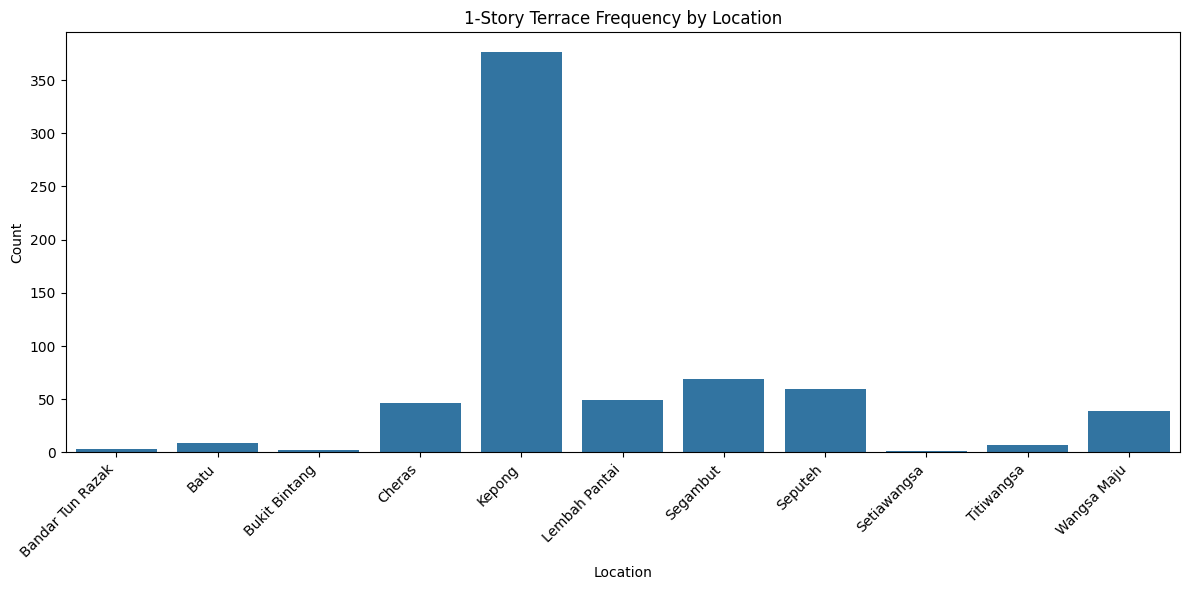

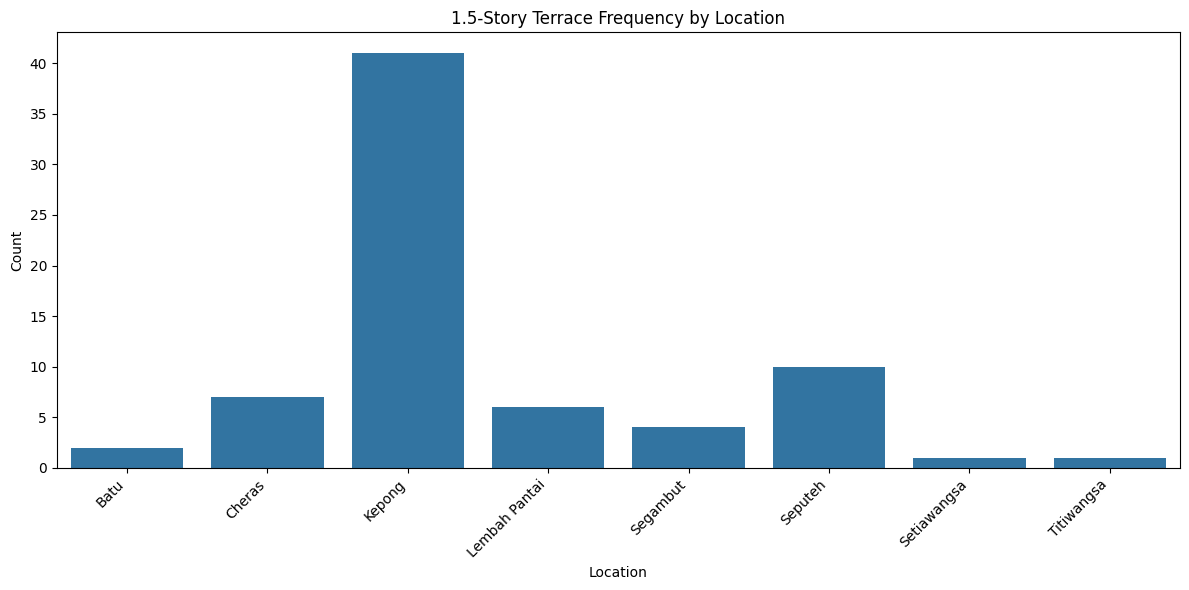

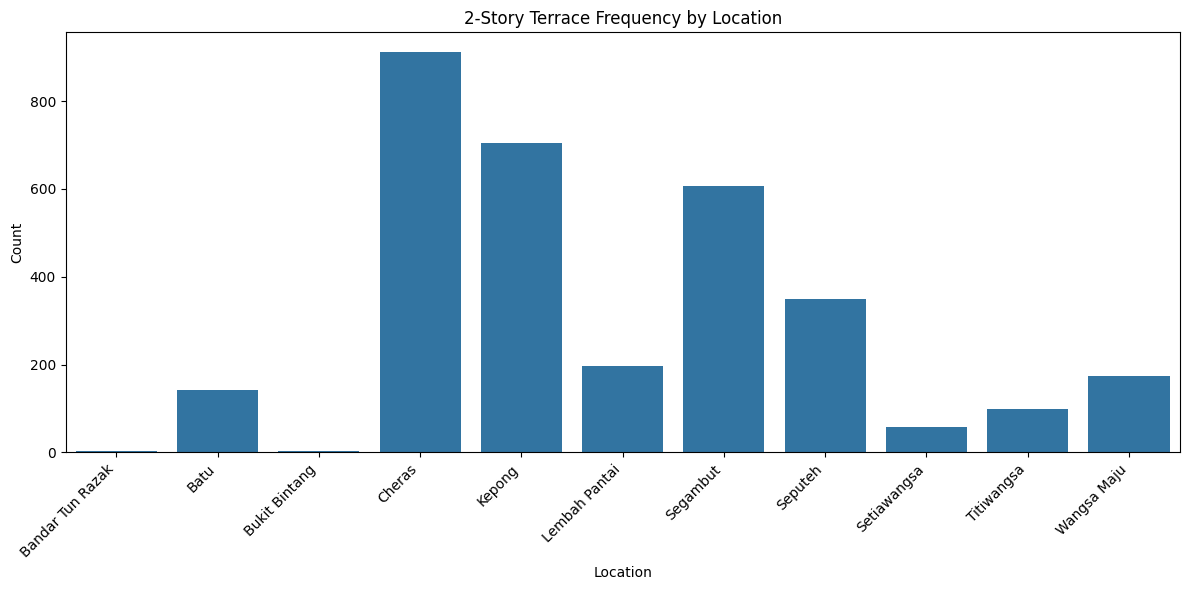

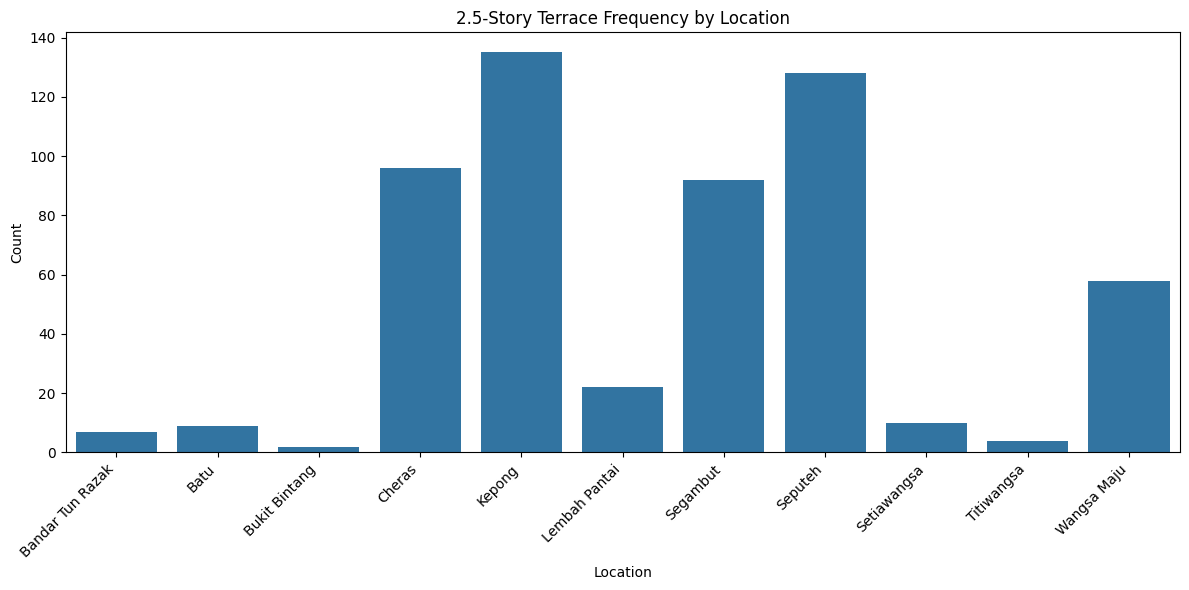

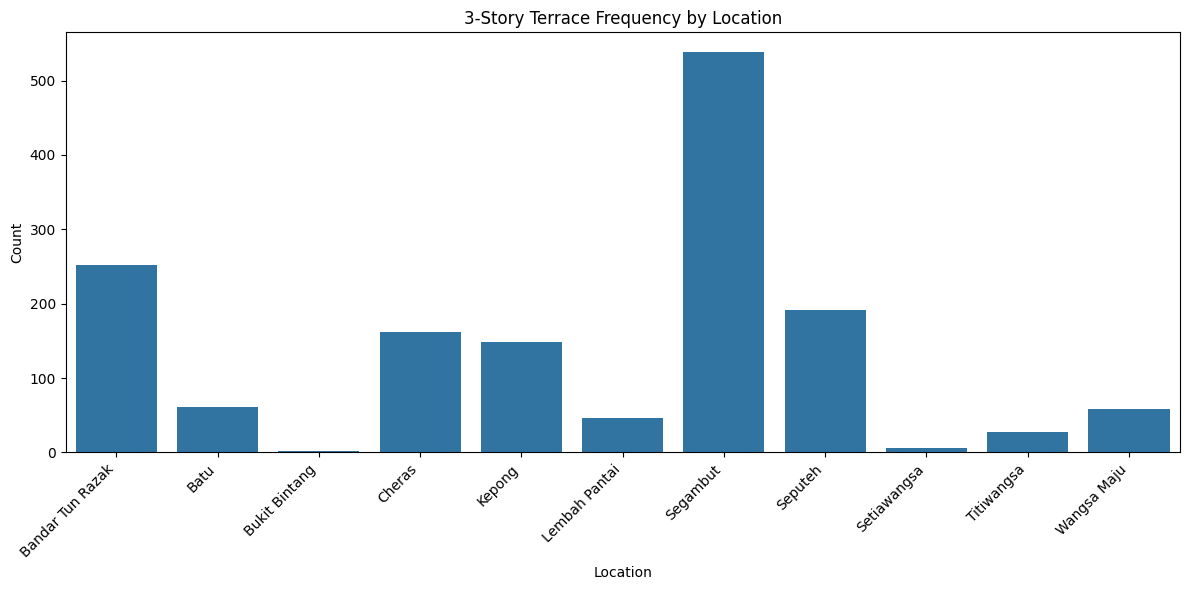

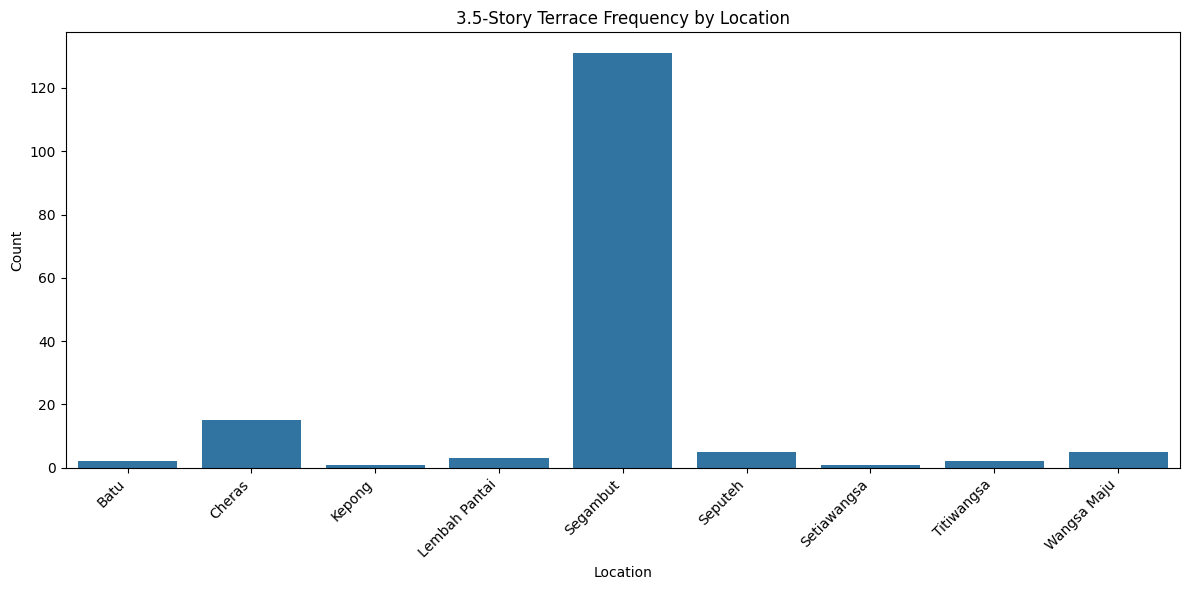

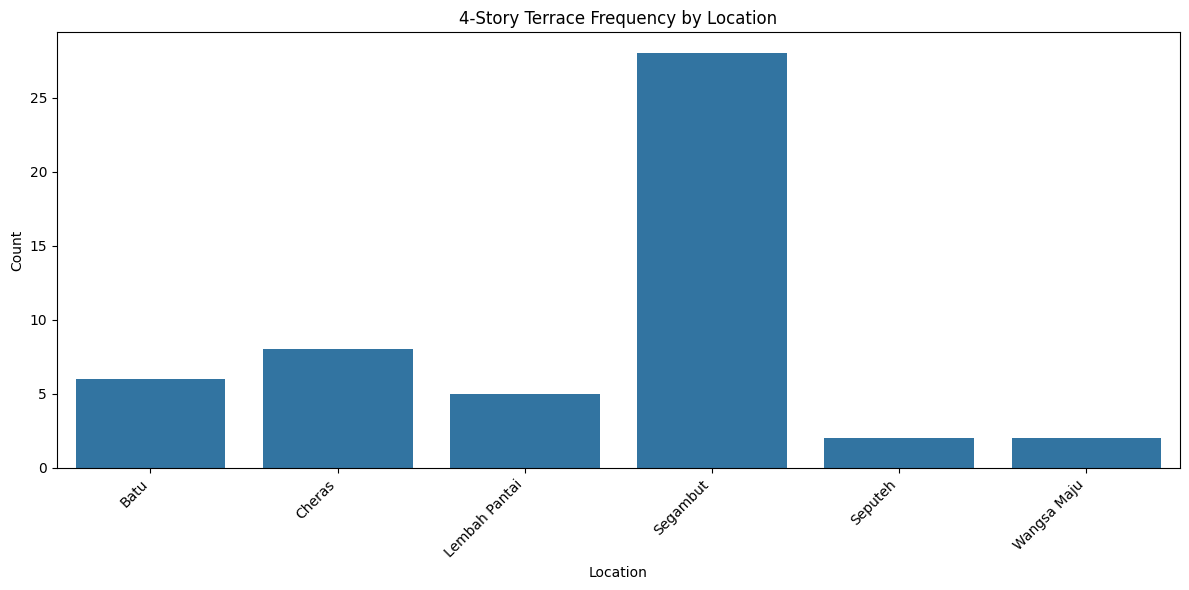

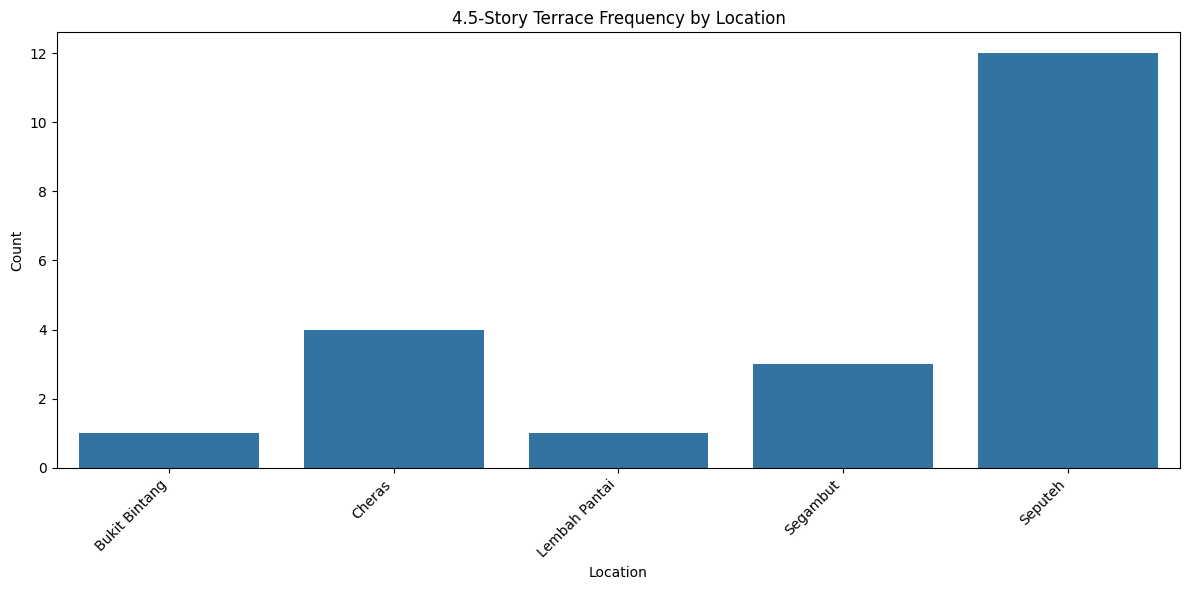

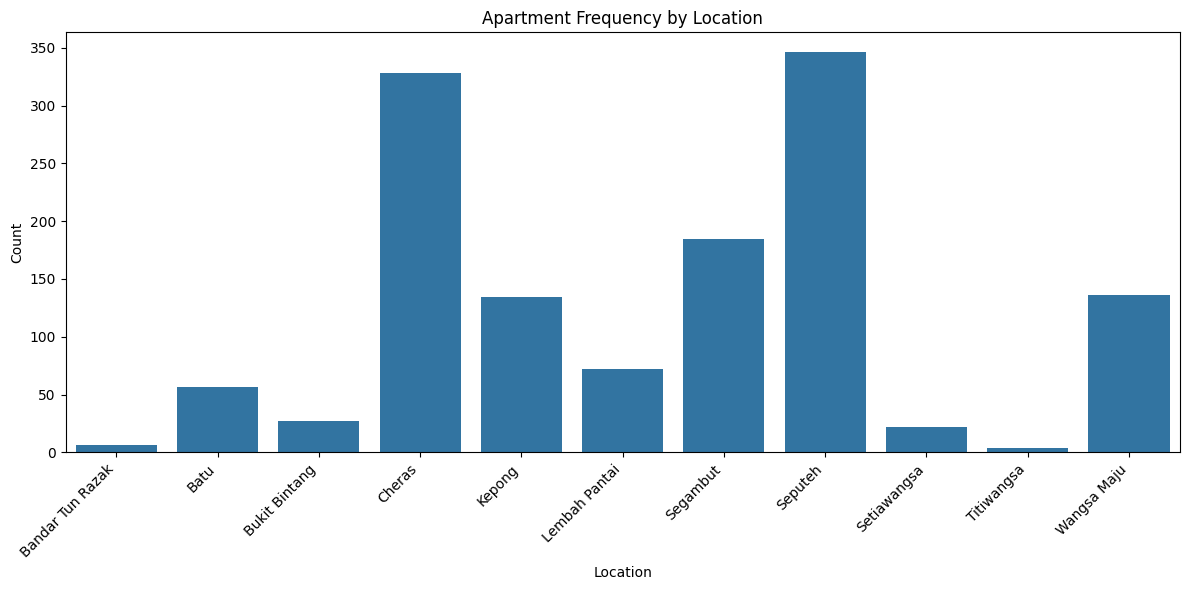

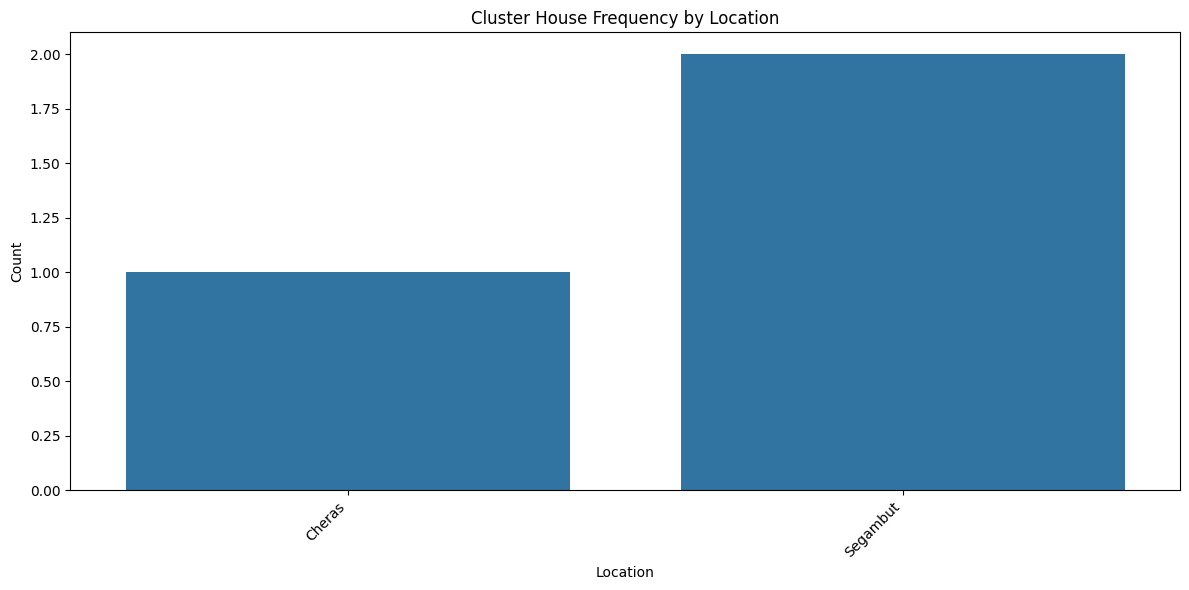

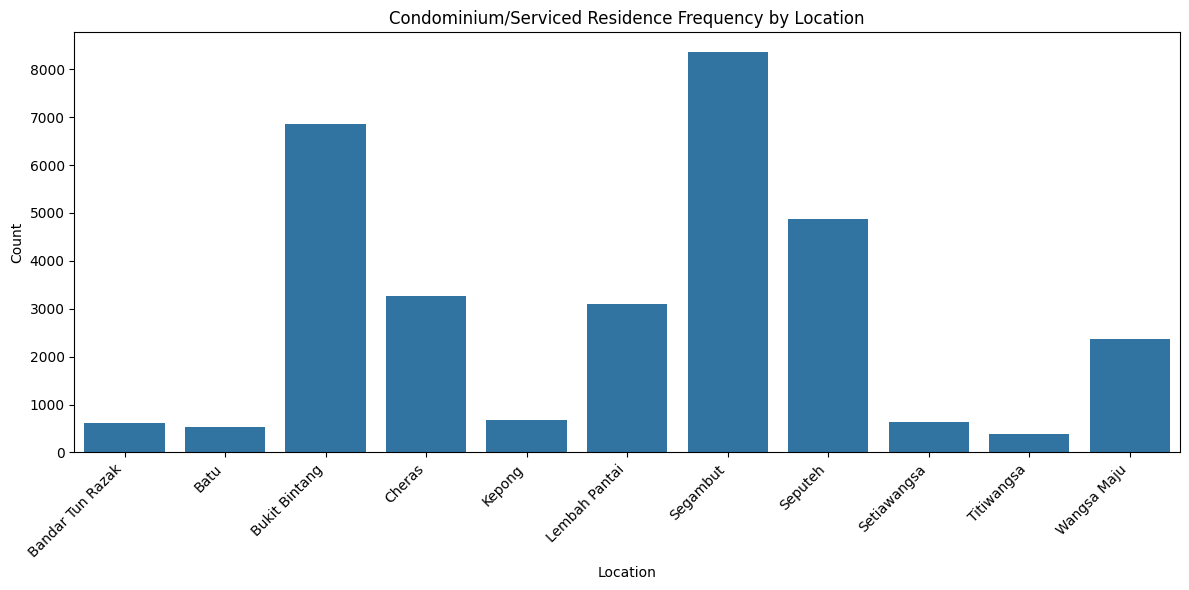

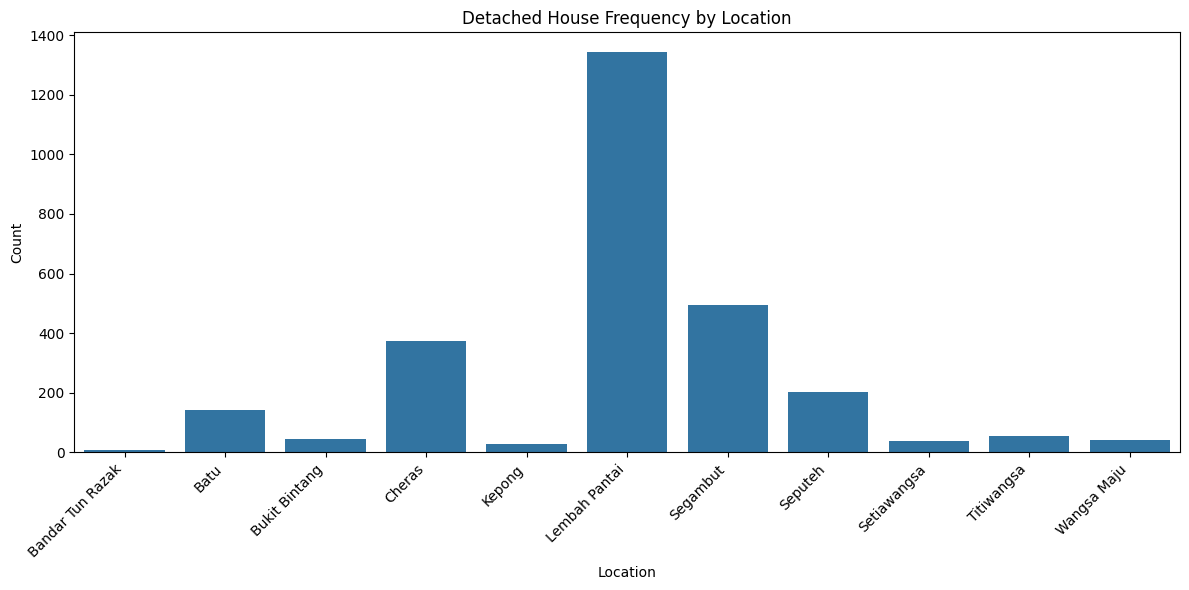

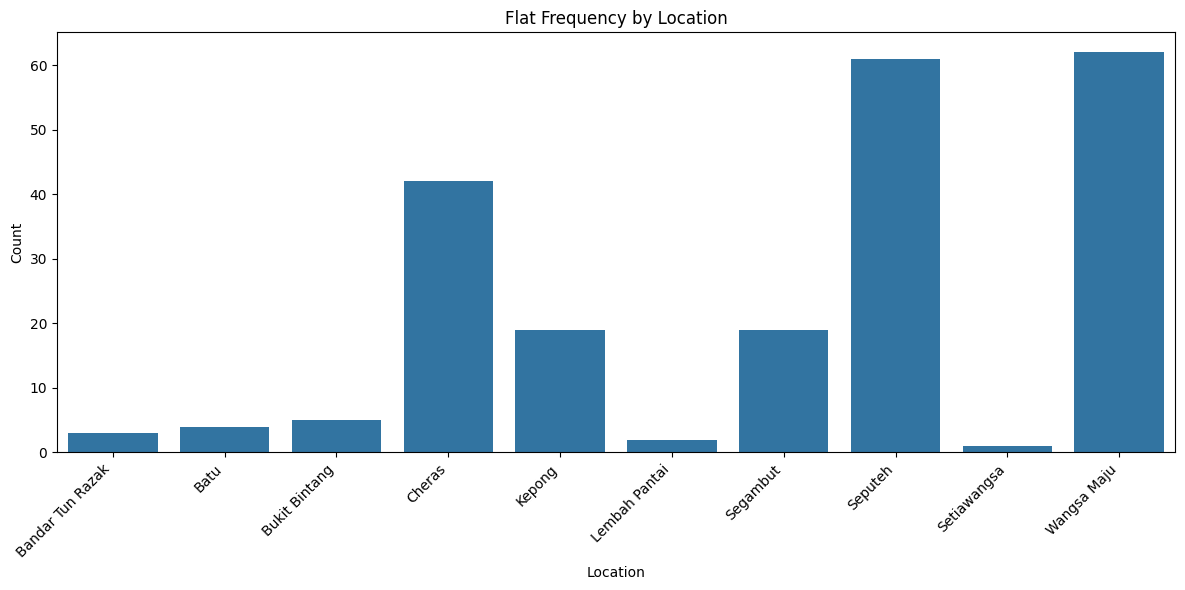

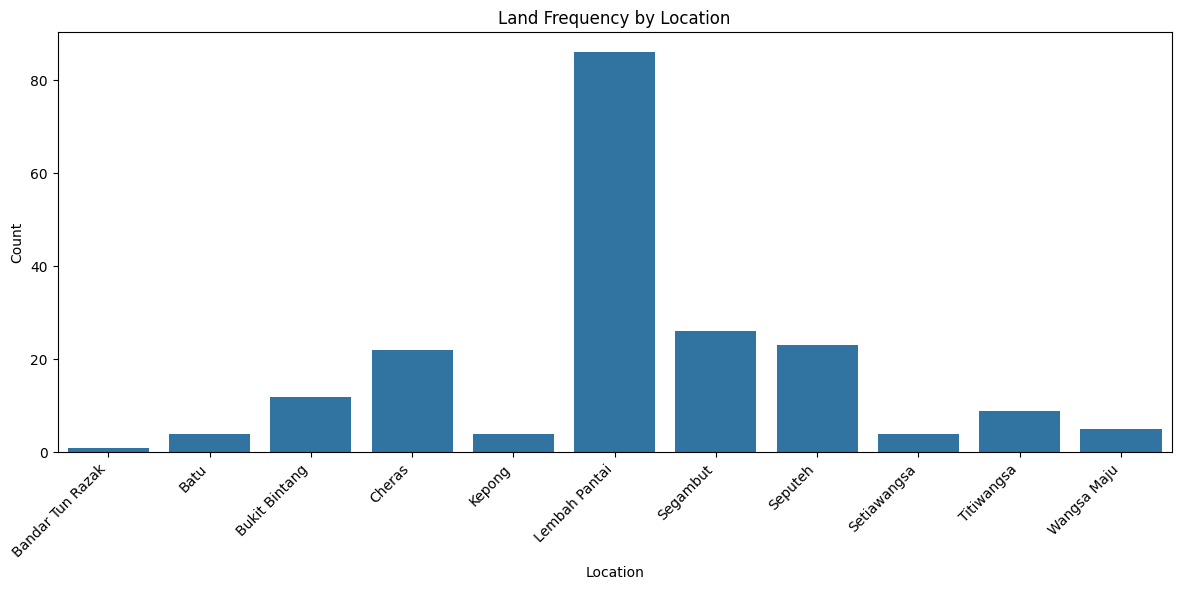

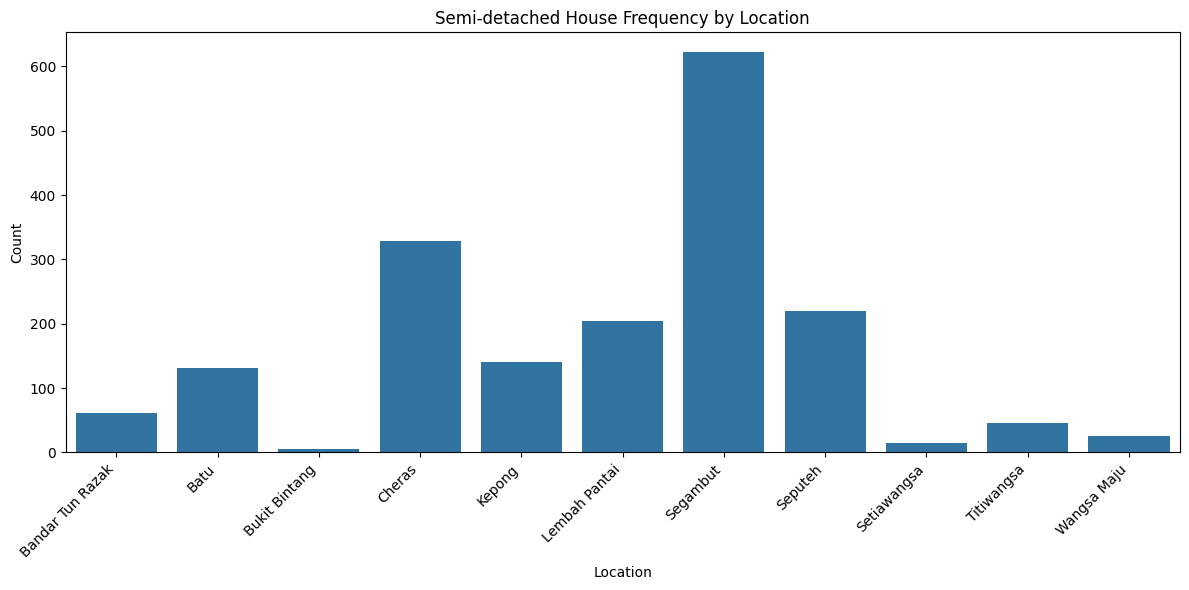

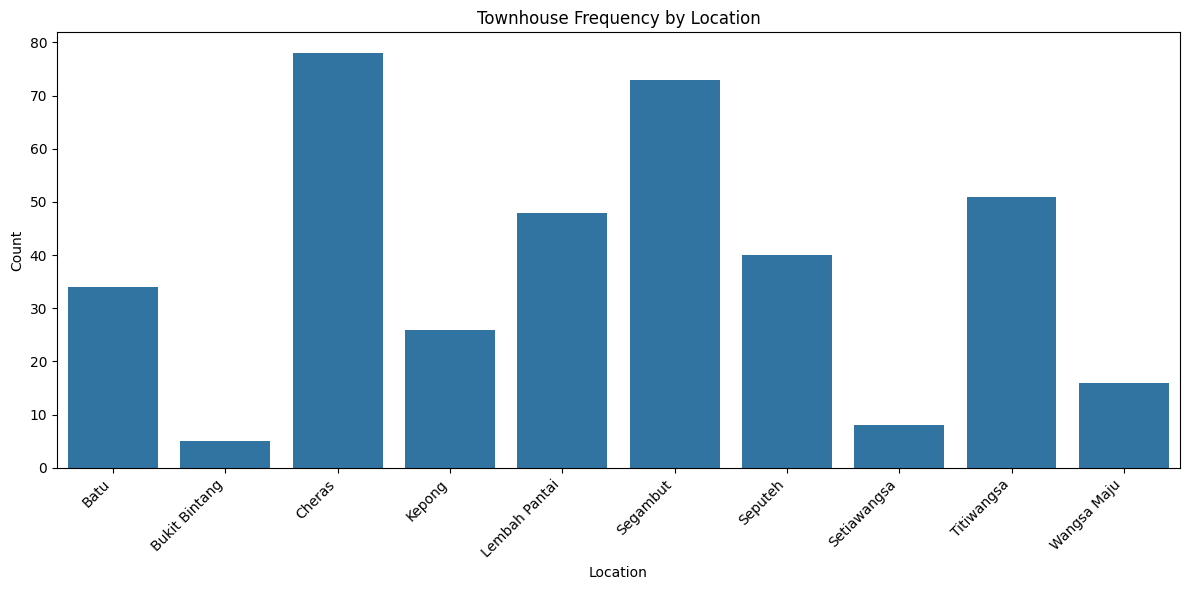

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
property_location_counts = df.groupby(['Property Type', 'Location'])['Location'].count().reset_index(name='Count')

# Create a bar chart for each property type
for property_type in property_location_counts['Property Type'].unique():
    property_data = property_location_counts[property_location_counts['Property Type'] == property_type]

    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.barplot(x='Location', y='Count', data=property_data)
    plt.title(f'{property_type} Frequency by Location')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

I realised 4 stories and 4.5 stories only available in few places. flat losing titiwangsa


land losing Batu and Kepong

Townhouse losing Bandar Tun Razak


So,

- combined all 3, 3.5, 4 and 4.5 stories as 3+ stories
- remove cluster house
- apartment and flat combined
- Townhouse with semi-detached houses.
- 1 and 1.5 story combined
- 2 and 2.5 story combined
-A detached house is a type of landed property, which is a home built on a piece of land

- so Land with detached house as well


In [ ]:
# Combine 3, 3.5, 4, and 4.5 stories as 3+ stories
df['Property Type'] = df['Property Type'].replace({
    '3-Story Terrace': '3+ Story Terrace',
    '3.5-Story Terrace': '3+ Story Terrace',
    '4-Story Terrace': '3+ Story Terrace',
    '4.5-Story Terrace': '3+ Story Terrace'
})

# Remove Cluster House
df = df[df['Property Type'] != 'Cluster House']

# Combine Apartment and Flat
df['Property Type'] = df['Property Type'].replace({
    'Apartment': 'Apartment/Flat',
    'Flat': 'Apartment/Flat'
})

# Combine Townhouse with Semi-detached House
df['Property Type'] = df['Property Type'].replace({
    'Townhouse': 'Semi-detached House/Townhouse',
    'Semi-detached House': 'Semi-detached House/Townhouse',

})

# Remove rows with Property Type as Land in Batu and Kepong locations
df = df[~((df['Property Type'] == 'Land') & (df['Location'].isin(['Batu', 'Kepong'])))]

# Remove rows with Property Type as Townhouse in Bandar Tun Razak location
df = df[~((df['Property Type'] == 'Townhouse') & (df['Location'] == 'Bandar Tun Razak'))]

# Remove rows with Property Type as Flat in Titiwangsa location
df = df[~((df['Property Type'] == 'Flat') & (df['Location'] == 'Titiwangsa'))]


<ipython-input-232-d450243f61c2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Property Type'] = df['Property Type'].replace({
<ipython-input-232-d450243f61c2>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Property Type'] = df['Property Type'].replace({


In [ ]:
# Combine 1 and 1.5-story properties
df['Property Type'] = df['Property Type'].replace({
    '1-Story Terrace': '1-1.5 Story Terrace',
    '1.5-Story Terrace': '1-1.5 Story Terrace'
})

# Combine 2 and 2.5-story properties
df['Property Type'] = df['Property Type'].replace({
    '2-Story Terrace': '2-2.5 Story Terrace',
    '2.5-Story Terrace': '2-2.5 Story Terrace'
})

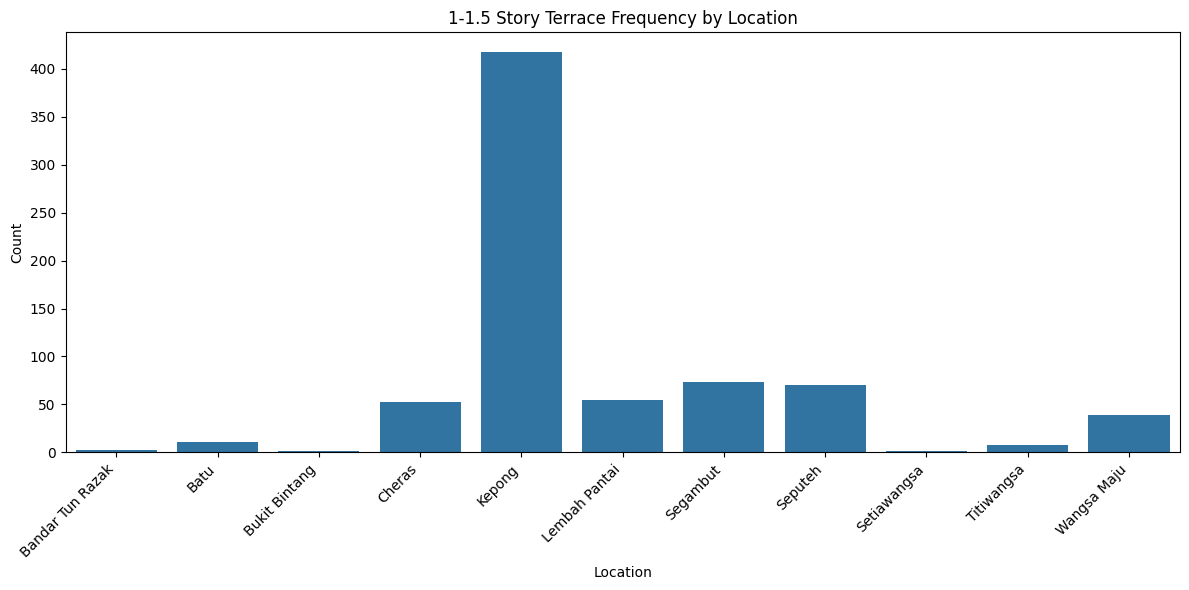

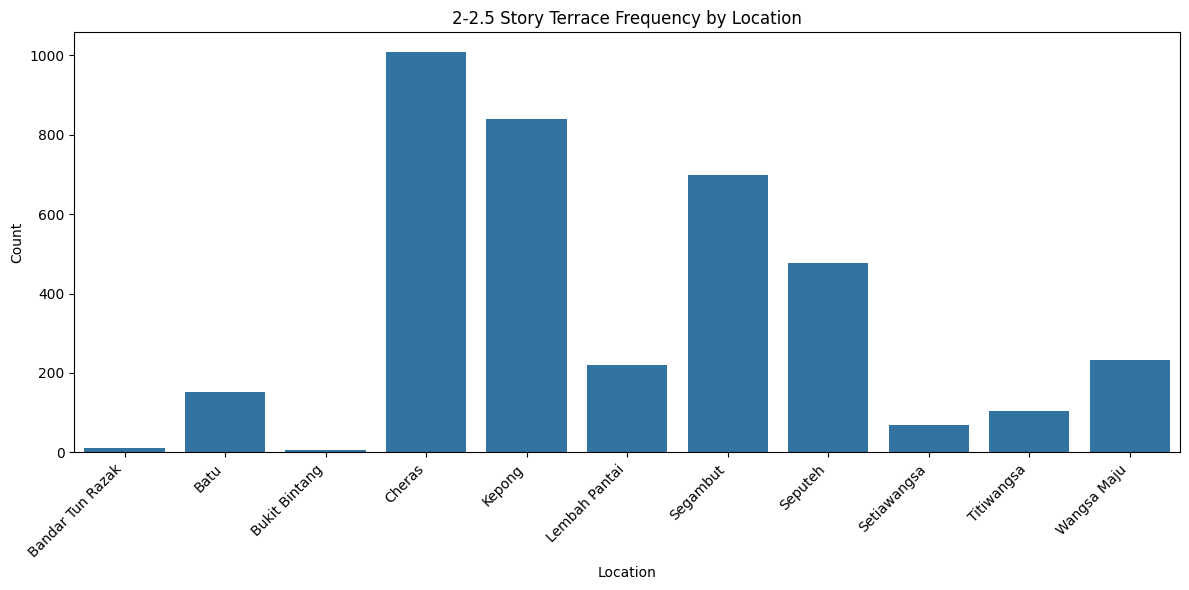

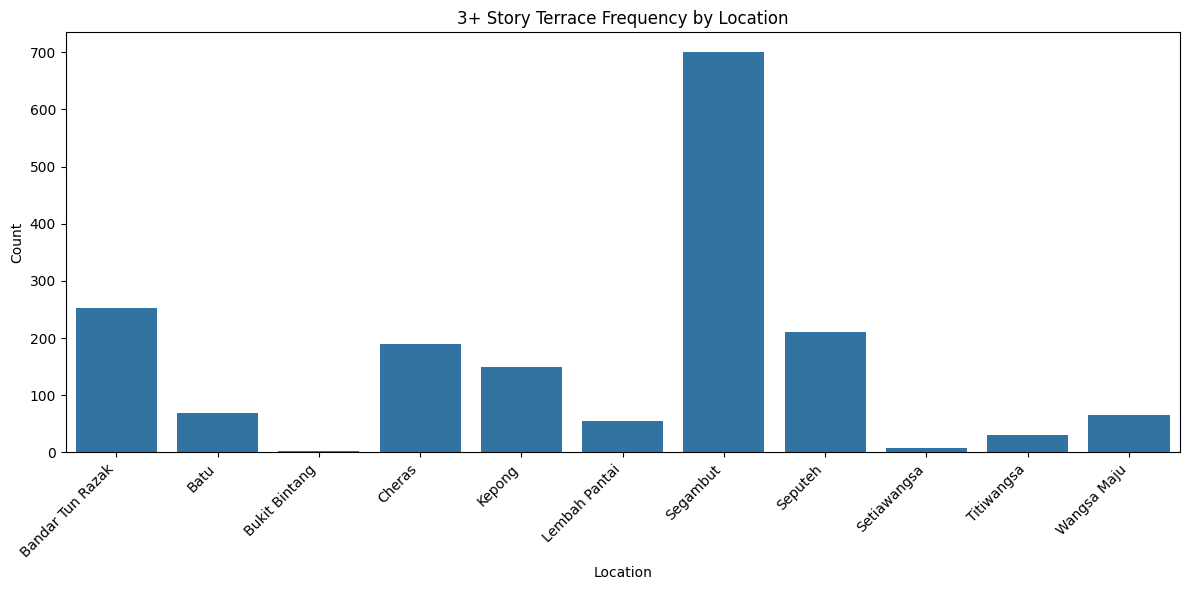

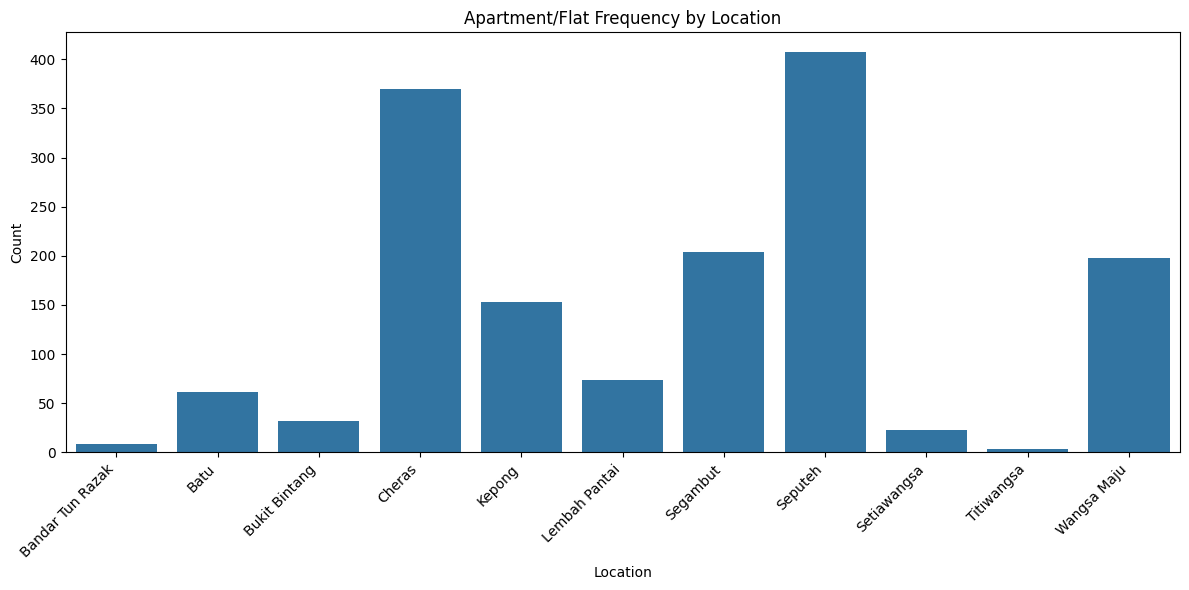

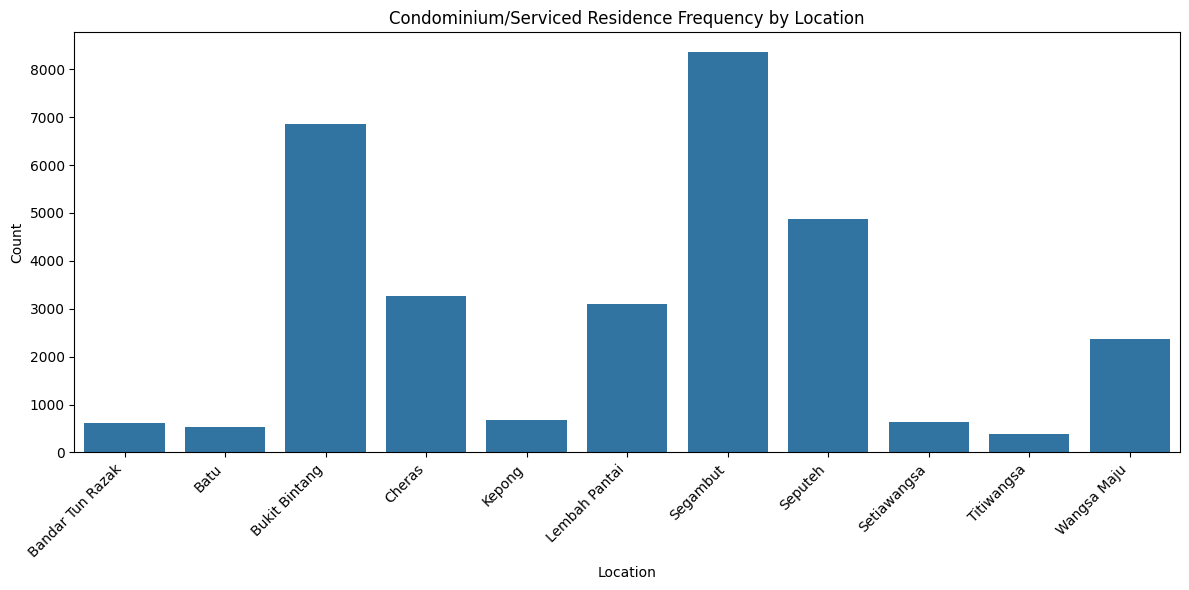

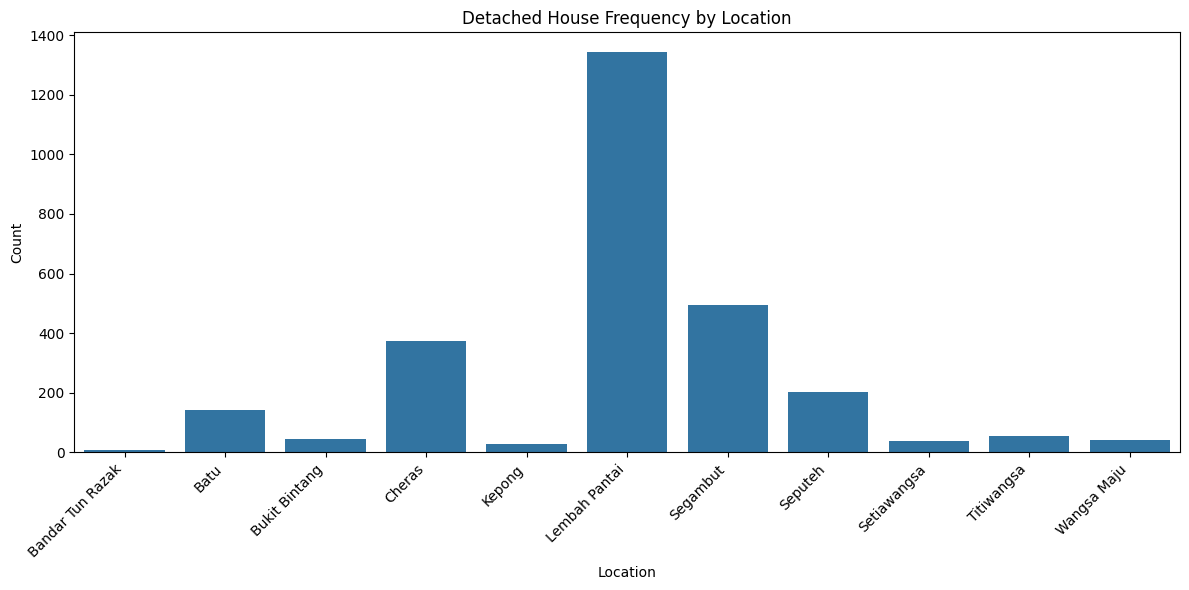

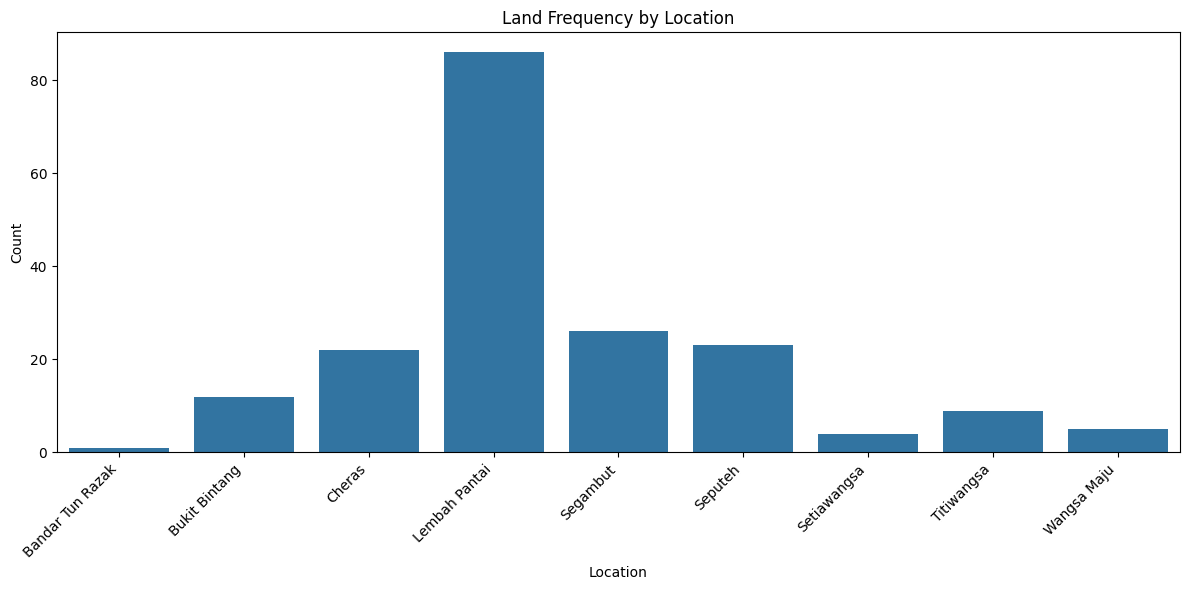

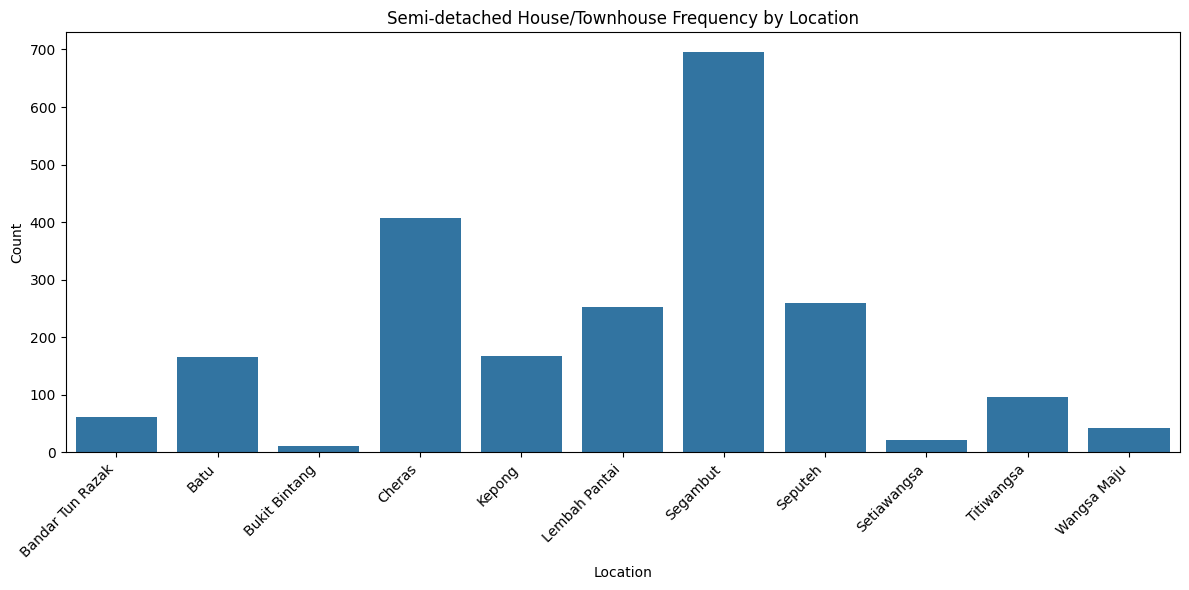

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
property_location_counts = df.groupby(['Property Type', 'Location'])['Location'].count().reset_index(name='Count')

# Create a bar chart for each property type
for property_type in property_location_counts['Property Type'].unique():
    property_data = property_location_counts[property_location_counts['Property Type'] == property_type]

    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.barplot(x='Location', y='Count', data=property_data)
    plt.title(f'{property_type} Frequency by Location')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

###Split the size to size(sqft) and size category

In [ ]:
import pandas as pd
import re

def split_size(size_str):
    if pd.isna(size_str):
        return pd.Series({'size_type': None, 'size_value': None})

    # Check if it's built-up or land area
    if 'Built-up' in str(size_str):
        size_type = 'Built-Up'
    elif 'Land area' in str(size_str):
        size_type = 'Land Area'
    else:
        size_type = 'Unknown'

    # Extract numeric value
    match = re.search(r':\s*([\d,]+)', str(size_str))
    if match:
        size_value = match.group(1).replace(',', '')
        return pd.Series({'size_type': size_type, 'size_value': float(size_value)})

    return pd.Series({'size_type': size_type, 'size_value': None})

# Apply the splitting function to df
df[['Size Category', 'Size(sq.ft.)']] = df['Size'].apply(split_size)

# Display the first few rows of df to verify
print(df[['Location', 'Size', 'Size Category', 'Size(sq.ft.)']].head())

        Location                      Size Size Category  Size(sq.ft.)
0  Bukit Bintang  Built-up : 1,335 sq. ft.      Built-Up        1335.0
1  Lembah Pantai  Land area : 6900 sq. ft.     Land Area        6900.0
2       Segambut  Built-up : 1,875 sq. ft.      Built-Up        1875.0
4        Seputeh  Built-up : 1,513 sq. ft.      Built-Up        1513.0
5       Segambut  Land area : 7200 sq. ft.     Land Area        7200.0


In [ ]:
df = df.drop('Size', axis=1)  # To remove the 'Size' column from the DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44636 entries, 0 to 53882
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       44636 non-null  object 
 1   Price          44480 non-null  float64
 2   Rooms          44206 non-null  Int64  
 3   Bathrooms      44045 non-null  Int64  
 4   Car Parks      44636 non-null  Int64  
 5   Property Type  44636 non-null  object 
 6   Furnishing     44636 non-null  object 
 7   Size Category  43943 non-null  object 
 8   Size(sq.ft.)   43900 non-null  float64
dtypes: Int64(3), float64(2), object(4)
memory usage: 3.5+ MB


In [ ]:
df['Size Category'].unique()

array(['Built-Up', 'Land Area', None], dtype=object)

In [ ]:
df.isna().sum()

Location           0
Price            156
Rooms            430
Bathrooms        591
Car Parks          0
Property Type      0
Furnishing         0
Size Category    693
Size(sq.ft.)     736
dtype: int64

###For rooms and bathrooms, since all houses are similar, therefore I try to use the median for the rooms and bathrooms in our dataset.

In [ ]:
import pandas as pd

# Calculate median, mode, and mean for Rooms and Bathrooms by Property Type
property_stats = df.groupby('Property Type').agg({
    'Rooms': [pd.Series.mode, 'median', 'mean'],  # Mode, median, mean of Rooms
    'Bathrooms': [pd.Series.mode, 'median', 'mean']  # Mode, median, mean of Bathrooms
})

# Flatten MultiIndex columns for easier access
property_stats.columns = ['_'.join(col).strip() for col in property_stats.columns.values]
property_stats = property_stats.rename(columns={
    'Rooms_mode': 'Rooms_Mode',
    'Rooms_median': 'Rooms_Median',
    'Rooms_mean': 'Rooms_Mean',
    'Bathrooms_mode': 'Bathrooms_Mode',
    'Bathrooms_median': 'Bathrooms_Median',
    'Bathrooms_mean': 'Bathrooms_Mean'
})

# Display the results
print(property_stats)

# Example usage to fill NaN values in 'Rooms' based on property type
# Assuming you want to use the median:
for property_type in df['Property Type'].unique():
    median_rooms = property_stats.loc[property_type, 'Rooms_Median']
    df.loc[(df['Property Type'] == property_type) & (df['Rooms'].isnull()), 'Rooms'] = int(median_rooms)  # Fill with median, converted to int

# Repeat the above for 'Bathrooms' using the appropriate statistic (mode, median, or mean)

                                Rooms_Mode  Rooms_Median  Rooms_Mean  \
Property Type                                                          
1-1.5 Story Terrace                      3           3.0    3.475207   
2-2.5 Story Terrace                      4           4.0     4.25574   
3+ Story Terrace                         5           5.0    5.383673   
Apartment/Flat                           3           3.0    2.896461   
Condominium/Serviced Residence           3           3.0    3.206036   
Detached House                           6           6.0    6.397731   
Land                                     1           4.5        5.06   
Semi-detached House/Townhouse            6           5.0    5.304449   

                                Bathrooms_Mode  Bathrooms_Median  \
Property Type                                                      
1-1.5 Story Terrace                          2               2.0   
2-2.5 Story Terrace                          3               3.0   
3+ Stor

In [ ]:
# ... (previous code to calculate property_stats) ...

# Fill NaN values in 'Rooms' with median
for property_type in df['Property Type'].unique():
    median_rooms = property_stats.loc[property_type, 'Rooms_Median']
    df.loc[(df['Property Type'] == property_type) & (df['Rooms'].isnull()), 'Rooms'] = int(median_rooms)

# Fill NaN values in 'Bathrooms' with median
for property_type in df['Property Type'].unique():
    median_bathrooms = property_stats.loc[property_type, 'Bathrooms_Median']
    df.loc[(df['Property Type'] == property_type) & (df['Bathrooms'].isnull()), 'Bathrooms'] = int(median_bathrooms)

print(df.isna().sum()) #Check if all NaN values filled

Location           0
Price            156
Rooms              0
Bathrooms          0
Car Parks          0
Property Type      0
Furnishing         0
Size Category    693
Size(sq.ft.)     736
dtype: int64


###For size category and size(sq.ft) and price, since there are too many values, therefore it is recommended to remove them instead of using mean, median or mode.

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

Location         0
Price            0
Rooms            0
Bathrooms        0
Car Parks        0
Property Type    0
Furnishing       0
Size Category    0
Size(sq.ft.)     0
dtype: int64

###Since now land some areas has lost data, so we use combine it with detached house instead.

In [ ]:
df['Property Type'] = df['Property Type'].replace({'Land': 'Detached House'})



<ipython-input-244-ddc46499f2ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Property Type'] = df['Property Type'].replace({'Land': 'Detached House'})


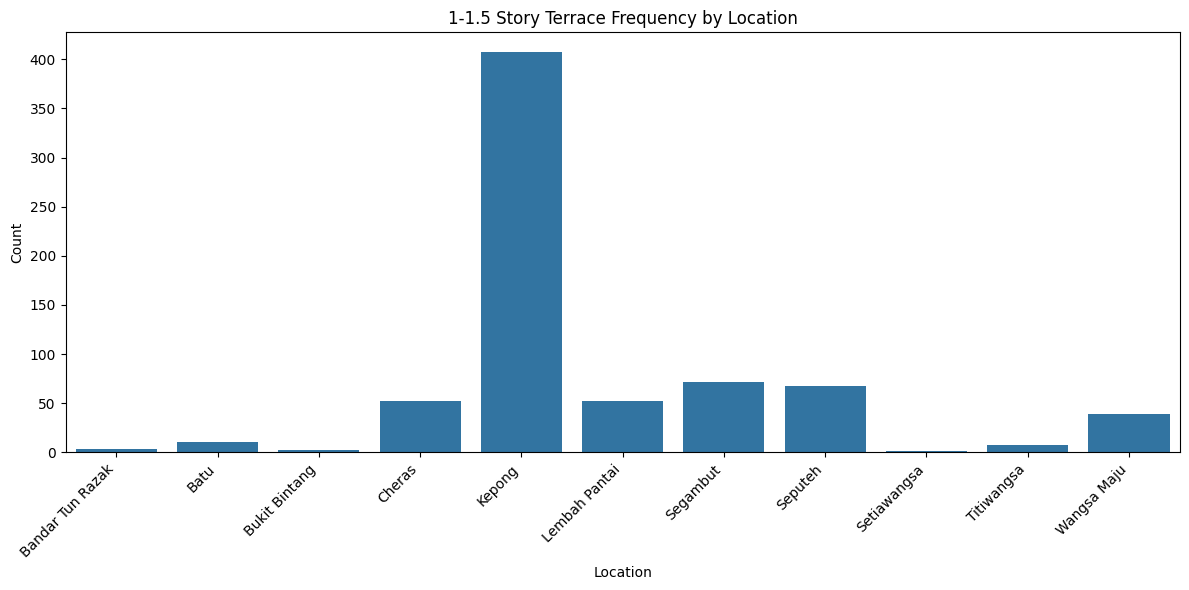

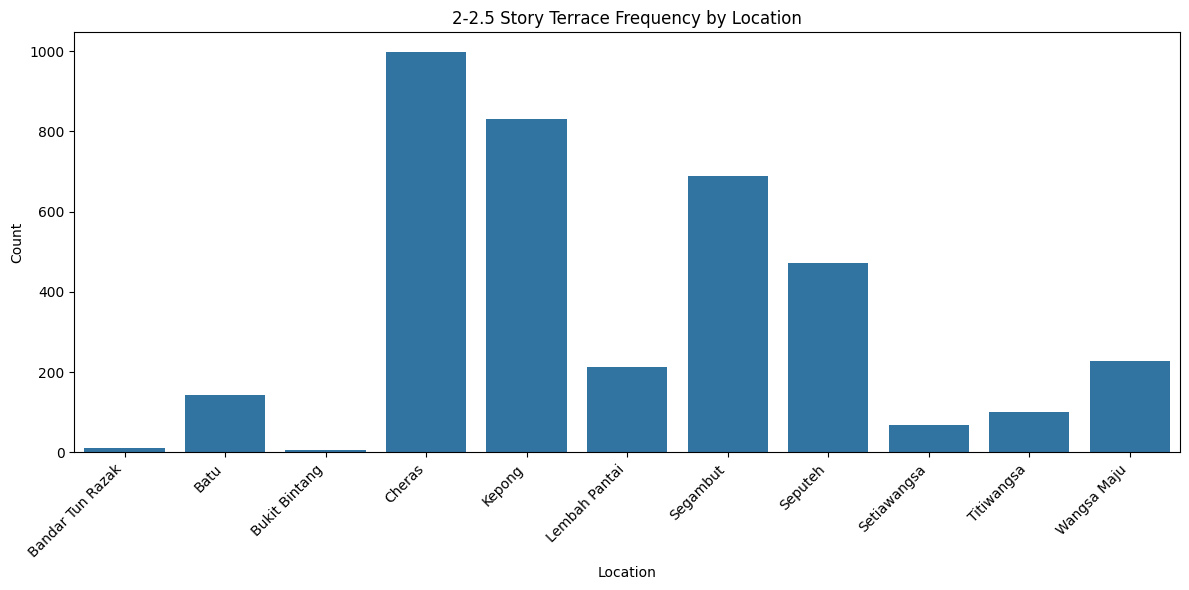

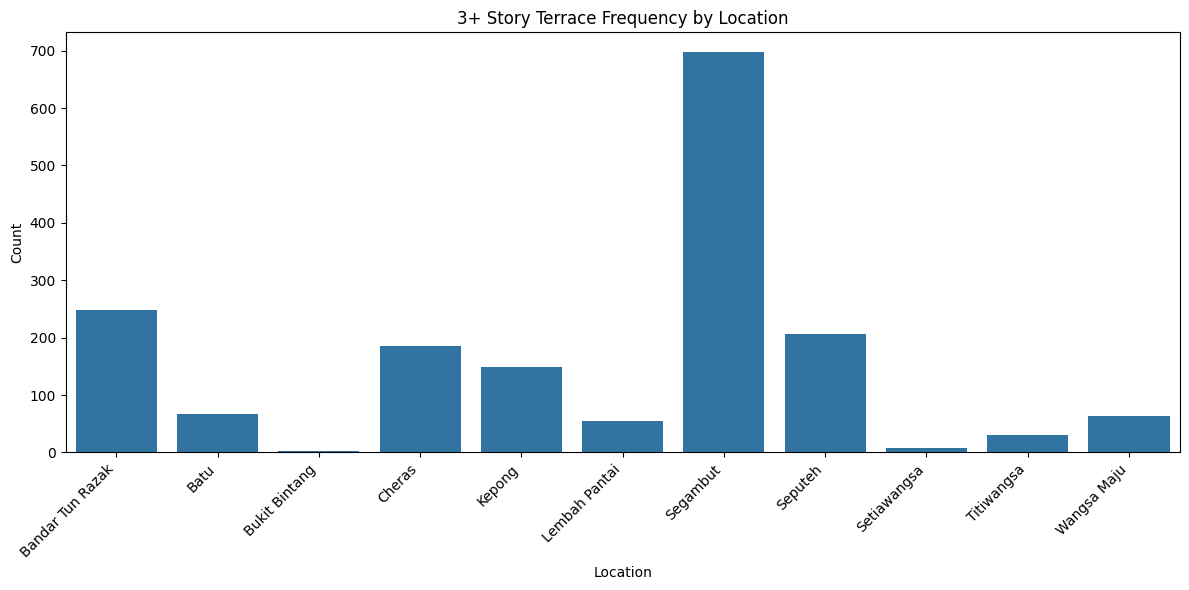

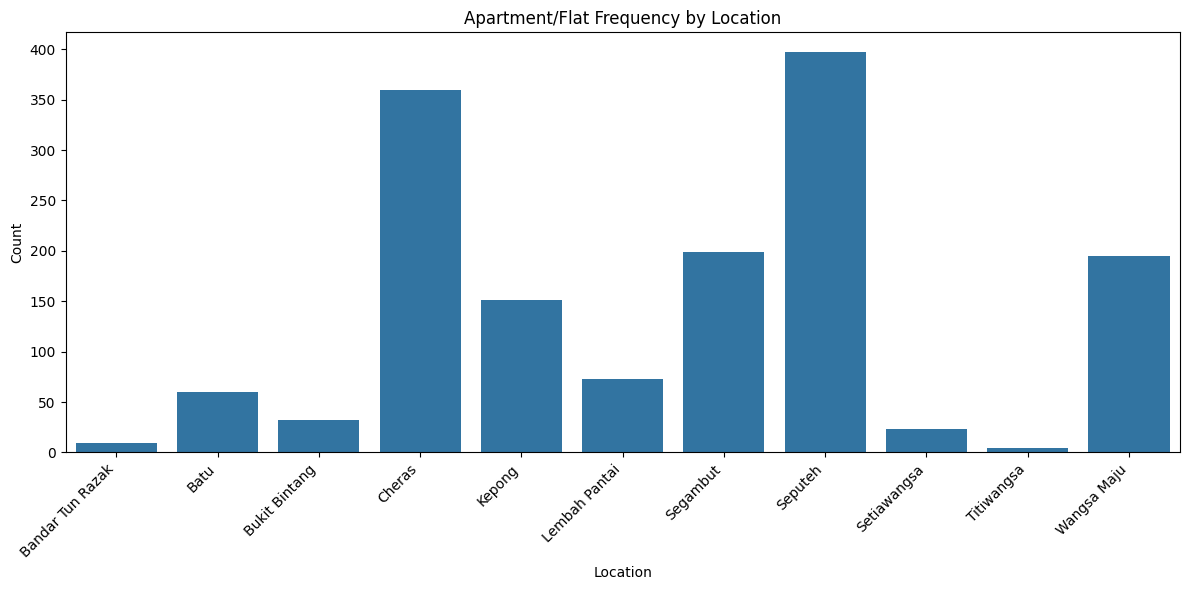

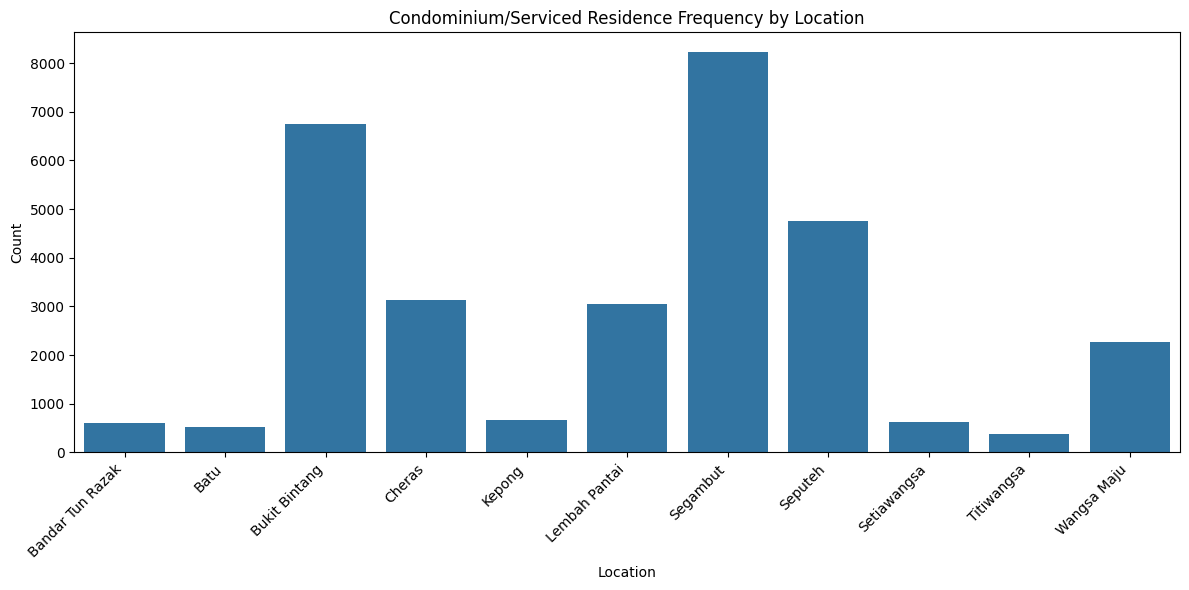

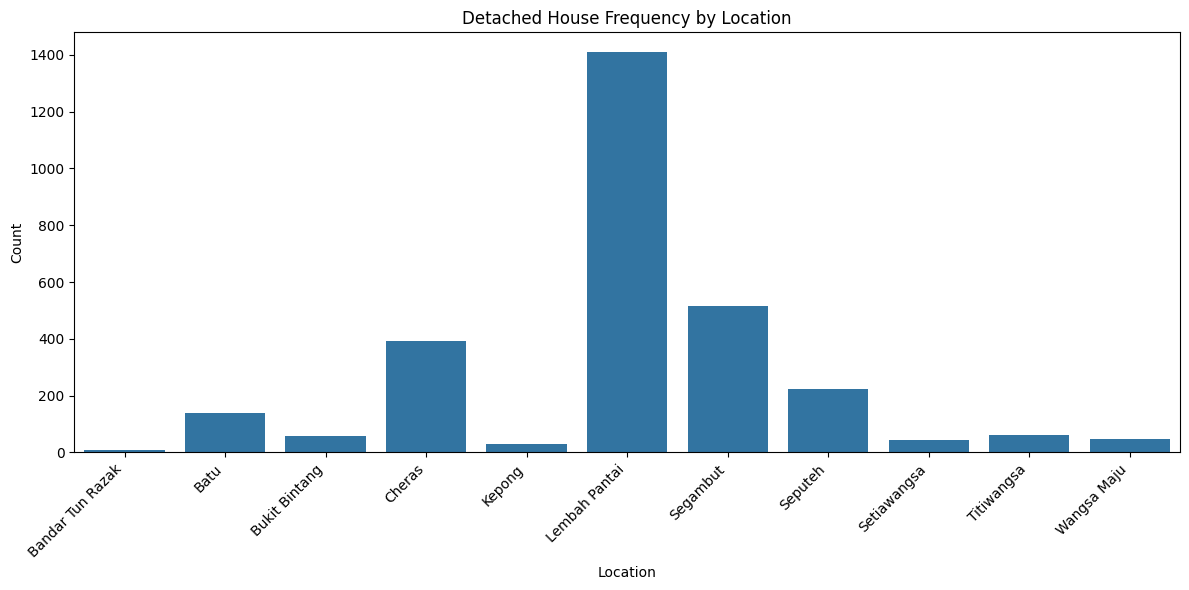

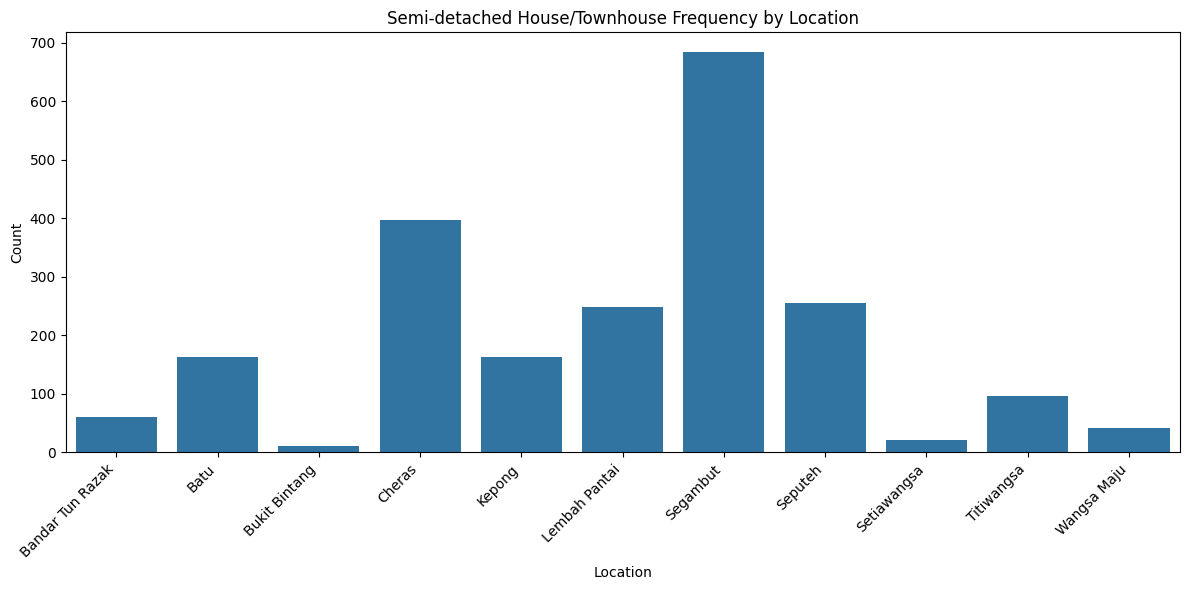

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
property_location_counts = df.groupby(['Property Type', 'Location'])['Location'].count().reset_index(name='Count')

# Create a bar chart for each property type
for property_type in property_location_counts['Property Type'].unique():
    property_data = property_location_counts[property_location_counts['Property Type'] == property_type]

    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.barplot(x='Location', y='Count', data=property_data)
    plt.title(f'{property_type} Frequency by Location')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

###Add the new column, Total rooms

###And also, add the new column(Price per sqft)






In [ ]:
# Add 'Total Rooms' column (assuming it's the sum of Rooms and Bathrooms)
df['Total Rooms'] = df['Rooms'] + df['Bathrooms']

# Add 'Price per sqft' column
df['Price per sqft'] = df['Price'] / df['Size(sq.ft.)']

# Display the updated DataFrame
print(df.head())

        Location      Price  Rooms  Bathrooms  Car Parks  \
0  Bukit Bintang  1250000.0      3          3          2   
1  Lembah Pantai  6800000.0      6          7          0   
2       Segambut  1030000.0      3          4          2   
4        Seputeh   900000.0      5          3          2   
5       Segambut  5350000.0      6          5          4   

                    Property Type        Furnishing Size Category  \
0  Condominium/Serviced Residence   Fully Furnished      Built-Up   
1                  Detached House  Partly Furnished     Land Area   
2  Condominium/Serviced Residence  Partly Furnished      Built-Up   
4  Condominium/Serviced Residence  Partly Furnished      Built-Up   
5                  Detached House  Partly Furnished     Land Area   

   Size(sq.ft.)  Total Rooms  Price per sqft  
0        1335.0            6      936.329588  
1        6900.0           13      985.507246  
2        1875.0            7      549.333333  
4        1513.0            8      59

##Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43751 entries, 0 to 53882
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        43751 non-null  object 
 1   Price           43751 non-null  float64
 2   Rooms           43751 non-null  Int64  
 3   Bathrooms       43751 non-null  Int64  
 4   Car Parks       43751 non-null  Int64  
 5   Property Type   43751 non-null  object 
 6   Furnishing      43751 non-null  object 
 7   Size Category   43751 non-null  object 
 8   Size(sq.ft.)    43751 non-null  float64
 9   Total Rooms     43751 non-null  Int64  
 10  Price per sqft  43751 non-null  float64
dtypes: Int64(4), float64(3), object(4)
memory usage: 4.2+ MB


###Now lets check if there are price <= 10000, if so, we have to remove them immediately.

In [ ]:
# Remove rows where Price <= 10000
df2 = df[df['Price'] < 10000]

print (df2)

            Location   Price  Rooms  Bathrooms  Car Parks  \
922    Bukit Bintang  1800.0      1          1          0   
923    Bukit Bintang  1800.0      1          1          0   
1196   Bukit Bintang  7500.0      2          2          1   
1878   Bukit Bintang  3000.0      1          1          1   
2549   Bukit Bintang  8000.0      5          5          0   
...              ...     ...    ...        ...        ...   
52771        Seputeh  1800.0      3          2          2   
52928        Seputeh  1500.0      3          2          1   
52935        Seputeh  1100.0      3          2          1   
52996  Lembah Pantai  3500.0      4          3          1   
53095       Segambut  4000.0      1          1          0   

                        Property Type        Furnishing Size Category  \
922    Condominium/Serviced Residence  Partly Furnished      Built-Up   
923    Condominium/Serviced Residence  Partly Furnished      Built-Up   
1196   Condominium/Serviced Residence   Fully Fu

In [ ]:
# Remove rows where Price <= 10000
df = df[df['Price'] > 10000]

# Display the updated DataFrame (optional)
print(df.head())

        Location      Price  Rooms  Bathrooms  Car Parks  \
0  Bukit Bintang  1250000.0      3          3          2   
1  Lembah Pantai  6800000.0      6          7          0   
2       Segambut  1030000.0      3          4          2   
4        Seputeh   900000.0      5          3          2   
5       Segambut  5350000.0      6          5          4   

                    Property Type        Furnishing Size Category  \
0  Condominium/Serviced Residence   Fully Furnished      Built-Up   
1                  Detached House  Partly Furnished     Land Area   
2  Condominium/Serviced Residence  Partly Furnished      Built-Up   
4  Condominium/Serviced Residence  Partly Furnished      Built-Up   
5                  Detached House  Partly Furnished     Land Area   

   Size(sq.ft.)  Total Rooms  Price per sqft  
0        1335.0            6      936.329588  
1        6900.0           13      985.507246  
2        1875.0            7      549.333333  
4        1513.0            8      59

###See the correlation between each other.

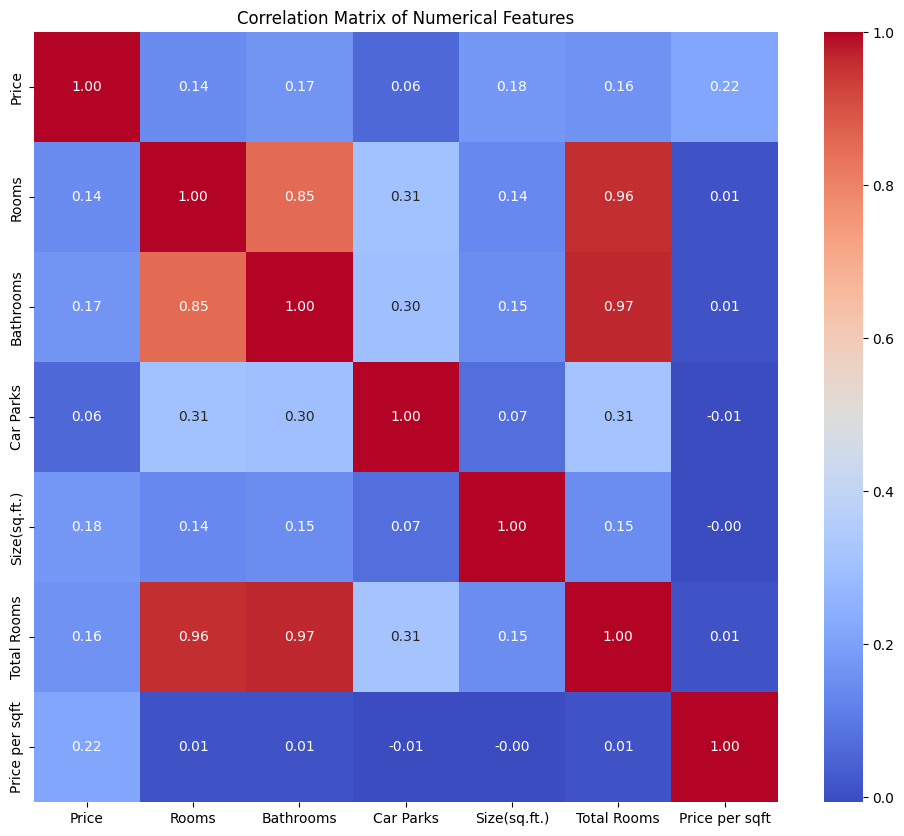

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###Realising rooms and bathrooms very high correlation to each other, so might as well remove them.

In [ ]:
df = df.drop(['Bathrooms', 'Rooms'], axis=1)
df.head()

Location      Price  Car Parks                   Property Type  \
0  Bukit Bintang  1250000.0          2  Condominium/Serviced Residence   
1  Lembah Pantai  6800000.0          0                  Detached House   
2       Segambut  1030000.0          2  Condominium/Serviced Residence   
4        Seputeh   900000.0          2  Condominium/Serviced Residence   
5       Segambut  5350000.0          4                  Detached House   

         Furnishing Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  
0   Fully Furnished      Built-Up        1335.0            6      936.329588  
1  Partly Furnished     Land Area        6900.0           13      985.507246  
2  Partly Furnished      Built-Up        1875.0            7      549.333333  
4  Partly Furnished      Built-Up        1513.0            8      594.844679  
5  Partly Furnished     Land Area        7200.0           11      743.055556

Realising there are 0.00 for price per sqft vs size.

And Price per sqft vs Total rooms 0.01, most likely is due to outliers

And car parks vs Price per sqft -0.01

Since our target output is the Price

So now, lets do the price per sqft vs size for each property for each location. 11(locations)*11(property type) of graph will be plotted.

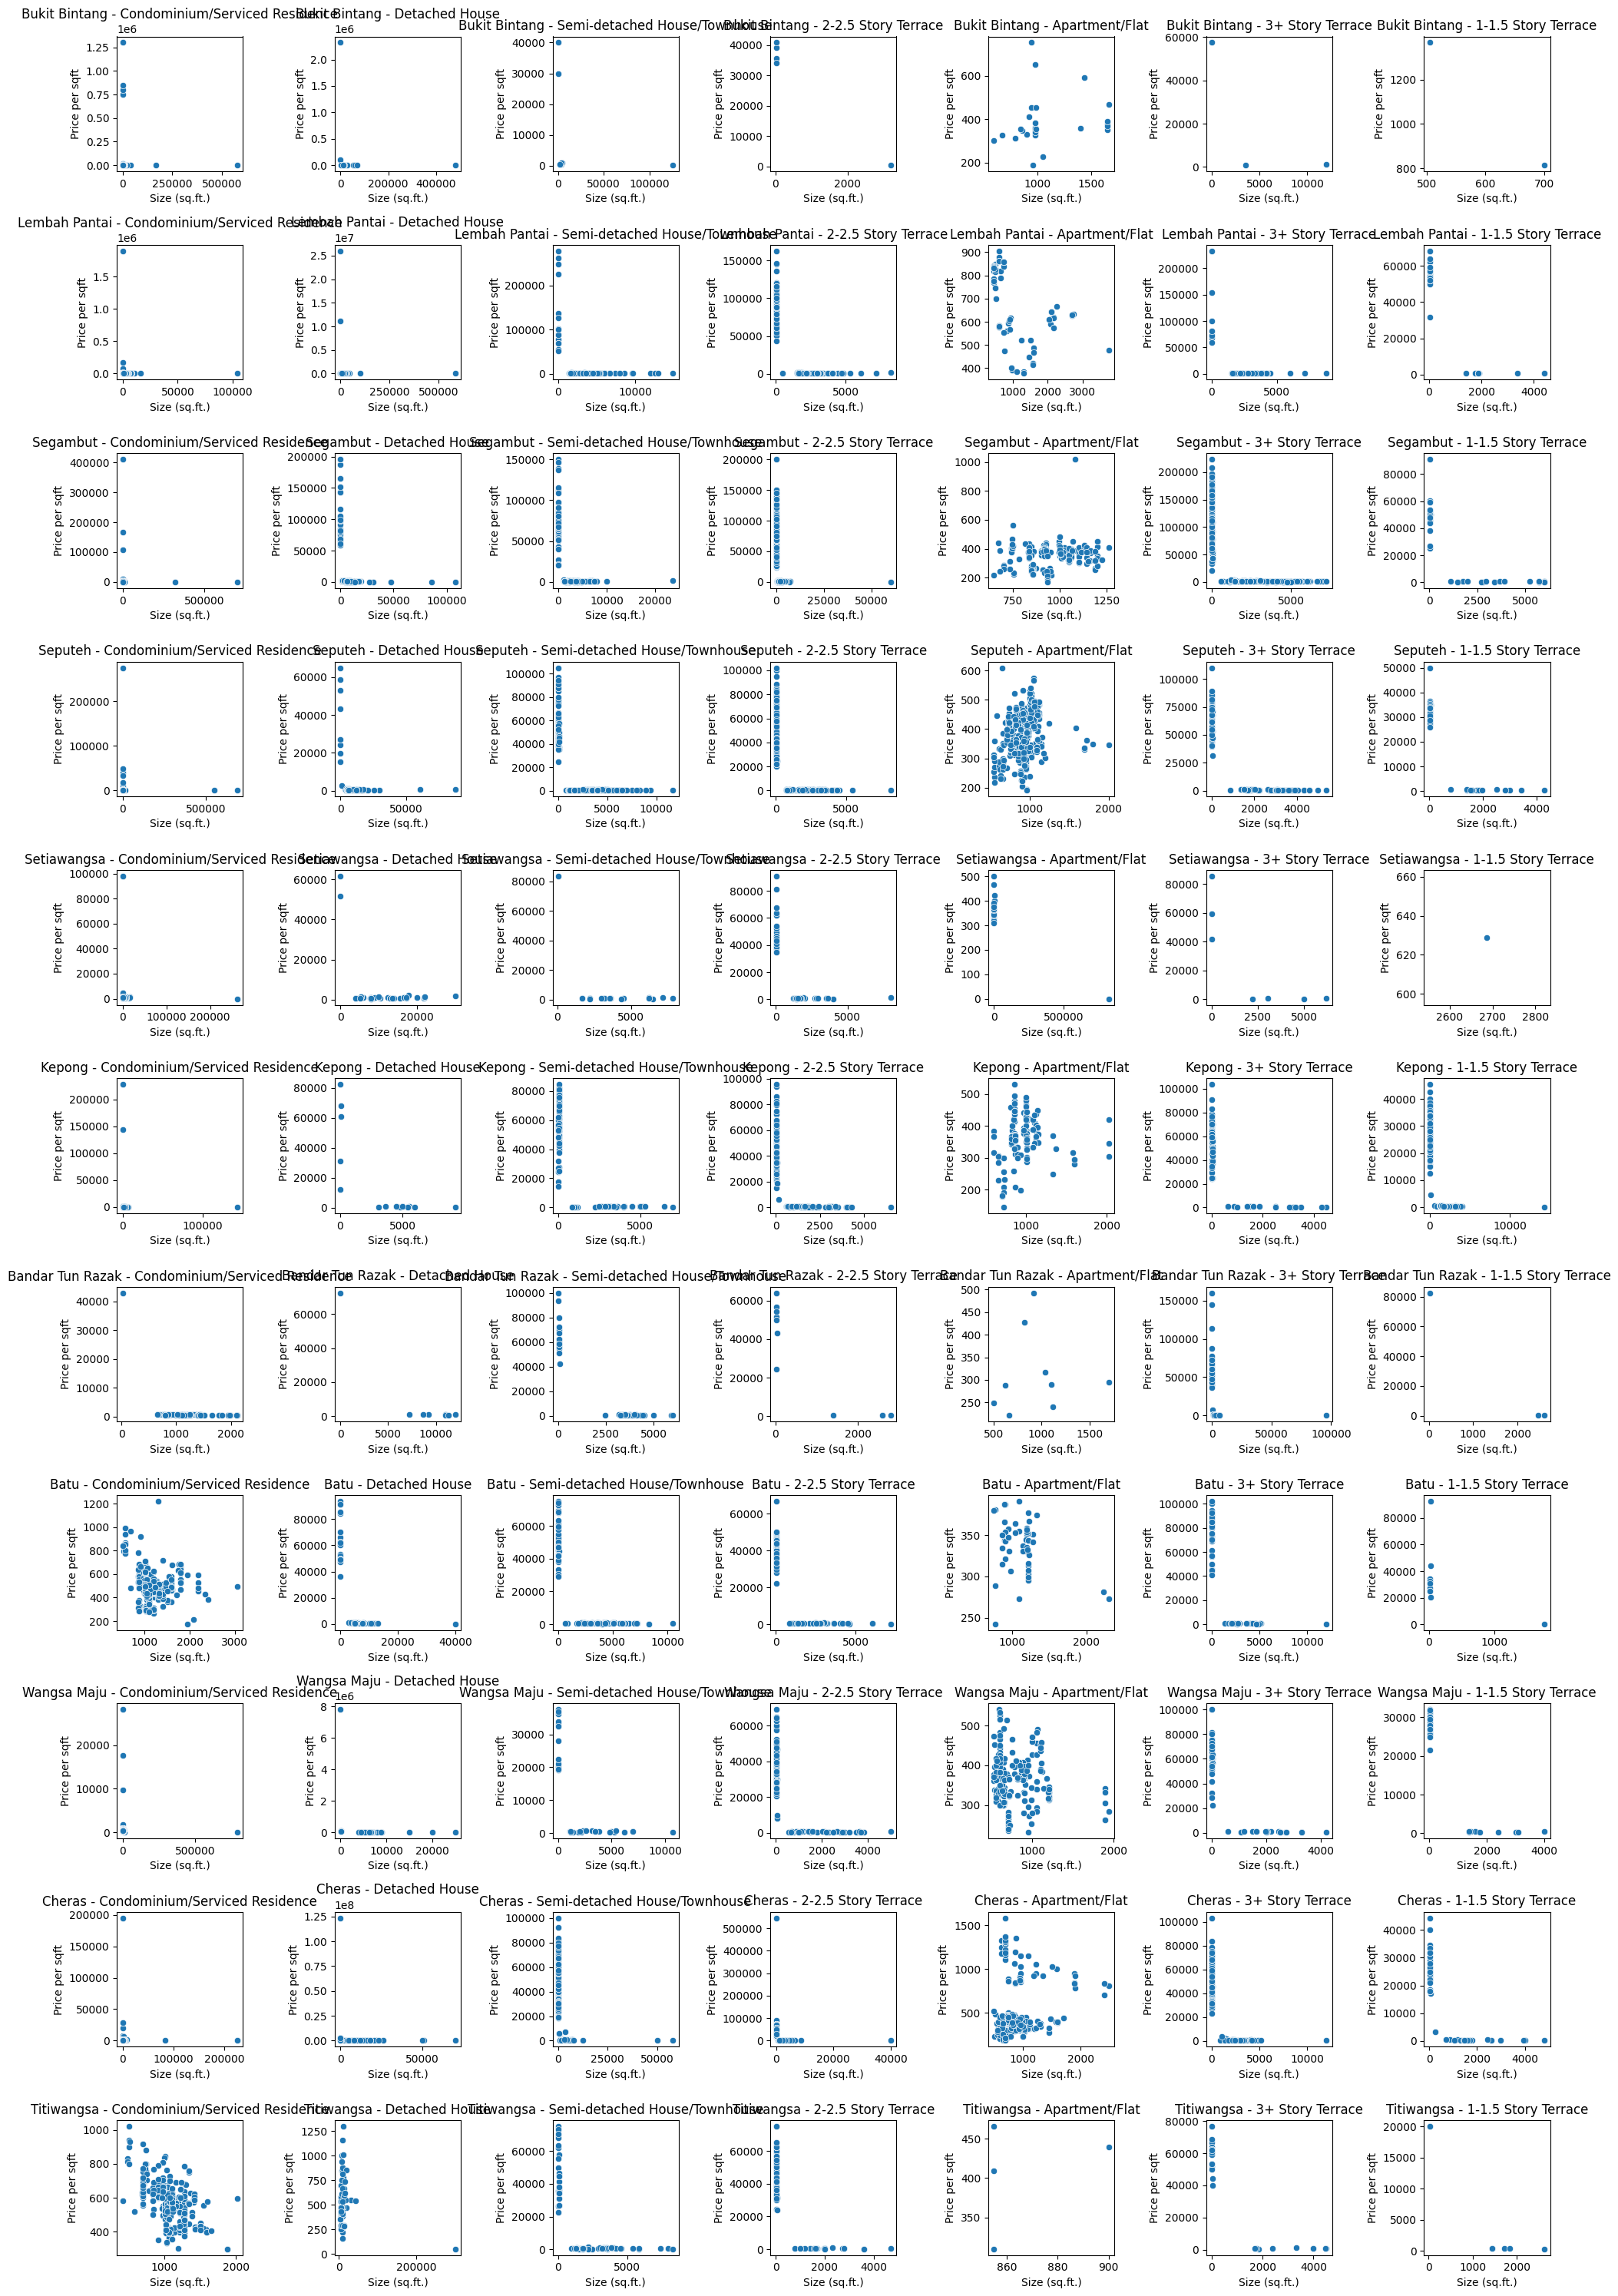

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique locations and property types
locations = df['Location'].unique()
property_types = df['Property Type'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(len(locations), len(property_types), figsize=(20, 30))  # Adjust figsize as needed

# Loop through locations and property types to create plots
for i, location in enumerate(locations):
    for j, property_type in enumerate(property_types):
        # Filter data for the current location and property type
        data = df[(df['Location'] == location) & (df['Property Type'] == property_type)]

        # Create scatter plot on the corresponding subplot
        sns.scatterplot(x='Size(sq.ft.)', y='Price per sqft', data=data, ax=axes[i, j])
        axes[i, j].set_title(f'{location} - {property_type}')
        axes[i, j].set_xlabel('Size (sq.ft.)')
        axes[i, j].set_ylabel('Price per sqft')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

###So we remove all outliers that is from the price per sqft for each property type, for each location.

In [ ]:
import pandas as pd

def remove_outliers_by_group(df, group_cols, target_col):
    """
    Removes outliers from a DataFrame based on the IQR method, grouped by specified columns.

    Args:
        df: The input DataFrame.
        group_cols: A list of columns to group by.
        target_col: The column containing the values to check for outliers.

    Returns:
        A new DataFrame with outliers removed.
    """

    # Create a copy of the DataFrame to avoid modifying the original
    cleaned_df = df.copy()

    for _, group in df.groupby(group_cols):
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers for the current group
        # Use boolean indexing to select rows within the bounds
        is_outlier = ~((group[target_col] >= lower_bound) & (group[target_col] <= upper_bound))

        # Remove outliers from the cleaned DataFrame
        cleaned_df = cleaned_df.drop(group[is_outlier].index)

    return cleaned_df

# Assuming your DataFrame is named 'df' and has 'Location', 'Property Type', and 'Price per sqft' columns
df = remove_outliers_by_group(df, ['Location', 'Property Type'], 'Price per sqft')

# Display the cleaned DataFrame (optional)
print(df)

            Location      Price  Car Parks                   Property Type  \
0      Bukit Bintang  1250000.0          2  Condominium/Serviced Residence   
1      Lembah Pantai  6800000.0          0                  Detached House   
2           Segambut  1030000.0          2  Condominium/Serviced Residence   
4            Seputeh   900000.0          2  Condominium/Serviced Residence   
5           Segambut  5350000.0          4                  Detached House   
...              ...        ...        ...                             ...   
53878  Lembah Pantai  5100000.0          0                  Detached House   
53879  Lembah Pantai  5000000.0          0                  Detached House   
53880  Lembah Pantai  5500000.0          0                  Detached House   
53881    Wangsa Maju   480000.0          0  Condominium/Serviced Residence   
53882    Wangsa Maju   540000.0          3  Condominium/Serviced Residence   

             Furnishing Size Category  Size(sq.ft.)  Total Room

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42157 entries, 0 to 53882
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        42157 non-null  object 
 1   Price           42157 non-null  float64
 2   Car Parks       42157 non-null  Int64  
 3   Property Type   42157 non-null  object 
 4   Furnishing      42157 non-null  object 
 5   Size Category   42157 non-null  object 
 6   Size(sq.ft.)    42157 non-null  float64
 7   Total Rooms     42157 non-null  Int64  
 8   Price per sqft  42157 non-null  float64
dtypes: Int64(2), float64(3), object(4)
memory usage: 3.3+ MB


###Now remove the outliers of price for each location, for each property types as well.

In [ ]:
import pandas as pd

def remove_outliers_by_group(df, group_cols, target_cols):
    """
    Removes outliers from a DataFrame based on the IQR method, grouped by specified columns,
    for multiple target columns.

    Args:
        df: The input DataFrame.
        group_cols: A list of columns to group by.
        target_cols: A list of columns containing the values to check for outliers.

    Returns:
        A new DataFrame with outliers removed.
    """

    cleaned_df = df.copy()  # Create a copy to avoid modifying the original DataFrame

    # Create a boolean mask to track outliers, initialized to all False
    all_outliers = pd.Series(False, index=cleaned_df.index)

    for _, group in df.groupby(group_cols):
        for target_col in target_cols:  # Iterate through target columns
            Q1 = group[target_col].quantile(0.25)
            Q3 = group[target_col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers for the current group and target column
            is_outlier = ~((group[target_col] >= lower_bound) & (group[target_col] <= upper_bound))

            # Update the all_outliers mask
            all_outliers[group[is_outlier].index] = True

    # Remove outliers from the cleaned DataFrame all at once
    cleaned_df = cleaned_df[~all_outliers]

    return cleaned_df

# Assuming your DataFrame is named 'df' and has 'Location', 'Property Type', 'Price', and 'Price per sqft' columns
df = remove_outliers_by_group(df, ['Location', 'Property Type'], ['Price', 'Price per sqft'])

# Display the cleaned DataFrame (optional)
print(df)

            Location      Price  Car Parks                   Property Type  \
0      Bukit Bintang  1250000.0          2  Condominium/Serviced Residence   
1      Lembah Pantai  6800000.0          0                  Detached House   
2           Segambut  1030000.0          2  Condominium/Serviced Residence   
4            Seputeh   900000.0          2  Condominium/Serviced Residence   
5           Segambut  5350000.0          4                  Detached House   
...              ...        ...        ...                             ...   
53878  Lembah Pantai  5100000.0          0                  Detached House   
53879  Lembah Pantai  5000000.0          0                  Detached House   
53880  Lembah Pantai  5500000.0          0                  Detached House   
53881    Wangsa Maju   480000.0          0  Condominium/Serviced Residence   
53882    Wangsa Maju   540000.0          3  Condominium/Serviced Residence   

             Furnishing Size Category  Size(sq.ft.)  Total Room

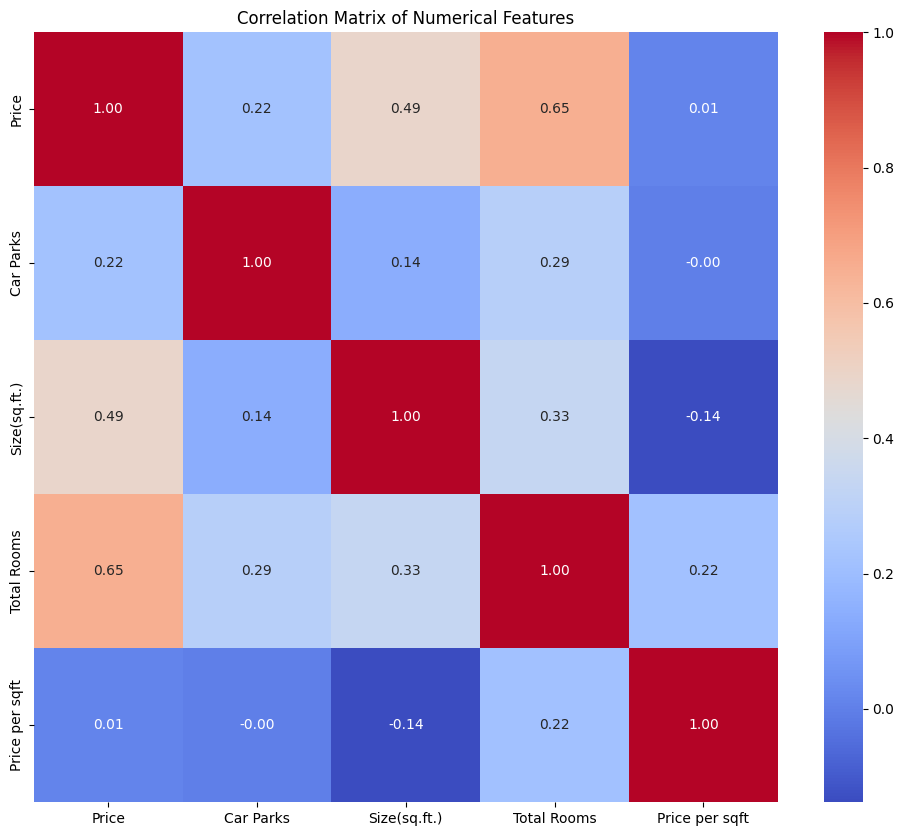

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###Generally for each location, each property type, the more the total rooms, the more prices, so we will analyse that again,remove all of those outliers again.

In [ ]:
import pandas as pd

def remove_outliers_by_group_relationship(df, group_cols, target_col, value_col):
    """
    Removes outliers from a DataFrame based on the IQR method, grouped by specified columns,
    considering the relationship between a target column and a value column.

    Args:
        df: The input DataFrame.
        group_cols: A list of columns to group by.
        target_col: The column containing the values to check for outliers (e.g., 'Price').
        value_col: The column related to the target column (e.g., 'Total Rooms').

    Returns:
        A new DataFrame with outliers removed.
    """
    cleaned_df = df.copy()
    all_outliers = pd.Series(False, index=cleaned_df.index)

    for _, group in df.groupby(group_cols):
        # Calculate IQR and bounds for 'target_col' based on 'value_col' quantiles
        Q1_value = group[value_col].quantile(0.25)
        Q3_value = group[value_col].quantile(0.75)

        # Filter data for each quantile range
        lower_quantile_group = group[group[value_col] <= Q1_value]
        upper_quantile_group = group[group[value_col] >= Q3_value]

        # Calculate IQR and bounds for 'target_col' in each quantile range
        Q1_lower = lower_quantile_group[target_col].quantile(0.25)
        Q3_lower = lower_quantile_group[target_col].quantile(0.75)
        IQR_lower = Q3_lower - Q1_lower
        lower_bound_lower = Q1_lower - 1.5 * IQR_lower
        upper_bound_lower = Q3_lower + 1.5 * IQR_lower

        Q1_upper = upper_quantile_group[target_col].quantile(0.25)
        Q3_upper = upper_quantile_group[target_col].quantile(0.75)
        IQR_upper = Q3_upper - Q1_upper
        lower_bound_upper = Q1_upper - 1.5 * IQR_upper
        upper_bound_upper = Q3_upper + 1.5 * IQR_upper

        # Identify outliers based on the relationship
        is_outlier = ~ (
            ((group[value_col] <= Q1_value) & (group[target_col] >= lower_bound_lower) & (group[target_col] <= upper_bound_lower)) |
            ((group[value_col] >= Q3_value) & (group[target_col] >= lower_bound_upper) & (group[target_col] <= upper_bound_upper)) |
            ((group[value_col] > Q1_value) & (group[value_col] < Q3_value))  # Keep data within the middle quantile range
        )

        # Update the all_outliers mask
        all_outliers[group[is_outlier].index] = True

    # Remove outliers from the cleaned DataFrame all at once
    cleaned_df = cleaned_df[~all_outliers]

    return cleaned_df

# Remove outliers based on 'Price' vs. 'Total Rooms' for each 'Location' and 'Property Type'
df = remove_outliers_by_group_relationship(df, ['Location', 'Property Type'], 'Price', 'Total Rooms')

# Display the cleaned DataFrame (optional)
print(df)

            Location      Price  Car Parks                   Property Type  \
0      Bukit Bintang  1250000.0          2  Condominium/Serviced Residence   
1      Lembah Pantai  6800000.0          0                  Detached House   
2           Segambut  1030000.0          2  Condominium/Serviced Residence   
4            Seputeh   900000.0          2  Condominium/Serviced Residence   
5           Segambut  5350000.0          4                  Detached House   
...              ...        ...        ...                             ...   
53878  Lembah Pantai  5100000.0          0                  Detached House   
53879  Lembah Pantai  5000000.0          0                  Detached House   
53880  Lembah Pantai  5500000.0          0                  Detached House   
53881    Wangsa Maju   480000.0          0  Condominium/Serviced Residence   
53882    Wangsa Maju   540000.0          3  Condominium/Serviced Residence   

             Furnishing Size Category  Size(sq.ft.)  Total Room

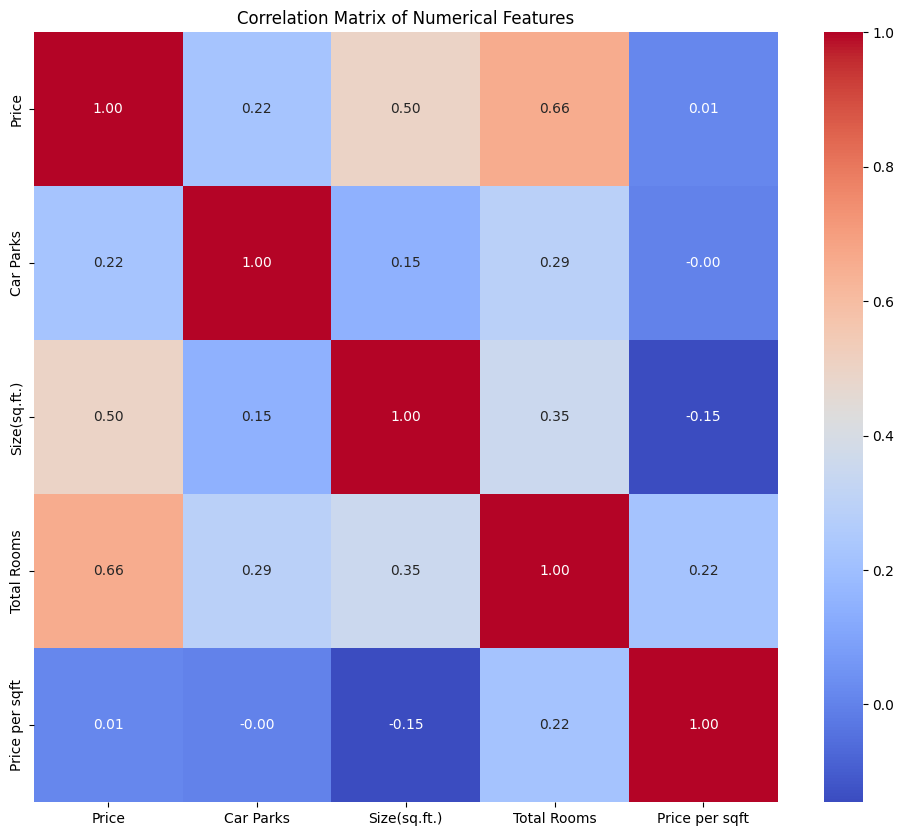

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###Generally also, the bigger each size(sq. ft.), generally the more the total rooms, so we see the relationship first.  

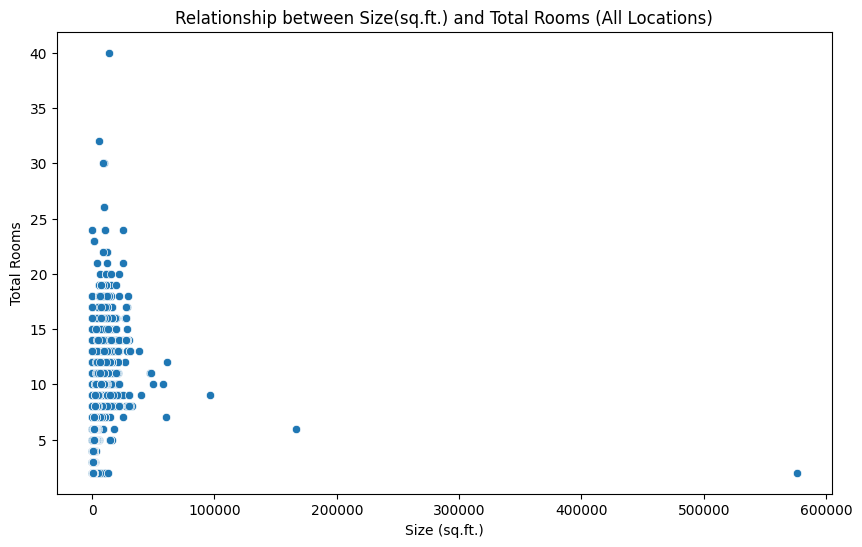

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.scatterplot(x='Size(sq.ft.)', y='Total Rooms', data=df)
plt.title('Relationship between Size(sq.ft.) and Total Rooms (All Locations)')
plt.xlabel('Size (sq.ft.)')
plt.ylabel('Total Rooms')
plt.show()

###Then we will create ratio of price vs total rooms columns.

In [ ]:
df['Price/Total Rooms'] = df['Price'] / df['Total Rooms']
df.head()

Location      Price  Car Parks                   Property Type  \
0  Bukit Bintang  1250000.0          2  Condominium/Serviced Residence   
1  Lembah Pantai  6800000.0          0                  Detached House   
2       Segambut  1030000.0          2  Condominium/Serviced Residence   
4        Seputeh   900000.0          2  Condominium/Serviced Residence   
5       Segambut  5350000.0          4                  Detached House   

         Furnishing Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  \
0   Fully Furnished      Built-Up        1335.0            6      936.329588   
1  Partly Furnished     Land Area        6900.0           13      985.507246   
2  Partly Furnished      Built-Up        1875.0            7      549.333333   
4  Partly Furnished      Built-Up        1513.0            8      594.844679   
5  Partly Furnished     Land Area        7200.0           11      743.055556   

   Price/Total Rooms  
0      208333.333333  
1      523076.923077  
2      147142.857143  
4           112500.0  
5      486363.636364

In [ ]:
import pandas as pd

def remove_outliers_by_price_persqft(df, target_col='Price', value_col='Price per sqft'):
    """
    Removes outliers from a DataFrame based on the IQR method, considering the
    relationship between 'Price' and 'Price per sqft'.

    Args:
        df: The input DataFrame.
        target_col: The column containing the values to check for outliers (default: 'Price').
        value_col: The column related to the target column (default: 'Price per sqft').

    Returns:
        A new DataFrame with outliers removed.
    """
    cleaned_df = df.copy()
    all_outliers = pd.Series(False, index=cleaned_df.index)

    # Calculate IQR and bounds for 'target_col' based on 'value_col' quantiles
    Q1_value = df[value_col].quantile(0.25)
    Q3_value = df[value_col].quantile(0.75)

    # Filter data for each quantile range
    lower_quantile_group = df[df[value_col] <= Q1_value]
    upper_quantile_group = df[df[value_col] >= Q3_value]

    # Calculate IQR and bounds for 'target_col' in each quantile range
    Q1_lower = lower_quantile_group[target_col].quantile(0.25)
    Q3_lower = lower_quantile_group[target_col].quantile(0.75)
    IQR_lower = Q3_lower - Q1_lower
    lower_bound_lower = Q1_lower - 1.5 * IQR_lower
    upper_bound_lower = Q3_lower + 1.5 * IQR_lower

    Q1_upper = upper_quantile_group[target_col].quantile(0.25)
    Q3_upper = upper_quantile_group[target_col].quantile(0.75)
    IQR_upper = Q3_upper - Q1_upper
    lower_bound_upper = Q1_upper - 1.5 * IQR_upper
    upper_bound_upper = Q3_upper + 1.5 * IQR_upper

    # Identify outliers based on the relationship
    is_outlier = ~ (
        ((df[value_col] <= Q1_value) & (df[target_col] >= lower_bound_lower) & (df[target_col] <= upper_bound_lower)) |
        ((df[value_col] >= Q3_value) & (df[target_col] >= lower_bound_upper) & (df[target_col] <= upper_bound_upper)) |
        ((df[value_col] > Q1_value) & (df[value_col] < Q3_value))  # Keep data within the middle quantile range
    )

    # Update the all_outliers mask
    all_outliers[df[is_outlier].index] = True

    # Remove outliers from the cleaned DataFrame all at once
    cleaned_df = cleaned_df[~all_outliers]

    return cleaned_df

# Create df2 and remove outliers based on 'Price' vs. 'Price per sqft'
df2 = remove_outliers_by_price_persqft(df)

# Calculate and print the correlation between 'Price' and 'Price per sqft' in df2
correlation_df2 = df2['Price'].corr(df2['Price per sqft'])
print(f"Correlation between Price and Price per sqft in df2: {correlation_df2}")

Correlation between Price and Price per sqft in df2: 0.024894486268171603


###Remove outliers, for each location, for each property of the price/Total rooms.





In [ ]:
import pandas as pd

def remove_outliers_by_group(df, group_cols, target_col):
    """
    Removes outliers from a DataFrame based on the IQR method, grouped by specified columns.

    Args:
        df: The input DataFrame.
        group_cols: A list of columns to group by.
        target_col: The column containing the values to check for outliers (e.g., 'Price/Total Rooms').

    Returns:
        A new DataFrame with outliers removed.
    """
    # Ensure 'Price/Total Rooms' column is created before outlier removal
    df['Price/Total Rooms'] = df['Price'] / df['Total Rooms']

    for _, group in df.groupby(group_cols):
        # Calculate IQR and bounds for the target column
        Q1 = group[target_col].quantile(0.25)
        Q3 = group[target_col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers for the current group
        group_cleaned = group[(group[target_col] >= lower_bound) & (group[target_col] <= upper_bound)]

        # Update the cleaned DataFrame with the cleaned group
        df.loc[group.index, :] = group_cleaned

    return df

# Remove outliers based on 'Price/Total Rooms' for each 'Location' and 'Property Type'
df = remove_outliers_by_group(df, ['Location', 'Property Type'], 'Price/Total Rooms')

# Display the cleaned DataFrame (optional)
print(df.head())
print(f"Shape of DataFrame after removing outliers: {df.shape}")

        Location      Price  Car Parks                   Property Type  \
0  Bukit Bintang  1250000.0          2  Condominium/Serviced Residence   
1  Lembah Pantai  6800000.0          0                  Detached House   
2       Segambut  1030000.0          2  Condominium/Serviced Residence   
4        Seputeh   900000.0          2  Condominium/Serviced Residence   
5       Segambut  5350000.0          4                  Detached House   

         Furnishing Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  \
0   Fully Furnished      Built-Up        1335.0            6      936.329588   
1  Partly Furnished     Land Area        6900.0           13      985.507246   
2  Partly Furnished      Built-Up        1875.0            7      549.333333   
4  Partly Furnished      Built-Up        1513.0            8      594.844679   
5  Partly Furnished     Land Area        7200.0           11      743.055556   

   Price/Total Rooms  
0      208333.333333  
1      523076.923077  
2    

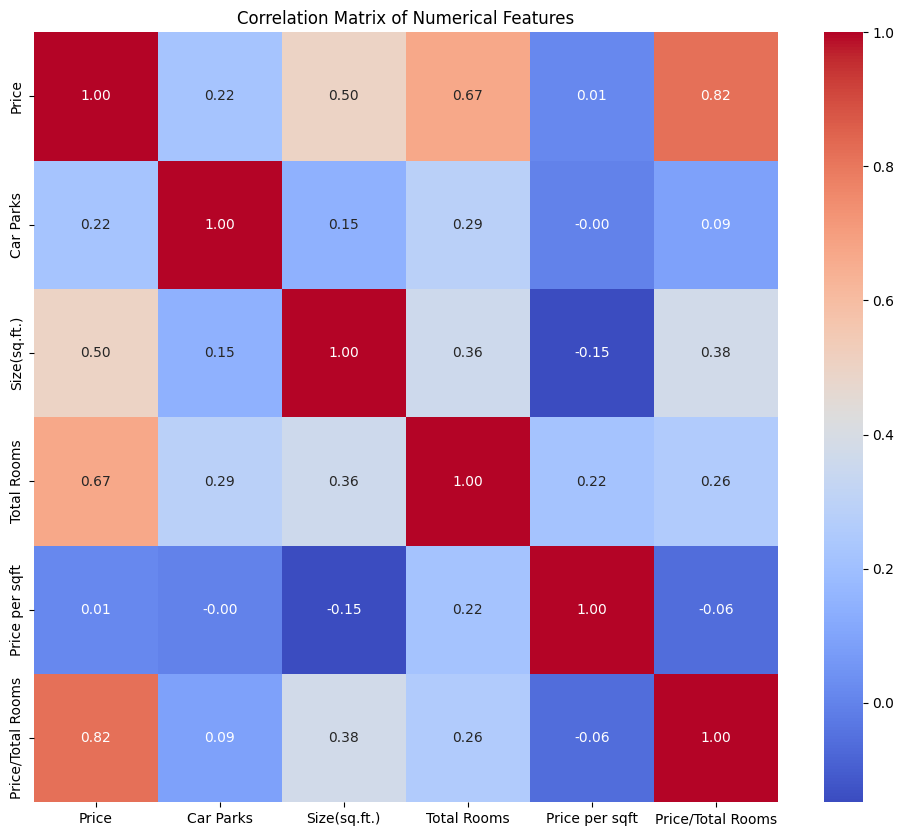

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###Realising car parks are kind of unrrelated, therefore we can remove them as well.



In [ ]:
df = df.drop('Car Parks', axis=1)


###For the size(sqft) for each property types, remove the outliers.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
property_types = df['Property Type'].unique()

for property_type in property_types:
    data = df[df['Property Type'] == property_type]  # Filter data for the current property type

    if len(data) > 0:
        Q1 = data['Size(sq.ft.)'].quantile(0.25)
        Q3 = data['Size(sq.ft.)'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        outliers_removed_data = data[(data['Size(sq.ft.)'] >= lower_bound) & (data['Size(sq.ft.)'] <= upper_bound)]

        # Update the original DataFrame
        df = pd.concat([df[~df.index.isin(data.index)], outliers_removed_data])
        #This involves first dropping the rows corresponding to the `data` slice from the original dataframe and then adding back the filtered data for that slice.

print(f"Shape of DataFrame after removing outliers: {df.shape}")

Shape of DataFrame after removing outliers: (36249, 9)


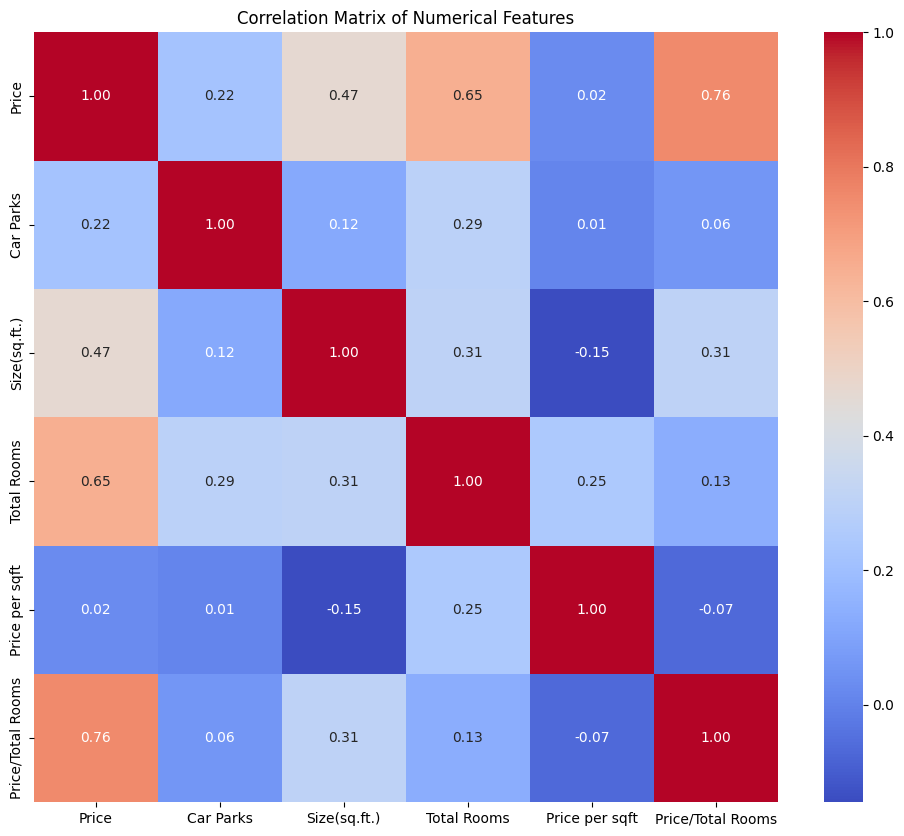

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df2

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###Generally, now, for each location, the more the total rooms, the higher the total price in general, so right now, we are going to build the histogram bar graph.

###for each location, for each property type, where the x for each subgraphs = total rooms, then the y for each subgraph = price

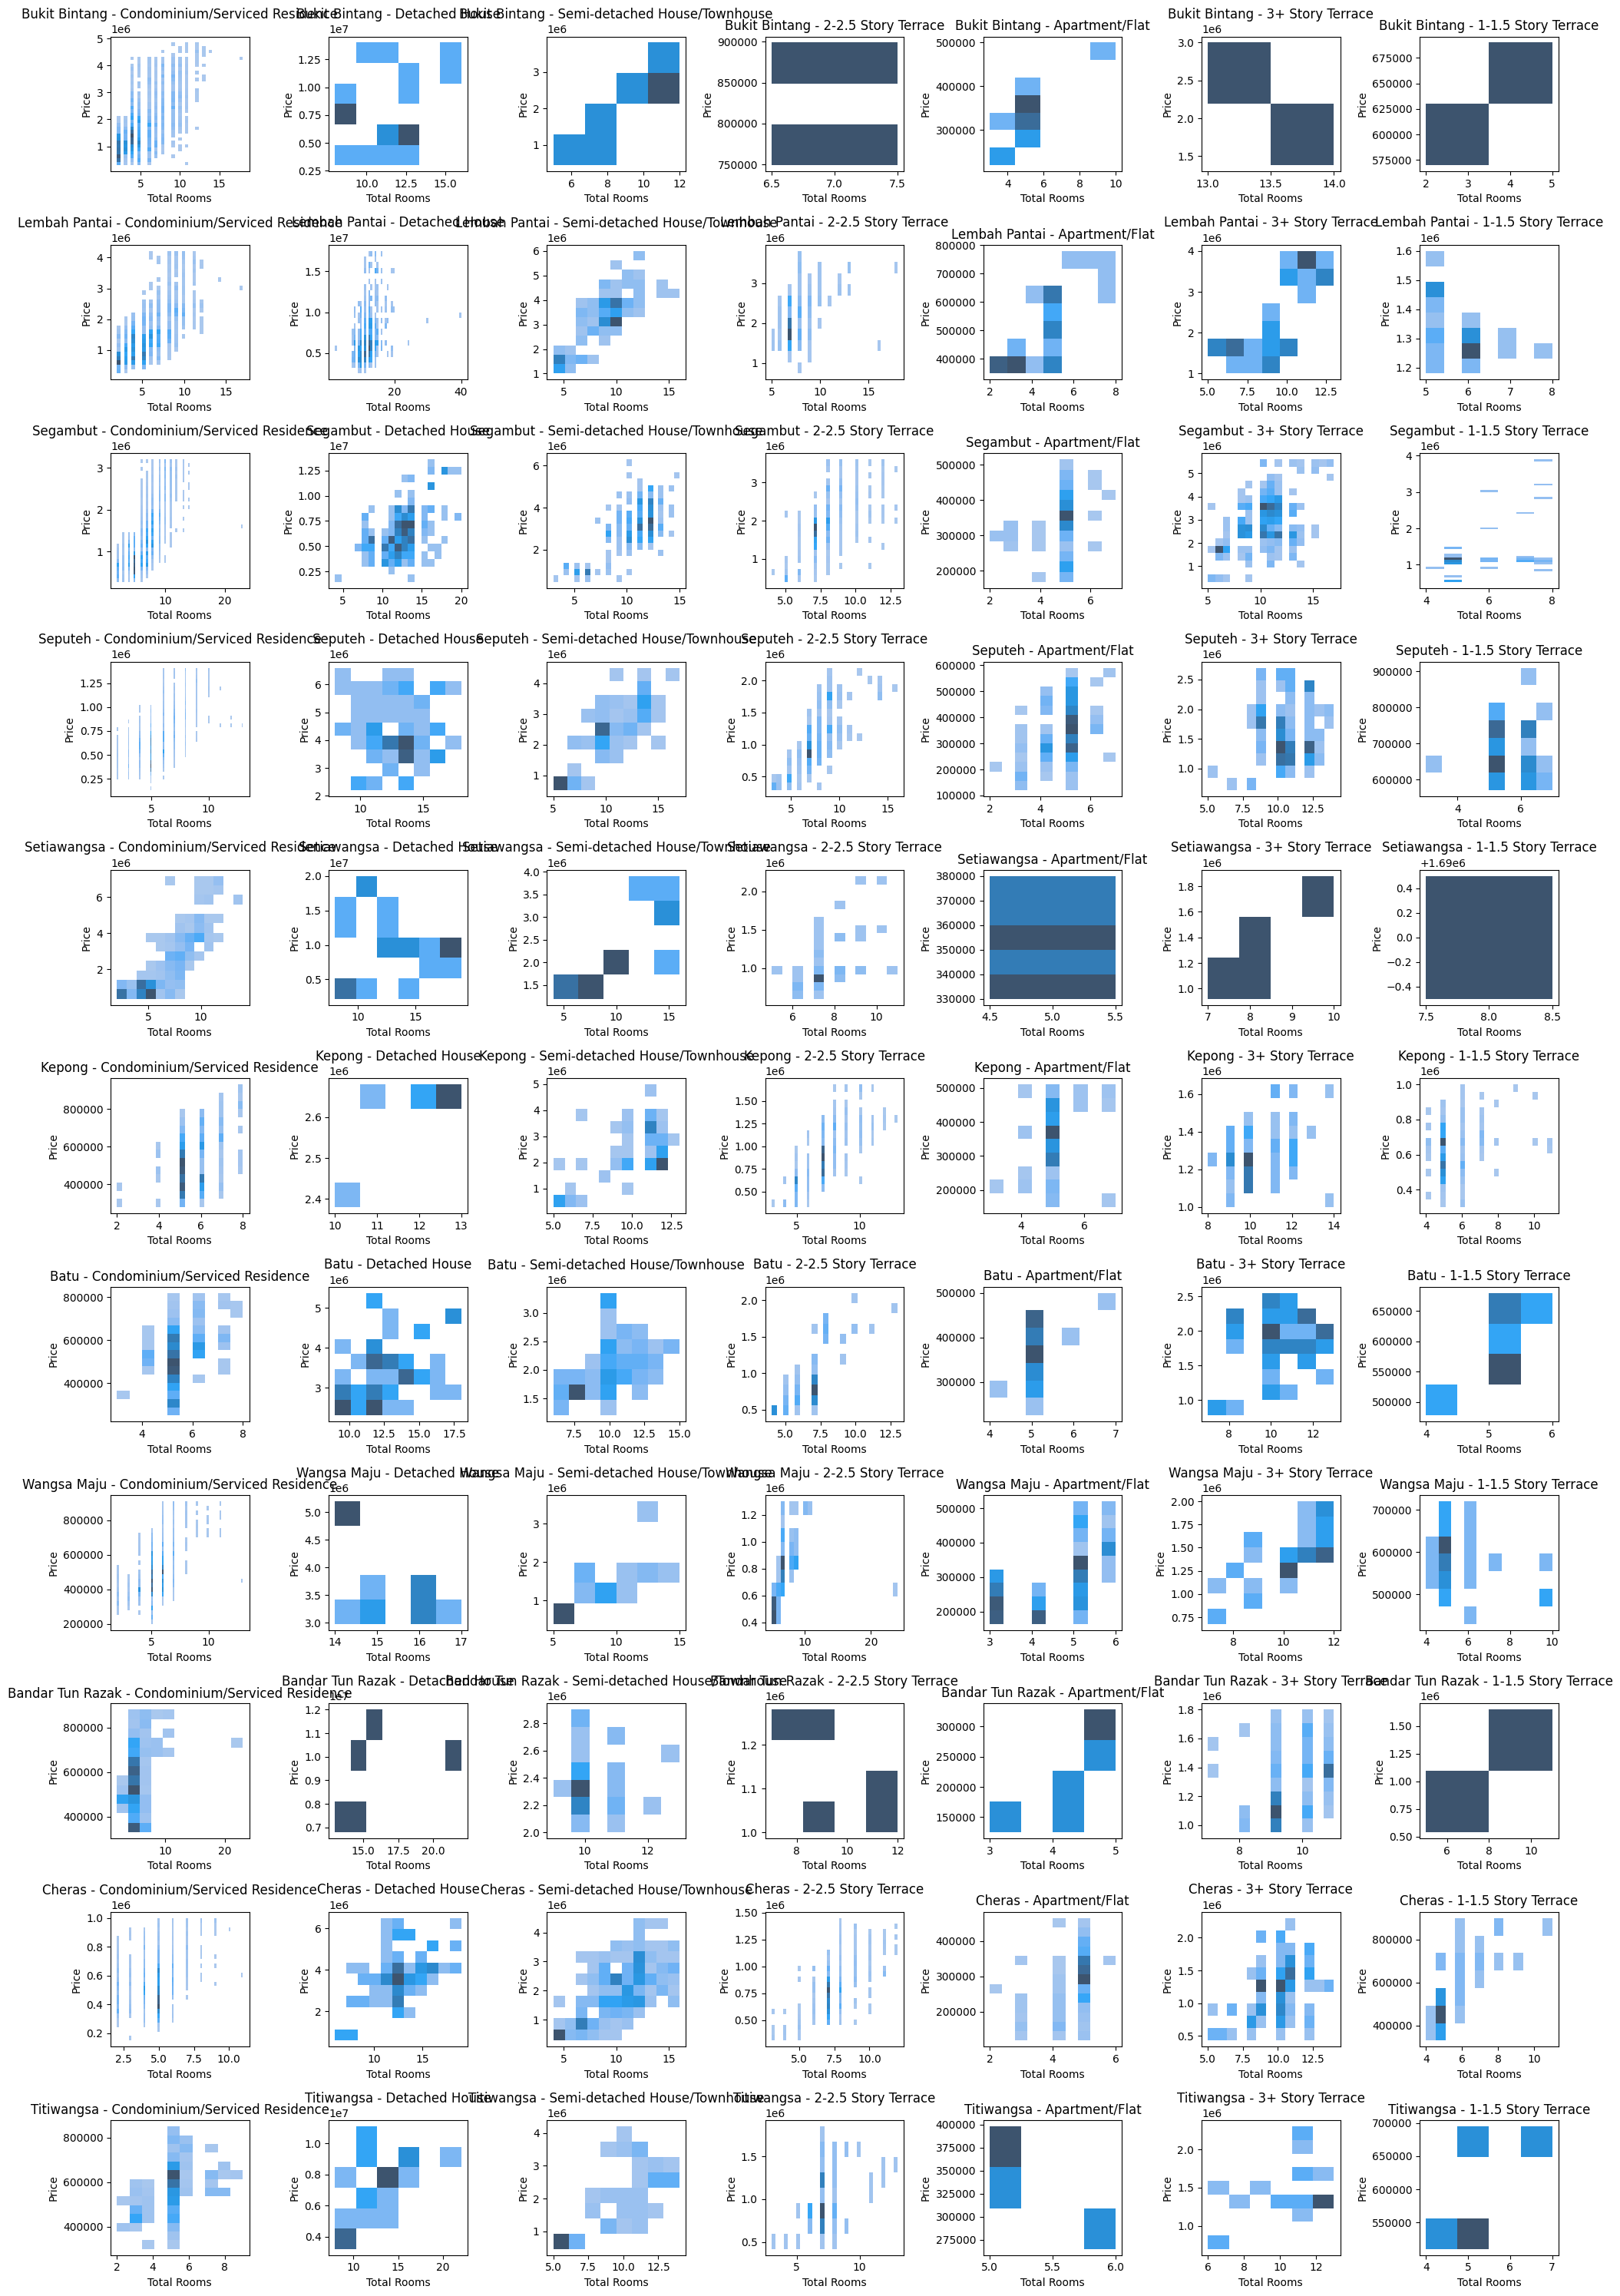

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique locations and property types
locations = df['Location'].unique()
property_types = df['Property Type'].unique()

# Create a grid of subplots
fig, axes = plt.subplots(len(locations), len(property_types), figsize=(20, 30))  # Adjust figsize as needed

# Loop through locations and property types to create plots
for i, location in enumerate(locations):
    for j, property_type in enumerate(property_types):
        # Filter data for the current location and property type
        data = df[(df['Location'] == location) & (df['Property Type'] == property_type)]

        # Create histogram bar plot on the corresponding subplot
        sns.histplot(x='Total Rooms', y='Price', data=data, ax=axes[i, j], bins='auto')  # Adjust bins as needed
        axes[i, j].set_title(f'{location} - {property_type}')
        axes[i, j].set_xlabel('Total Rooms')
        axes[i, j].set_ylabel('Price')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37080 entries, 0 to 53882
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           37080 non-null  object 
 1   Price              37080 non-null  float64
 2   Car Parks          37080 non-null  Int64  
 3   Property Type      37080 non-null  object 
 4   Furnishing         37080 non-null  object 
 5   Size Category      37080 non-null  object 
 6   Size(sq.ft.)       37080 non-null  float64
 7   Total Rooms        37080 non-null  Int64  
 8   Price per sqft     37080 non-null  float64
 9   Price/Total Rooms  37080 non-null  Float64
dtypes: Float64(1), Int64(2), float64(3), object(4)
memory usage: 3.2+ MB


###It is weird that how price vs price sqft has very low correlation, so we are expecting is it because each location determine different correlation?

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
locations = df['Location'].unique()

for location in locations:
    data = df[df['Location'] == location]  # Filter data for the current location
    correlation = data['Price'].corr(data['Price per sqft'])  # Calculate correlation
    print(f"Location: {location}, Correlation between Price and Price per sqft: {correlation}")

Location: Bukit Bintang, Correlation between Price and Price per sqft: 0.06806395407242972
Location: Lembah Pantai, Correlation between Price and Price per sqft: -0.06246074827365643
Location: Segambut, Correlation between Price and Price per sqft: 0.09881898543348074
Location: Seputeh, Correlation between Price and Price per sqft: 0.20836122354708567
Location: Setiawangsa, Correlation between Price and Price per sqft: -0.09283493418845534
Location: Kepong, Correlation between Price and Price per sqft: 0.5621676331120409
Location: Batu, Correlation between Price and Price per sqft: 0.25681457812690905
Location: Wangsa Maju, Correlation between Price and Price per sqft: 0.36033720988932366
Location: Bandar Tun Razak, Correlation between Price and Price per sqft: 0.30164982931864126
Location: Cheras, Correlation between Price and Price per sqft: 0.2911851801152314
Location: Titiwangsa, Correlation between Price and Price per sqft: 0.10221666563384539


In [ ]:
# Assuming your DataFrame is named 'df'
df = df.dropna(how='any')

###Print out each correlation then has less than 0.5 and observe the data whats going on.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
locations = df['Location'].unique()
property_types = df['Property Type'].unique()

for location in locations:
    for property_type in property_types:
        data = df[(df['Location'] == location) & (df['Property Type'] == property_type)]

        if len(data) > 0:
            correlation = data['Price'].corr(data['Price per sqft'])

            if correlation < 0.5:
                print(f"Location: {location}, Property Type: {property_type}, Correlation: {correlation}")
                print(data.sample(min(5, len(data))))  # Print a sample of up to 5 rows
                # Further analysis or visualization can be added here
        else:
            print(f"Location: {location}, Property Type: {property_type}, No data available for correlation")

Location: Bukit Bintang, Property Type: Condominium/Serviced Residence, Correlation: 0.28512352535817026
            Location      Price  Car Parks                   Property Type  \
8627   Bukit Bintang  2178900.0          1  Condominium/Serviced Residence   
2169   Bukit Bintang  1800000.0          2  Condominium/Serviced Residence   
22050  Bukit Bintang   880000.0          1  Condominium/Serviced Residence   
31819  Bukit Bintang  1300000.0          0  Condominium/Serviced Residence   
2335   Bukit Bintang   573000.0          0  Condominium/Serviced Residence   

            Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
8627   Fully Furnished      Built-Up        1614.0            5   
2169       Unfurnished      Built-Up        1701.0            8   
22050  Fully Furnished      Built-Up         710.0            2   
31819  Fully Furnished      Built-Up        1464.0            4   
2335   Fully Furnished      Built-Up         550.0            3   

       Price per sqft  

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Location: Kepong, Property Type: 1-1.5 Story Terrace, Correlation: 0.3141238104514203
      Location     Price  Car Parks        Property Type        Furnishing  \
4724    Kepong  748000.0          2  1-1.5 Story Terrace  Partly Furnished   
6389    Kepong  680000.0          0  1-1.5 Story Terrace  Partly Furnished   
52083   Kepong  670000.0          0  1-1.5 Story Terrace       Unfurnished   
29315   Kepong  450000.0          0  1-1.5 Story Terrace  Partly Furnished   
25993   Kepong  720000.0          2  1-1.5 Story Terrace  Partly Furnished   

      Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  \
4724      Land Area          22.0            5    34000.000000   
6389      Land Area          22.0            5    30909.090909   
52083     Land Area        1870.0            7      358.288770   
29315      Built-Up        1430.0            6      314.685315   
25993     Land Area          22.0            5    32727.272727   

       Price/Total Rooms  
4724            14960

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37080 entries, 0 to 53882
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           37080 non-null  object 
 1   Price              37080 non-null  float64
 2   Car Parks          37080 non-null  Int64  
 3   Property Type      37080 non-null  object 
 4   Furnishing         37080 non-null  object 
 5   Size Category      37080 non-null  object 
 6   Size(sq.ft.)       37080 non-null  float64
 7   Total Rooms        37080 non-null  Int64  
 8   Price per sqft     37080 non-null  float64
 9   Price/Total Rooms  37080 non-null  Float64
dtypes: Float64(1), Int64(2), float64(3), object(4)
memory usage: 3.2+ MB


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
locations = df['Location'].unique()
property_types = df['Property Type'].unique()

for location in locations:
    for property_type in property_types:
        data = df[(df['Location'] == location) & (df['Property Type'] == property_type)]

        if len(data) > 0:
            correlation = data['Price'].corr(data['Price per sqft'])
            print(f"Location: {location}, Property Type: {property_type}, Correlation: {correlation}")
        else:
            print(f"Location: {location}, Property Type: {property_type}, No data available for correlation")

Location: Bukit Bintang, Property Type: Condominium/Serviced Residence, Correlation: 0.28512352535817026
Location: Bukit Bintang, Property Type: Detached House, Correlation: 0.4913250439773034
Location: Bukit Bintang, Property Type: Semi-detached House/Townhouse, Correlation: 0.9812322528605911
Location: Bukit Bintang, Property Type: 2-2.5 Story Terrace, Correlation: 0.9999999999999997
Location: Bukit Bintang, Property Type: Apartment/Flat, Correlation: 0.594064106242501
Location: Bukit Bintang, Property Type: 3+ Story Terrace, Correlation: -0.9999999999999998
Location: Bukit Bintang, Property Type: 1-1.5 Story Terrace, Correlation: 1.0
Location: Lembah Pantai, Property Type: Condominium/Serviced Residence, Correlation: 0.2594771644838429
Location: Lembah Pantai, Property Type: Detached House, Correlation: 0.1999077667325944
Location: Lembah Pantai, Property Type: Semi-detached House/Townhouse, Correlation: 0.44430153411094436
Location: Lembah Pantai, Property Type: 2-2.5 Story Terrace

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Location: Bandar Tun Razak, Property Type: Detached House, Correlation: 0.569451027276649
Location: Bandar Tun Razak, Property Type: Semi-detached House/Townhouse, Correlation: 0.044910628068379296
Location: Bandar Tun Razak, Property Type: 2-2.5 Story Terrace, Correlation: 0.9197275969105763
Location: Bandar Tun Razak, Property Type: Apartment/Flat, Correlation: 0.6574735618787976
Location: Bandar Tun Razak, Property Type: 3+ Story Terrace, Correlation: -0.11271785323692655
Location: Bandar Tun Razak, Property Type: 1-1.5 Story Terrace, Correlation: 1.0
Location: Cheras, Property Type: Condominium/Serviced Residence, Correlation: 0.4944467892090706
Location: Cheras, Property Type: Detached House, Correlation: 0.6664376650148012
Location: Cheras, Property Type: Semi-detached House/Townhouse, Correlation: 0.2760819321484545
Location: Cheras, Property Type: 2-2.5 Story Terrace, Correlation: 0.3165728705436225
Location: Cheras, Property Type: Apartment/Flat, Correlation: 0.757509807883954

Then we realised, why correlation can be less than 0.5, lets find out.


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
locations = df['Location'].unique()
property_types = df['Property Type'].unique()

for location in locations:
    for property_type in property_types:
        data = df[(df['Location'] == location) & (df['Property Type'] == property_type)]

        if len(data) > 0:
            correlation = data['Price'].corr(data['Price per sqft'])

            if correlation < 0.5:
                print(f"Location: {location}, Property Type: {property_type}, Correlation: {correlation}")
                print(data.sample(min(5, len(data))))  # Print a sample of up to 5 rows
                # Further analysis or visualization can be added here
        else:
            print(f"Location: {location}, Property Type: {property_type}, No data available for correlation")

Location: Bukit Bintang, Property Type: Condominium/Serviced Residence, Correlation: 0.28512352535817026
            Location      Price  Car Parks                   Property Type  \
45113  Bukit Bintang  3100000.0          0  Condominium/Serviced Residence   
12636  Bukit Bintang  1818500.0          0  Condominium/Serviced Residence   
24977  Bukit Bintang   660000.0          0  Condominium/Serviced Residence   
27310  Bukit Bintang   750000.0          1  Condominium/Serviced Residence   
9645   Bukit Bintang  1300000.0          1  Condominium/Serviced Residence   

             Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
45113  Partly Furnished      Built-Up        3502.0           10   
12636       Unfurnished     Land Area        2250.0            9   
24977  Partly Furnished      Built-Up         450.0            2   
27310  Partly Furnished      Built-Up         550.0            2   
9645    Fully Furnished      Built-Up        1259.0            5   

       Price per 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Location: Wangsa Maju, Property Type: Detached House, Correlation: 0.24273009790863007
          Location      Price  Car Parks   Property Type        Furnishing  \
44985  Wangsa Maju  3500000.0          0  Detached House  Partly Furnished   
48143  Wangsa Maju  3500000.0          4  Detached House  Partly Furnished   
31154  Wangsa Maju  2980000.0          0  Detached House   Fully Furnished   
1578   Wangsa Maju  3000000.0          0  Detached House  Partly Furnished   
30130  Wangsa Maju  5000000.0          0  Detached House   Fully Furnished   

      Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  \
44985     Land Area        5490.0           16      637.522769   
48143     Land Area        3940.0           15      888.324873   
31154     Land Area        4734.0           17      629.488804   
1578      Land Area        5000.0           14      600.000000   
30130     Land Area        6700.0           14      746.268657   

       Price/Total Rooms  
44985           2187

###Considering price vs price per sqrt, different location may be different price, so now lets do the correlation between price per sqrt vs the each location.

In [ ]:
df['Price per sqft'] = df['Price'] / df['Size(sq.ft.)']


# Display the updated DataFrame (optional)
print(df.head())

        Location      Price  Car Parks                   Property Type  \
0  Bukit Bintang  1250000.0          2  Condominium/Serviced Residence   
1  Lembah Pantai  6800000.0          0                  Detached House   
2       Segambut  1030000.0          2  Condominium/Serviced Residence   
4        Seputeh   900000.0          2  Condominium/Serviced Residence   
5       Segambut  5350000.0          4                  Detached House   

         Furnishing Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  \
0   Fully Furnished      Built-Up        1335.0            6      936.329588   
1  Partly Furnished     Land Area        6900.0           13      985.507246   
2  Partly Furnished      Built-Up        1875.0            7      549.333333   
4  Partly Furnished      Built-Up        1513.0            8      594.844679   
5  Partly Furnished     Land Area        7200.0           11      743.055556   

   Price/Total Rooms  
0      208333.333333  
1      523076.923077  
2    

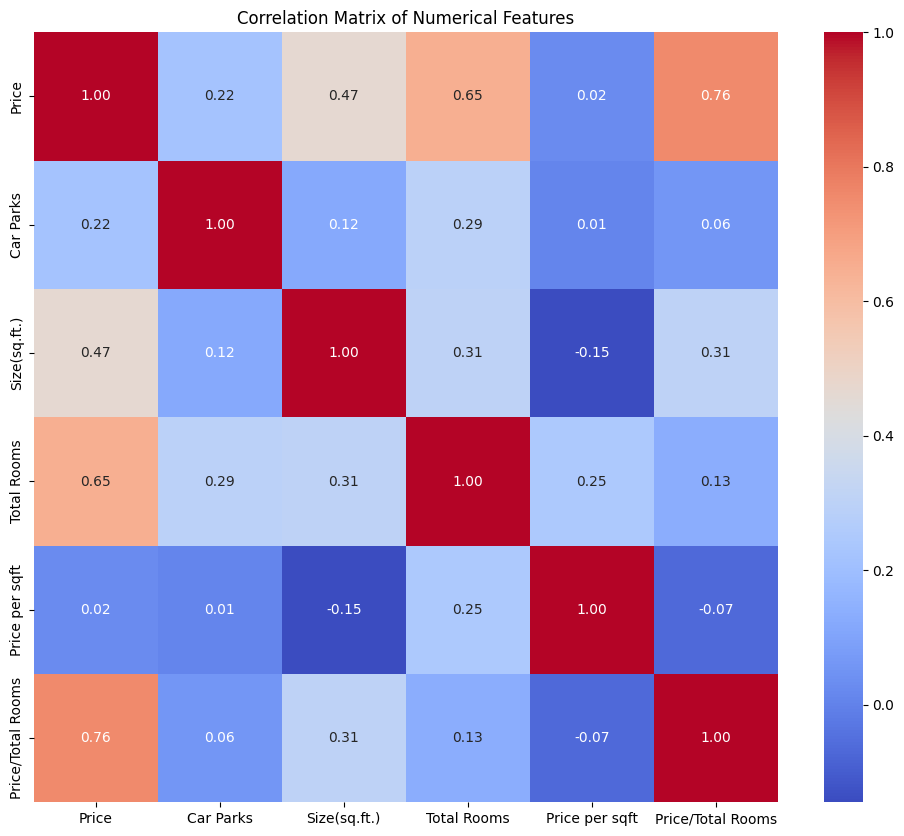

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df2

# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###Price per sqft no linear correlated, lets try spareman.

In [ ]:
# Calculate Spearman correlation for all numeric columns
spearman_corr = df.select_dtypes(include=['number']).corr(method='spearman')

# Display the results
print(spearman_corr)

                      Price  Car Parks  Size(sq.ft.)  Total Rooms  \
Price              1.000000   0.119330      0.580629     0.600872   
Car Parks          0.119330   1.000000      0.208036     0.234092   
Size(sq.ft.)       0.580629   0.208036      1.000000     0.567935   
Total Rooms        0.600872   0.234092      0.567935     1.000000   
Price per sqft     0.615086  -0.059448     -0.216890     0.123370   
Price/Total Rooms  0.820002  -0.021259      0.353819     0.087654   

                   Price per sqft  Price/Total Rooms  
Price                    0.615086           0.820002  
Car Parks               -0.059448          -0.021259  
Size(sq.ft.)            -0.216890           0.353819  
Total Rooms              0.123370           0.087654  
Price per sqft           1.000000           0.661729  
Price/Total Rooms        0.661729           1.000000  


In [ ]:
import pandas as pd

# Group by Location and Property Type
grouped = df.groupby(['Location', 'Property Type'])

# Calculate Spearman correlation for each group
for name, group in grouped:
    correlation = group['Price'].corr(group['Price per sqft'], method='spearman')
    print(f"Location: {name[0]}, Property Type: {name[1]}, Spearman Correlation: {correlation}")

Location: Bandar Tun Razak, Property Type: 1-1.5 Story Terrace, Spearman Correlation: 0.9999999999999999
Location: Bandar Tun Razak, Property Type: 2-2.5 Story Terrace, Spearman Correlation: 0.9999999999999999
Location: Bandar Tun Razak, Property Type: 3+ Story Terrace, Spearman Correlation: 0.2563241467509571
Location: Bandar Tun Razak, Property Type: Apartment/Flat, Spearman Correlation: 0.7142857142857143
Location: Bandar Tun Razak, Property Type: Condominium/Serviced Residence, Spearman Correlation: 0.44529755176129343
Location: Bandar Tun Razak, Property Type: Detached House, Spearman Correlation: 0.6
Location: Bandar Tun Razak, Property Type: Semi-detached House/Townhouse, Spearman Correlation: 0.306648292922605
Location: Batu, Property Type: 1-1.5 Story Terrace, Spearman Correlation: -0.07363210405107239
Location: Batu, Property Type: 2-2.5 Story Terrace, Spearman Correlation: 0.2708175978528649
Location: Batu, Property Type: 3+ Story Terrace, Spearman Correlation: 0.29991411281

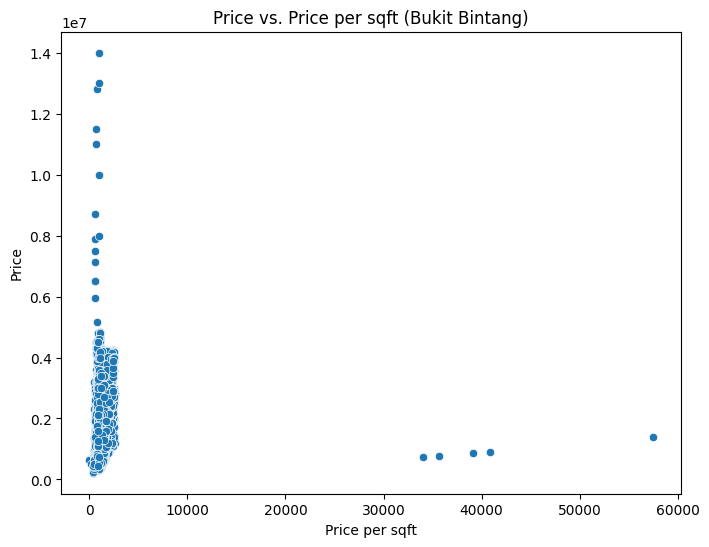

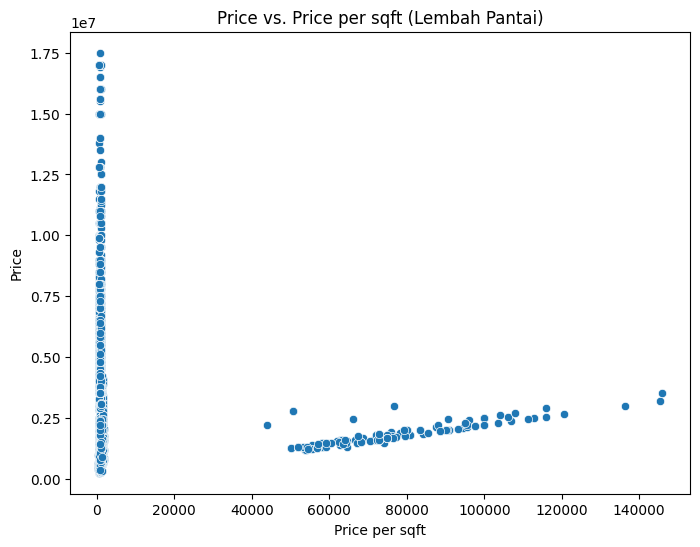

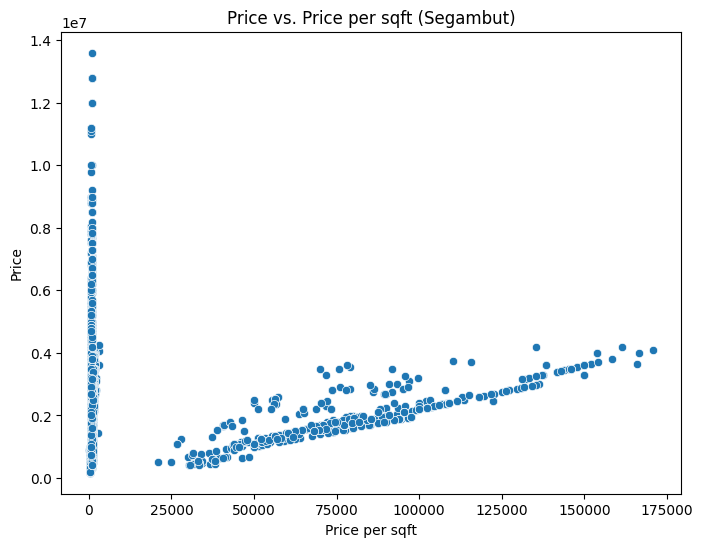

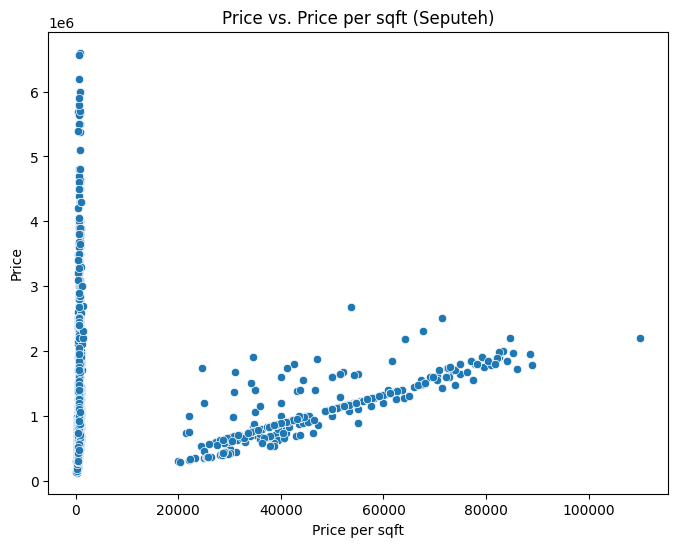

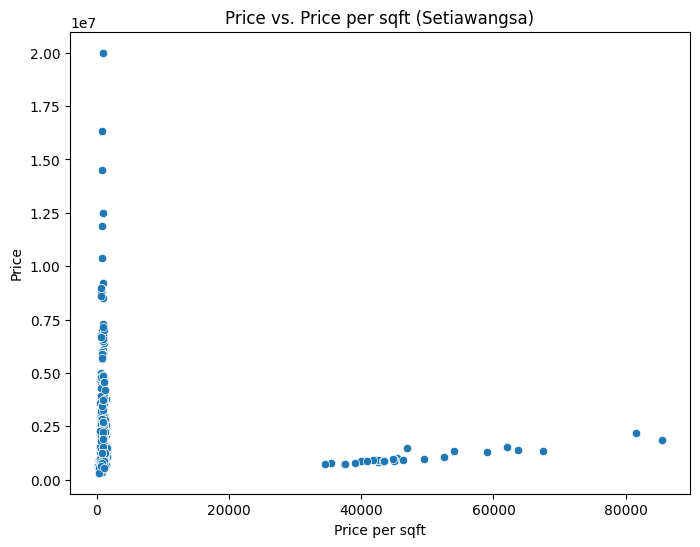

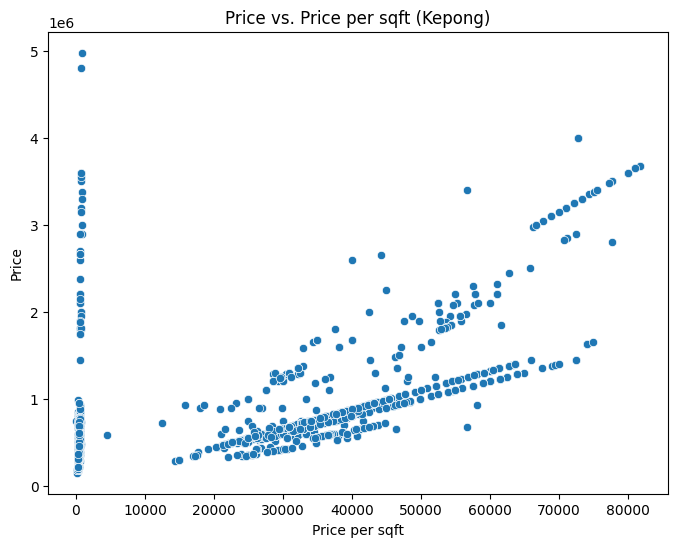

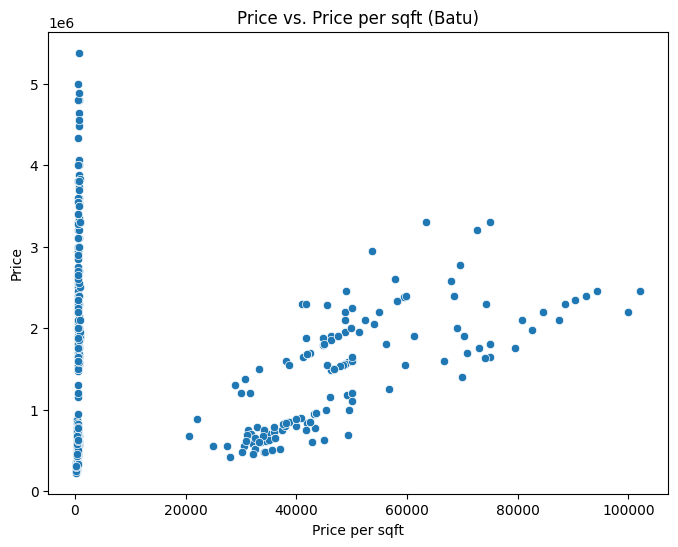

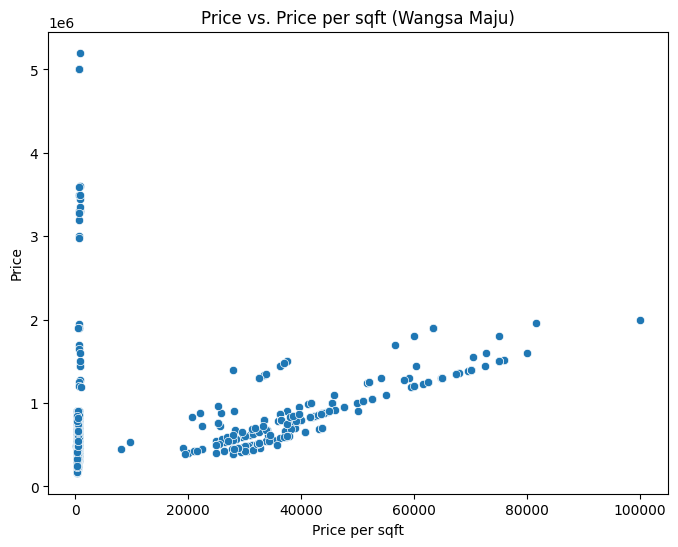

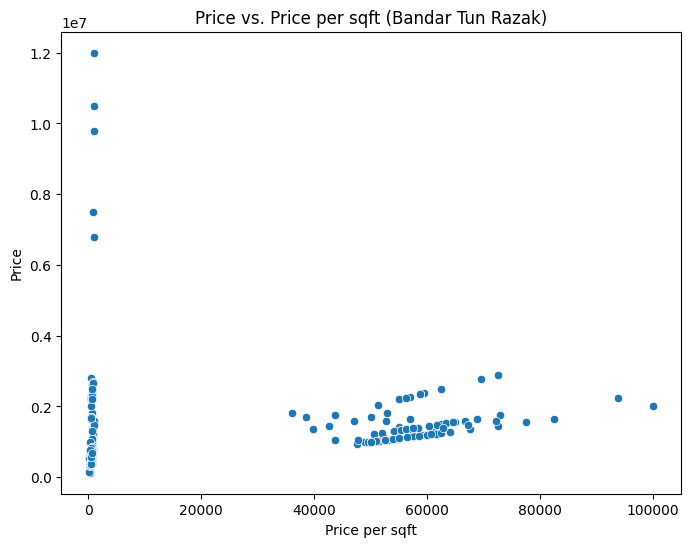

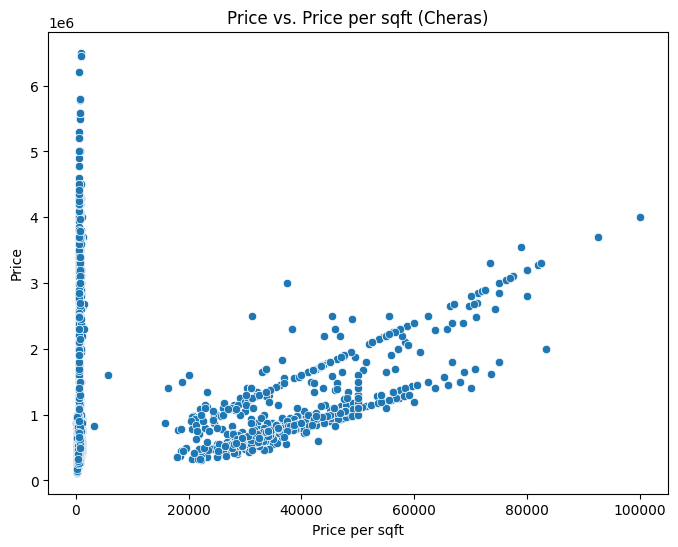

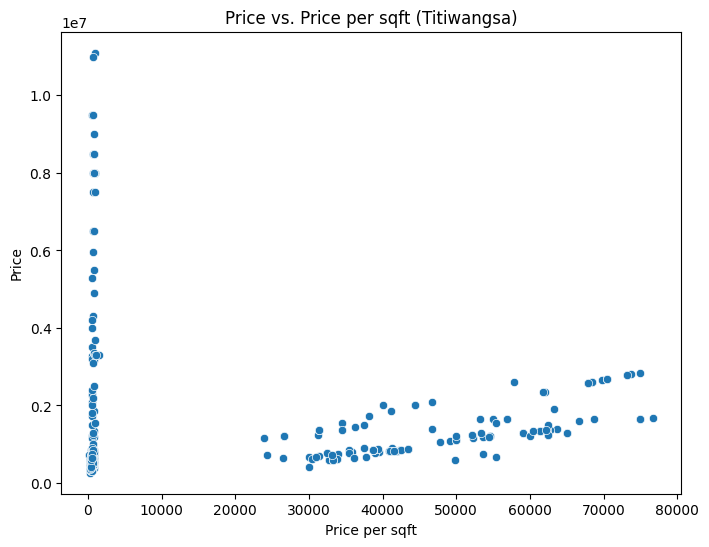

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = df

# Get unique locations
locations = df_cleaned['Location'].unique()

# Create scatter plots for each location
for location in locations:
    # Filter data for the current location
    location_data = df_cleaned[df_cleaned['Location'] == location]

    # Create scatter plot
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.scatterplot(x='Price per sqft', y='Price', data=location_data)
    plt.title(f'Price vs. Price per sqft ({location})')
    plt.xlabel('Price per sqft')
    plt.ylabel('Price')
    plt.show()

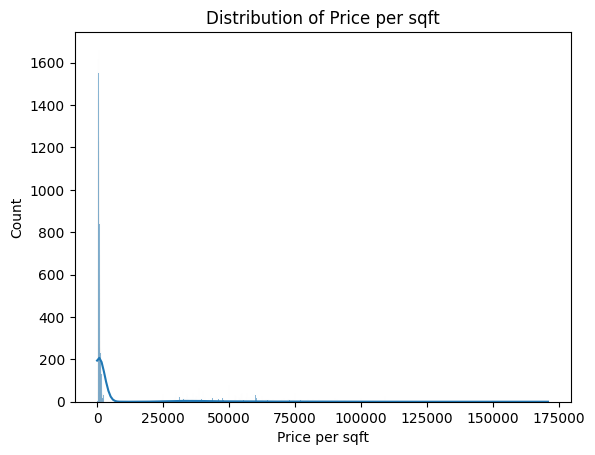

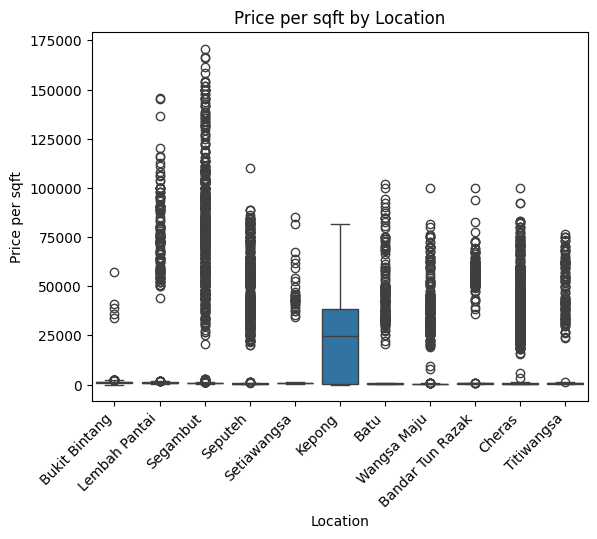

Shapiro-Wilk Test: Statistic = 0.372431394242441, p-value = 3.129573195878988e-140


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 37080.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Histogram and Density Plot
sns.histplot(df['Price per sqft'], kde=True)
plt.title('Distribution of Price per sqft')
plt.show()

# Box Plot for Price per sqft by Location
sns.boxplot(x='Location', y='Price per sqft', data=df)
plt.title('Price per sqft by Location')
plt.xticks(rotation=45, ha='right')
plt.show()

# Shapiro-Wilk Test for Normality
statistic, p_value = stats.shapiro(df['Price per sqft'])
print(f"Shapiro-Wilk Test: Statistic = {statistic}, p-value = {p_value}")

In [ ]:
import pandas as pd

# Calculate quantiles and IQR
Q1 = df_cleaned['Price per sqft'].quantile(0.25)
Q3 = df_cleaned['Price per sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
df_no_outliers = df_cleaned[(df_cleaned['Price per sqft'] >= lower_bound) & (df_cleaned['Price per sqft'] <= upper_bound)]

# Display the new DataFrame (optional)
print(df_no_outliers.head())

        Location      Price  Car Parks                   Property Type  \
0  Bukit Bintang  1250000.0          2  Condominium/Serviced Residence   
1  Lembah Pantai  6800000.0          0                  Detached House   
2       Segambut  1030000.0          2  Condominium/Serviced Residence   
4        Seputeh   900000.0          2  Condominium/Serviced Residence   
5       Segambut  5350000.0          4                  Detached House   

         Furnishing Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  \
0   Fully Furnished      Built-Up        1335.0            6      936.329588   
1  Partly Furnished     Land Area        6900.0           13      985.507246   
2  Partly Furnished      Built-Up        1875.0            7      549.333333   
4  Partly Furnished      Built-Up        1513.0            8      594.844679   
5  Partly Furnished     Land Area        7200.0           11      743.055556   

   Price/Total Rooms  
0      208333.333333  
1      523076.923077  
2    

In [ ]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32544 entries, 0 to 53882
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           32544 non-null  object 
 1   Price              32544 non-null  float64
 2   Car Parks          32544 non-null  Int64  
 3   Property Type      32544 non-null  object 
 4   Furnishing         32544 non-null  object 
 5   Size Category      32544 non-null  object 
 6   Size(sq.ft.)       32544 non-null  float64
 7   Total Rooms        32544 non-null  Int64  
 8   Price per sqft     32544 non-null  float64
 9   Price/Total Rooms  32544 non-null  Float64
dtypes: Float64(1), Int64(2), float64(3), object(4)
memory usage: 2.8+ MB


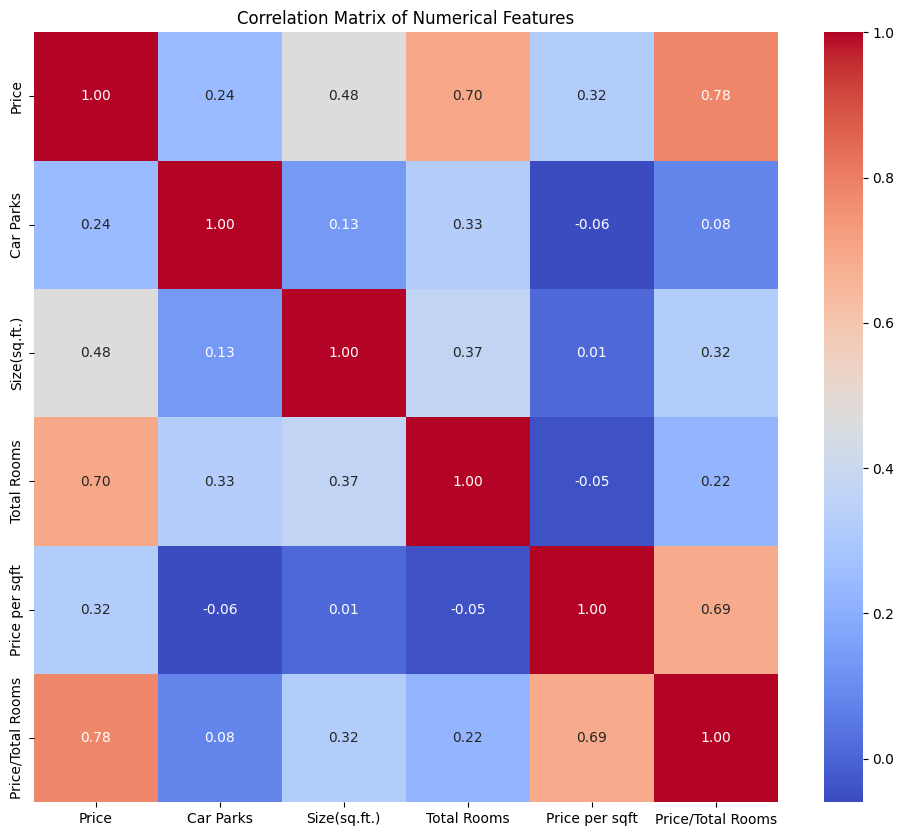

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = df_no_outliers.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#The furnishing one will be generally more expensive than the one is partly furnished, unfurnished, remove it same houses, same rooms, but then more expensive for the unfurnished.  

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df_no_outliers'

# Create a copy of the DataFrame to avoid modifying the original
filtered_df = df_no_outliers.copy()

# Group by Location, Property Type and Total Rooms
grouped = filtered_df.groupby(['Location', 'Property Type', 'Total Rooms'])

# Iterate through groups and remove rows based on conditions
# Keep track of indexes to drop
indexes_to_drop = []

for name, group in grouped:
    fully_furnished_price = group[group['Furnishing'] == 'Fully Furnished']['Price'].min()
    partly_furnished_price = group[group['Furnishing'] == 'Partly Furnished']['Price'].min()
    unfurnished_price = group[group['Furnishing'] == 'Unfurnished']['Price'].min()

    # Collect indexes to drop instead of dropping immediately
    if pd.notna(fully_furnished_price) and pd.notna(unfurnished_price) and unfurnished_price > fully_furnished_price:
        indexes_to_drop.extend(group[(group['Furnishing'] == 'Unfurnished') & (group['Price'] > fully_furnished_price)].index)
    if pd.notna(fully_furnished_price) and pd.notna(partly_furnished_price) and partly_furnished_price > fully_furnished_price:
        indexes_to_drop.extend(group[(group['Furnishing'] == 'Partly Furnished') & (group['Price'] > fully_furnished_price)].index)
    if pd.notna(partly_furnished_price) and pd.notna(unfurnished_price) and unfurnished_price > partly_furnished_price:
        indexes_to_drop.extend(group[(group['Furnishing'] == 'Unfurnished') & (group['Price'] > partly_furnished_price)].index)

# Drop all collected indexes at once outside the loop
filtered_df = filtered_df.drop(indexes_to_drop)

# Display the filtered DataFrame (optional)
print(filtered_df)

            Location      Price  Car Parks                   Property Type  \
0      Bukit Bintang  1250000.0          2  Condominium/Serviced Residence   
1      Lembah Pantai  6800000.0          0                  Detached House   
2           Segambut  1030000.0          2  Condominium/Serviced Residence   
7           Segambut  2600000.0          4   Semi-detached House/Townhouse   
9            Seputeh   385000.0          1                  Apartment/Flat   
...              ...        ...        ...                             ...   
53877       Segambut  6500000.0          0                  Detached House   
53878  Lembah Pantai  5100000.0          0                  Detached House   
53880  Lembah Pantai  5500000.0          0                  Detached House   
53881    Wangsa Maju   480000.0          0  Condominium/Serviced Residence   
53882    Wangsa Maju   540000.0          3  Condominium/Serviced Residence   

             Furnishing Size Category  Size(sq.ft.)  Total Room

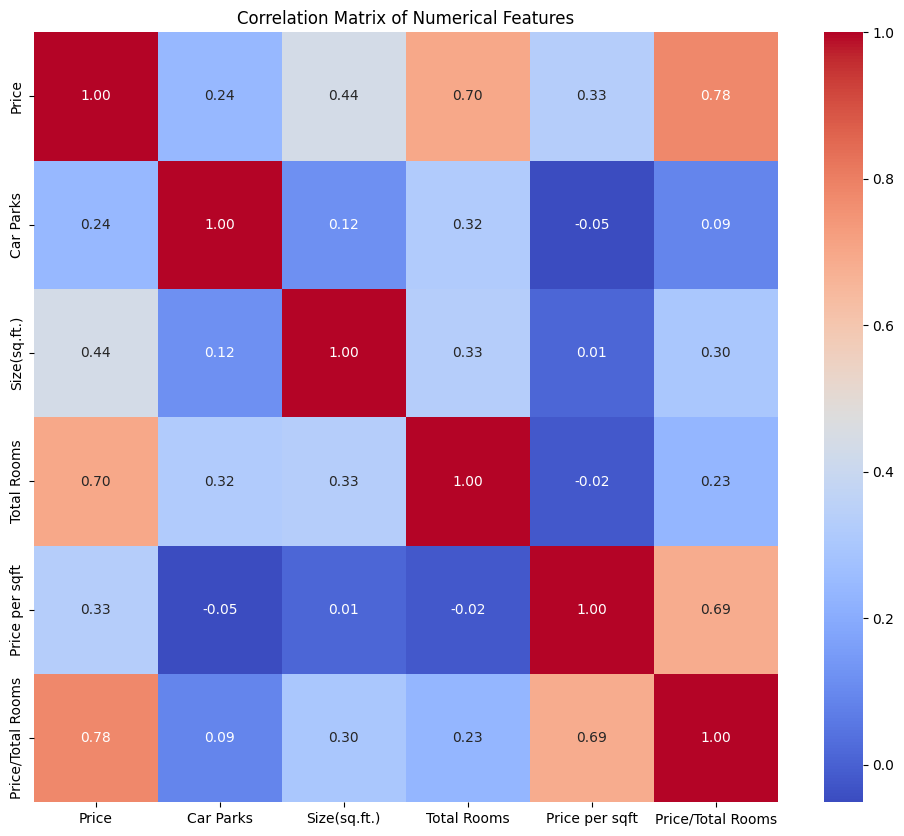

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = filtered_df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Build up vs land area, does that affect as well?
###(Count for each location, for each property type, create the bar chart)

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'filtered_df'
# (from the previous response where outliers were removed)

# Get unique locations
locations = filtered_df['Location'].unique()

# Loop through locations and calculate/compare average prices
for location in locations:
    # Filter data for the current location
    location_data = filtered_df[filtered_df['Location'] == location]

    # Calculate average price for 'Built-Up' properties in the location
    average_built_up_price = location_data[location_data['Size Category'] == 'Built-Up']['Price'].mean()

    # Calculate average price for 'Land Area' properties in the location
    average_land_area_price = location_data[location_data['Size Category'] == 'Land Area']['Price'].mean()

    # Print the results for the location
    print(f"Location: {location}")
    print(f"  Average Price for Built-Up Properties: {average_built_up_price:.2f}")
    print(f"  Average Price for Land Area Properties: {average_land_area_price:.2f}")

    # Compare the average prices for the location
    if average_built_up_price > average_land_area_price:
        print("  Built-Up properties have a higher average price in this location.")
    elif average_built_up_price < average_land_area_price:
        print("  Land Area properties have a higher average price in this location.")
    else:
        print("  Built-Up and Land Area properties have the same average price in this location.")

    print("-" * 30)  # Separator for better readability

Location: Bukit Bintang
  Average Price for Built-Up Properties: 1533472.33
  Average Price for Land Area Properties: 1738127.11
  Land Area properties have a higher average price in this location.
------------------------------
Location: Lembah Pantai
  Average Price for Built-Up Properties: 1499142.34
  Average Price for Land Area Properties: 5820505.39
  Land Area properties have a higher average price in this location.
------------------------------
Location: Segambut
  Average Price for Built-Up Properties: 1351028.22
  Average Price for Land Area Properties: 3236487.79
  Land Area properties have a higher average price in this location.
------------------------------
Location: Seputeh
  Average Price for Built-Up Properties: 616229.14
  Average Price for Land Area Properties: 1429199.90
  Land Area properties have a higher average price in this location.
------------------------------
Location: Setiawangsa
  Average Price for Built-Up Properties: 1767565.81
  Average Price for La

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'filtered_df'
# (from the previous response where outliers were removed)

# Calculate average price for 'Built-Up' properties
average_built_up_price = filtered_df[filtered_df['Size Category'] == 'Built-Up']['Price'].mean()

# Calculate average price for 'Land Area' properties
average_land_area_price = filtered_df[filtered_df['Size Category'] == 'Land Area']['Price'].mean()

# Print the results
print(f"Average Price for Built-Up Properties: {average_built_up_price:.2f}")
print(f"Average Price for Land Area Properties: {average_land_area_price:.2f}")

# Compare the average prices
if average_built_up_price > average_land_area_price:
    print("Built-Up properties have a higher average price.")
elif average_built_up_price < average_land_area_price:
    print("Land Area properties have a higher average price.")
else:
    print("Built-Up and Land Area properties have the same average price.")

Average Price for Built-Up Properties: 1064851.44
Average Price for Land Area Properties: 3026458.58
Land Area properties have a higher average price.


###WE know that Land area is more expensive, so remove rows that have built-up area  > land area price when the , location, property type and total rooms are equal.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'filtered_df'
# (from the previous response where outliers were removed)

# Create a copy of the DataFrame to avoid modifying the original
filtered_df2 = filtered_df.copy()

# Group by Location, Property Type, and Total Rooms
grouped = filtered_df2.groupby(['Location', 'Property Type', 'Total Rooms'])

# Iterate through groups and remove rows based on conditions
# Keep track of indexes to drop
indexes_to_drop = []

for name, group in grouped:
    built_up_price = group[group['Size Category'] == 'Built-Up']['Price'].min()
    land_area_price = group[group['Size Category'] == 'Land Area']['Price'].min()

    # Collect indexes to drop instead of dropping immediately
    if pd.notna(built_up_price) and pd.notna(land_area_price) and built_up_price > land_area_price:
        indexes_to_drop.extend(group[(group['Size Category'] == 'Built-Up') & (group['Price'] > land_area_price)].index)

# Drop all collected indexes at once outside the loop
filtered_df2 = filtered_df2.drop(indexes_to_drop)

# Display the filtered DataFrame (optional)
print(filtered_df2)

            Location      Price  Car Parks                   Property Type  \
0      Bukit Bintang  1250000.0          2  Condominium/Serviced Residence   
1      Lembah Pantai  6800000.0          0                  Detached House   
2           Segambut  1030000.0          2  Condominium/Serviced Residence   
7           Segambut  2600000.0          4   Semi-detached House/Townhouse   
9            Seputeh   385000.0          1                  Apartment/Flat   
...              ...        ...        ...                             ...   
53877       Segambut  6500000.0          0                  Detached House   
53878  Lembah Pantai  5100000.0          0                  Detached House   
53880  Lembah Pantai  5500000.0          0                  Detached House   
53881    Wangsa Maju   480000.0          0  Condominium/Serviced Residence   
53882    Wangsa Maju   540000.0          3  Condominium/Serviced Residence   

             Furnishing Size Category  Size(sq.ft.)  Total Room

#I believe I did too many data intergration(generate new columns).

#Not yet transformation, need you all help for the min-max scaler and the normalization

#Data aggreagation no need since only one dataset.

###Normalization first.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming your DataFrame is named 'filtered_df2'
# (from the previous response where outliers were removed)

# Select numerical features for scaling/normalization
numerical_features = ['Size(sq.ft.)', 'Price', 'Price per sqft', 'Total Rooms', 'Price/Total Rooms']

# Create a copy of the DataFrame to avoid modifying the original
scaled_df = filtered_df2.copy()

# Min-Max Scaling
scaler = MinMaxScaler()
scaled_df[numerical_features] = scaler.fit_transform(scaled_df[numerical_features])

# Normalization (Standardization)
# Create a new DataFrame for normalized data to keep both versions
normalized_df = filtered_df2.copy()
normalizer = StandardScaler()
normalized_df[numerical_features] = normalizer.fit_transform(normalized_df[numerical_features])

# Display the scaled and normalized DataFrames (optional)
print("Scaled DataFrame:")
print(scaled_df.head())
print("\nNormalized DataFrame:")
print(normalized_df.head())

Scaled DataFrame:
        Location     Price  Car Parks                   Property Type  \
0  Bukit Bintang  0.056936          2  Condominium/Serviced Residence   
1  Lembah Pantai  0.336083          0                  Detached House   
2       Segambut  0.045871          2  Condominium/Serviced Residence   
7       Segambut  0.124837          4   Semi-detached House/Townhouse   
9        Seputeh  0.013429          1                  Apartment/Flat   

         Furnishing Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  \
0   Fully Furnished      Built-Up      0.001884     0.105263        0.491823   
1  Partly Furnished     Land Area      0.011550     0.289474        0.517685   
2  Partly Furnished      Built-Up      0.002822     0.131579        0.288307   
7  Partly Furnished     Land Area      0.005818     0.184211        0.379227   
9  Partly Furnished      Built-Up      0.001136     0.078947        0.223387   

   Price/Total Rooms  
0           0.062486  
1           0.17

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named 'filtered_df2'
# (from the previous response where outliers were removed)

# Select numerical features for scaling
numerical_features = ['Size(sq.ft.)', 'Price', 'Price per sqft', 'Total Rooms', 'Price/Total Rooms']

# Create a copy of the DataFrame to avoid modifying the original
scaled_df = filtered_df2.copy()

# Min-Max Scaling
scaler = MinMaxScaler()
scaled_df[numerical_features] = scaler.fit_transform(scaled_df[numerical_features])

# Display the scaled DataFrame (optional)
print("Scaled DataFrame:")
print(scaled_df.head())

Scaled DataFrame:
        Location     Price  Car Parks                   Property Type  \
0  Bukit Bintang  0.056936          2  Condominium/Serviced Residence   
1  Lembah Pantai  0.336083          0                  Detached House   
2       Segambut  0.045871          2  Condominium/Serviced Residence   
7       Segambut  0.124837          4   Semi-detached House/Townhouse   
9        Seputeh  0.013429          1                  Apartment/Flat   

         Furnishing Size Category  Size(sq.ft.)  Total Rooms  Price per sqft  \
0   Fully Furnished      Built-Up      0.001884     0.105263        0.491823   
1  Partly Furnished     Land Area      0.011550     0.289474        0.517685   
2  Partly Furnished      Built-Up      0.002822     0.131579        0.288307   
7  Partly Furnished     Land Area      0.005818     0.184211        0.379227   
9  Partly Furnished      Built-Up      0.001136     0.078947        0.223387   

   Price/Total Rooms  
0           0.062486  
1           0.17

In [ ]:
scaled_df = scaled_df.drop('Price per sqft', axis=1) # Specify axis=1 for columns

#All the things above if wnna remove can remove, because it may be unrelated, but I tried my best liao haha


#Trying machine learning here.

In [ ]:
final_df = scaled_df.copy()  # Create a copy of df to avoid modifying the original


In [ ]:
final_df.isna().sum()

Location             0
Price                0
Car Parks            0
Property Type        0
Furnishing           0
Size Category        0
Size(sq.ft.)         0
Total Rooms          0
Price/Total Rooms    0
dtype: int64

In [ ]:
final_df.head()

Location     Price  Car Parks                   Property Type  \
0  Bukit Bintang  0.056936          2  Condominium/Serviced Residence   
1  Lembah Pantai  0.336083          0                  Detached House   
2       Segambut  0.045871          2  Condominium/Serviced Residence   
7       Segambut  0.124837          4   Semi-detached House/Townhouse   
9        Seputeh  0.013429          1                  Apartment/Flat   

         Furnishing Size Category  Size(sq.ft.)  Total Rooms  \
0   Fully Furnished      Built-Up      0.001884     0.105263   
1  Partly Furnished     Land Area      0.011550     0.289474   
2  Partly Furnished      Built-Up      0.002822     0.131579   
7  Partly Furnished     Land Area      0.005818     0.184211   
9  Partly Furnished      Built-Up      0.001136     0.078947   

   Price/Total Rooms  
0           0.062486  
1           0.170112  
2           0.041562  
7           0.090032  
9           0.017576

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26654 entries, 0 to 53882
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           26654 non-null  object 
 1   Price              26654 non-null  float64
 2   Car Parks          26654 non-null  Int64  
 3   Property Type      26654 non-null  object 
 4   Furnishing         26654 non-null  object 
 5   Size Category      26654 non-null  object 
 6   Size(sq.ft.)       26654 non-null  float64
 7   Total Rooms        26654 non-null  float64
 8   Price/Total Rooms  26654 non-null  float64
dtypes: Int64(1), float64(4), object(4)
memory usage: 2.1+ MB


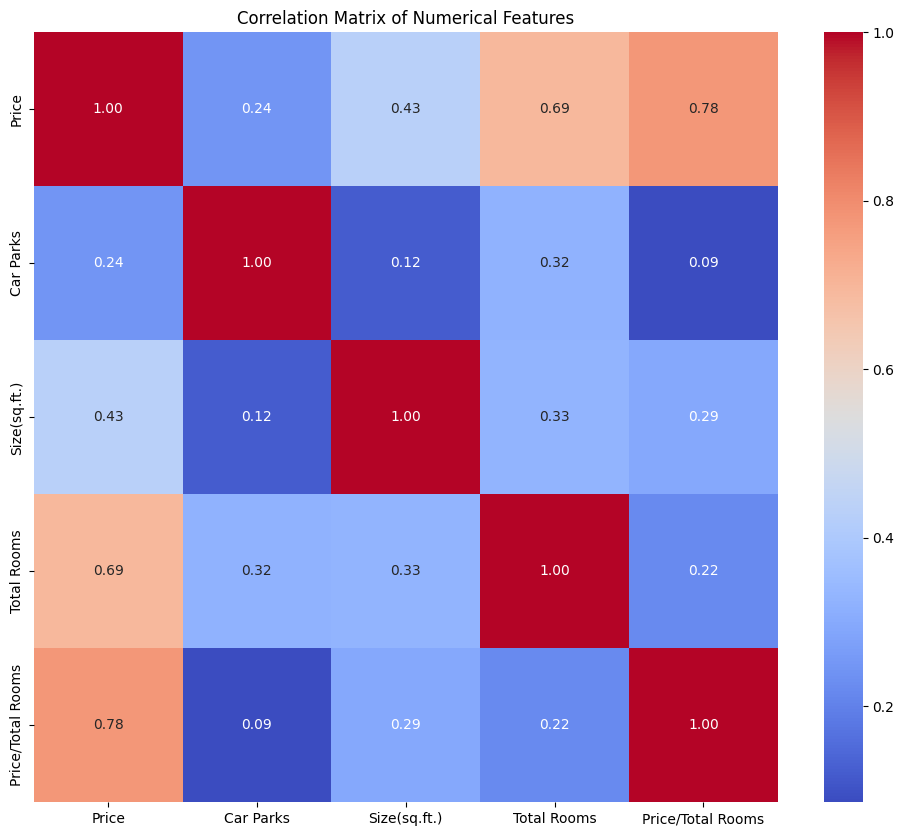

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
correlation_matrix = final_df.select_dtypes(include=['number']).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

###There are four categorical data location, property type, furnishing and size category.

### All we make them into True and False, and then drop all these categorical data.

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'scaled_df'

# Get a list of categorical features
categorical_features = ['Location', 'Property Type', 'Furnishing', 'Size Category']

# Perform one-hot encoding
encoded_df = pd.get_dummies(scaled_df, columns=categorical_features, drop_first=True, dtype=int)
# dtype=int ensures the encoded columns are integers (True/False represented as 1/0)
# drop_first=True avoids multicollinearity by dropping one level from each categorical feature

# Drop the original categorical columns
final_df = encoded_df.drop(categorical_features, axis=1, errors='ignore')
# errors='ignore' to handle cases where a column might have already been dropped

# Display the final DataFrame
print(final_df.head())

      Price  Car Parks  Size(sq.ft.)  Total Rooms  Price/Total Rooms  \
0  0.056936          2      0.001884     0.105263           0.062486   
1  0.336083          0      0.011550     0.289474           0.170112   
2  0.045871          2      0.002822     0.131579           0.041562   
7  0.124837          4      0.005818     0.184211           0.090032   
9  0.013429          1      0.001136     0.078947           0.017576   

   Location_Batu  Location_Bukit Bintang  Location_Cheras  Location_Kepong  \
0              0                       1                0                0   
1              0                       0                0                0   
2              0                       0                0                0   
7              0                       0                0                0   
9              0                       0                0                0   

   Location_Lembah Pantai  ...  Location_Wangsa Maju  \
0                       0  ...            

In [ ]:
final_df.head()

Price  Car Parks  Size(sq.ft.)  Total Rooms  Price/Total Rooms  \
0  0.056936          2      0.001884     0.105263           0.062486   
1  0.336083          0      0.011550     0.289474           0.170112   
2  0.045871          2      0.002822     0.131579           0.041562   
7  0.124837          4      0.005818     0.184211           0.090032   
9  0.013429          1      0.001136     0.078947           0.017576   

   Location_Batu  Location_Bukit Bintang  Location_Cheras  Location_Kepong  \
0              0                       1                0                0   
1              0                       0                0                0   
2              0                       0                0                0   
7              0                       0                0                0   
9              0                       0                0                0   

   Location_Lembah Pantai  ...  Location_Wangsa Maju  \
0                       0  ...                     0   
1                       1  ...                     0   
2                       0  ...                     0   
7                       0  ...                     0   
9                       0  ...                     0   

   Property Type_2-2.5 Story Terrace  Property Type_3+ Story Terrace  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
7                                  0                               0   
9                                  0                               0   

   Property Type_Apartment/Flat  Property Type_Condominium/Serviced Residence  \
0                             0                                             1   
1                             0                                             0   
2                             0                                             1   
7                             0                                             0   
9                             1                                             0   

   Property Type_Detached House  Property Type_Semi-detached House/Townhouse  \
0                             0                                            0   
1                             1                                            0   
2                             0                                            0   
7                             0                                            1   
9                             0                                            0   

   Furnishing_Partly Furnished  Furnishing_Unfurnished  \
0                            0                       0   
1                            1                       0   
2                            1                       0   
7                            1                       0   
9                            1                       0   

   Size Category_Land Area  
0                        0  
1                        1  
2                        0  
7                        1  
9                        0  

[5 rows x 24 columns]

In [ ]:
# export the df_cleaned to 'balanced_cleaned_credit_card_data.csv'

final_df.to_csv('cleaned_data_for_ml.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Read the preprocessed and cleaned dataset
# The 'Price' column is not the first column, so no need to specify index_col
X = pd.read_csv('cleaned_data_for_ml.csv')

#Extract the target variable ('Price') and set it as variable 'y'
y = X.pop('Price')  # Now 'Price' is accessible as a regular column

#Split dataset into training and testing sets
#75% data used for training, 25% used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [ ]:
# Import all the necessary libraries for machine learning regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor  # Assumes you have installed xgboost (pip install xgboost)
from sklearn.metrics import mean_squared_error, r2_score

# Create a list of regression models
regression_model_class = [
    LinearRegression,
    DecisionTreeRegressor,
    RandomForestRegressor,
    XGBRegressor,
]

# Model performance dictionary to store the results
model_performance = {
    'ModelName': ['LinearRegression',
                  'DecisionTreeRegressor',
                  'RandomForestRegressor',
                  'XGBRegressor'],
    'Model': [],
    'R-squared': [],  # Use R-squared for regression
    'RMSE': [],
}

# Loop through each regression model class
for ModelClass in regression_model_class:
    # Create model with specified arguments
    args = {'random_state': 161223} if ModelClass != LinearRegression else {}  # Handle XGBoost case
    model = ModelClass(**args)

    # Train data on model
    model.fit(X_train, y_train)

    # Model prediction using the trained model
    y_pred = model.predict(X_test)

    # Evaluation scoring
    model_performance['Model'].append(model)
    model_performance['R-squared'].append(r2_score(y_test, y_pred))  # Calculate R-squared
    model_performance['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Create DataFrame from the model performance dictionary
model_performance_df = pd.DataFrame(model_performance)
print(model_performance_df)

               ModelName                                              Model  \
0       LinearRegression                                 LinearRegression()   
1  DecisionTreeRegressor         DecisionTreeRegressor(random_state=161223)   
2  RandomForestRegressor  (DecisionTreeRegressor(max_features=1.0, rando...   
3           XGBRegressor  XGBRegressor(base_score=None, booster=None, ca...   

   R-squared      RMSE  
0   0.927508  0.020227  
1   0.992459  0.006524  
2   0.997644  0.003647  
3   0.992109  0.006674  


Text(0.5, 1.0, 'RMSE')

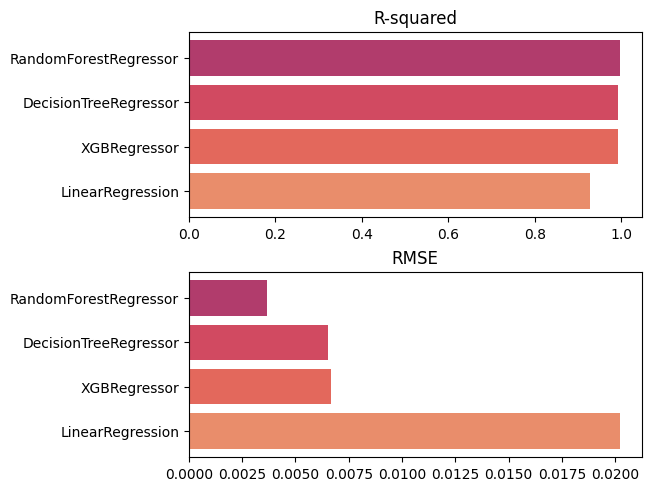

In [ ]:
# Visualize model performance by creating two subplots ax1 and ax2
fig, (ax1, ax2) = plt.subplots(2, layout='constrained')

#Arrange the models from lowest to highest R-squared for better visualization.
model_performance_df.sort_values(by='R-squared', inplace=True)
#Horizontal bar chart is created on the first subplot (ax1). ( y-axis: 'ModelName', x-axis : 'R-squared')
ax1.barh(model_performance_df['ModelName'], model_performance_df['R-squared'], color=sns.color_palette('flare'))
#Set title of subplot ax1
ax1.set_title('R-squared')

#Arrange the models from highest to lowest RMSE for better visualization.
model_performance_df.sort_values(by='RMSE', ascending=False, inplace=True)
#Horizontal bar chart is created on the second subplot (ax2). ( y-axis: 'ModelName', x-axis : 'RMSE')
ax2.barh(model_performance_df['ModelName'], model_performance_df['RMSE'], color=sns.color_palette('flare'))
#Set title of subplot ax2
ax2.set_title('RMSE')

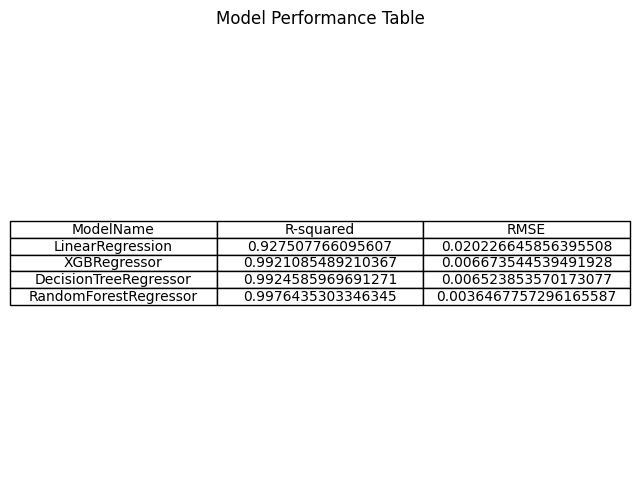

In [ ]:
import matplotlib.pyplot as plt

# Arrange the models from lowest to highest R-squared for better visualization.
model_performance_df.sort_values(by='R-squared', inplace=True)

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(8, 6))

# Display the table in ascending order of R-squared
table_data = model_performance_df[['ModelName', 'R-squared', 'RMSE']]
table = ax.table(cellText=table_data.values, colLabels=table_data.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)

# Remove axes for better visualization
ax.axis('off')

plt.title('Model Performance Table')
plt.show()

## Selected Model

Since the R-squared for RandomForestRegressor is the highest and the RMSE value is the lowest, RandomForestRegressor is the best performing model. Without further ado, We will choose RandomForestRegressor for our model.

## Model Training and Evaluation

Once the model is selected, it needs to be trained on the preprocessed data, and its performance should be evaluated using appropriate metrics. The model can be fine-tuned to improve its performance through Hyperparameter Tuning.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': range(1, 10),
}

#Create an instance of GridSearchCV with RandomForestRegressor, searching over the specified parameter grid
#Using 4-fold cross-validation and R-squared as the scoring metric
clf = GridSearchCV(RandomForestRegressor(), param_grid=params, scoring='r2', cv=4)

# Fit the GridSearchCV instance on the training data to find the best hyperparameters
clf.fit(X_train, y_train)

# Display the best hyperparameters and corresponding best R-squared score
clf.best_params_, clf.best_score_

({'max_depth': 9}, 0.9909025948357095)

The first hyperparameter values found were {'max_depth': 9} with a corresponding best R-squared score of approximately XXXXXX.

**XXXXXX is varies everytime run the program, so maybe we finish all liao baru run all and write the value**

In [ ]:
params = {
    'max_depth': [9],
    'min_samples_split': range(2, 11),
    'min_samples_leaf': [i for i in range(1, 10)],
    'ccp_alpha': [i/10.0 for i in range(0, 10)]
}

#Create an instance of GridSearchCV with RandomForestRegressor, searching over the specified parameter grid
#Using 4-fold cross-validation and R-squared as the scoring metric
clf = GridSearchCV(RandomForestRegressor(), param_grid=params, scoring='r2', cv=4)
# Fit the GridSearchCV instance on the training data to find the best hyperparameters
clf.fit(X_train, y_train)

# Display the best hyperparameters and corresponding best R-squared score
clf.best_params_, clf.best_score_

We can extend the GridSearch to include additional hyperparameters: 'max_depth', 'min_samples_split', 'min_samples_leaf', and 'ccp_alpha'.

The best hyperparameter values found in this case were {'ccp_alpha': XXX, 'max_depth': XXX, 'min_samples_leaf': XXX, 'min_samples_split': XXX} with a corresponding best R-squared score of approximately XXXXXX.

In [ ]:
model.score(X_test, y_test)

0.9921085489210367

The best hyperparameters found during the tuning process are utilized for training the random forest model as shown above.